In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#im = image.imread('../FCC_Logo.png')
import uproot as ur
from scipy.optimize import curve_fit
import ROOT
from array import array
import os
import zfit
import awkward as ak
import matplotlib.ticker as tick
import math
import scipy.integrate as integrate

#from RooFitFunctions import *

#import mplhep as hep
plt.rc('text', usetex = True)
#plt.rc('text.latex', preamble = r'\usepackage{amsmath} \usepackage{unicode-math}')
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 30, 'xtick.labelsize':20,'ytick.labelsize':20, 'figure.titlesize':23, 'legend.fontsize':20 }
plt.rcParams.update(parameters)

a = 0

Welcome to JupyROOT 6.26/10


/opt/homebrew/Caskroom/miniconda/base/envs/FCC_ana_310_wZFIT/lib/python3.10/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/FCC_ana_310_wZFIT/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Base IDEA

In [240]:
vertex_resolution = ur.open("/Users/tristanmiralles/Desktop/FCC_stuff/IDEA_vertexing_study/p8_ee_Zbb_ecm91_EvtGen_Bd2KstarTauTau/vertex_resolution_last.root")
events = vertex_resolution["tree"]

In [241]:
PV_dx=np.array(ak.flatten(events["PV_dx"].array(library = "ak") * 10**3))
PV_dy=np.array(ak.flatten(events["PV_dy"].array(library = "ak") * 10**3))
PV_dz=np.array(ak.flatten(events["PV_dz"].array(library = "ak") * 10**3))

PV_rec_x=np.array(ak.flatten(events["PV_rec_x"].array(library = "ak") * 10**3))
PV_rec_y=np.array(ak.flatten(events["PV_rec_y"].array(library = "ak") * 10**3))
PV_rec_z=np.array(ak.flatten(events["PV_rec_z"].array(library = "ak") * 10**3))

print(len(PV_dx))

PV_dx=PV_dx[PV_rec_x!=0]
PV_dy=PV_dy[PV_rec_x!=0]
PV_dz=PV_dz[PV_rec_x!=0]

print(len(PV_dx))

Kst_rec_x=np.array(ak.flatten(events["Kst_rec_x"].array(library = "ak") * 10**3))
Kst_rec_y=np.array(ak.flatten(events["Kst_rec_y"].array(library = "ak") * 10**3))
Kst_rec_z=np.array(ak.flatten(events["Kst_rec_z"].array(library = "ak") * 10**3))

Kst_mc_x=np.array(ak.flatten(events["Kst_mc_x"].array(library = "ak") * 10**3))
Kst_mc_y=np.array(ak.flatten(events["Kst_mc_y"].array(library = "ak") * 10**3))
Kst_mc_z=np.array(ak.flatten(events["Kst_mc_z"].array(library = "ak") * 10**3))
Kst_dx=np.array(ak.flatten(events["Kst_dx"].array(library = "ak") * 10**3))
Kst_dy=np.array(ak.flatten(events["Kst_dy"].array(library = "ak") * 10**3))
Kst_dz=np.array(ak.flatten(events["Kst_dz"].array(library = "ak") * 10**3))
Kst_uLx=np.array(ak.flatten(events["Kst_uLx"].array(library = "ak")))
Kst_uLy=np.array(ak.flatten(events["Kst_uLy"].array(library = "ak")))
Kst_uLz=np.array(ak.flatten(events["Kst_uLz"].array(library = "ak")))

displacement_Kst_l = np.array(ak.flatten(events["displacement_Kst_l"].array(library = "ak") * 10**3))
displacement_Kst_t = np.array(ak.flatten(events["displacement_Kst_t"].array(library = "ak") * 10**3))
print(len(displacement_Kst_l))
print(displacement_Kst_l)
displacement_Kst_l=displacement_Kst_l[Kst_rec_x!=0]
displacement_Kst_t=displacement_Kst_t[Kst_rec_x!=0]
print(len(displacement_Kst_l))
print(displacement_Kst_l)

Tau_rec_x=np.array(ak.flatten(events["Tau_rec_x"].array(library = "ak") * 10**3))
Tau_rec_y=np.array(ak.flatten(events["Tau_rec_y"].array(library = "ak") * 10**3))
Tau_rec_z=np.array(ak.flatten(events["Tau_rec_z"].array(library = "ak") * 10**3))

Tau_mc_x=np.array(ak.flatten(events["Tau_mc_x"].array(library = "ak") * 10**3))
Tau_mc_y=np.array(ak.flatten(events["Tau_mc_y"].array(library = "ak") * 10**3))
Tau_mc_z=np.array(ak.flatten(events["Tau_mc_z"].array(library = "ak") * 10**3))
Tau_dx=np.array(ak.flatten(events["Tau_dx"].array(library = "ak") * 10**3))
Tau_dy=np.array(ak.flatten(events["Tau_dy"].array(library = "ak") * 10**3))
Tau_dz=np.array(ak.flatten(events["Tau_dz"].array(library = "ak") * 10**3))
Tau_uLx=np.array(ak.flatten(events["Tau_uLx"].array(library = "ak")))
Tau_uLy=np.array(ak.flatten(events["Tau_uLy"].array(library = "ak")))
Tau_uLz=np.array(ak.flatten(events["Tau_uLz"].array(library = "ak")))


displacement_Tau_l = np.array(ak.flatten(events["displacement_Tau_l"].array(library = "ak") * 10**3))
displacement_Tau_t = np.array(ak.flatten(events["displacement_Tau_t"].array(library = "ak") * 10**3))
print(len(displacement_Tau_l))
displacement_Tau_l=displacement_Tau_l[Tau_rec_x!=0]
displacement_Tau_t=displacement_Tau_t[Tau_rec_x!=0]
print(len(displacement_Tau_l))

999805
985747
999805
[-6.68031250e+03 -1.48520846e+02 -3.62393601e+03 ... -2.14518728e+01
 -2.74839668e+00  1.33913634e+01]
892195
[-148.520846     44.43219069  -24.34047625 ...  -21.45187284   -2.74839668
   13.39136343]
1999610
1621813


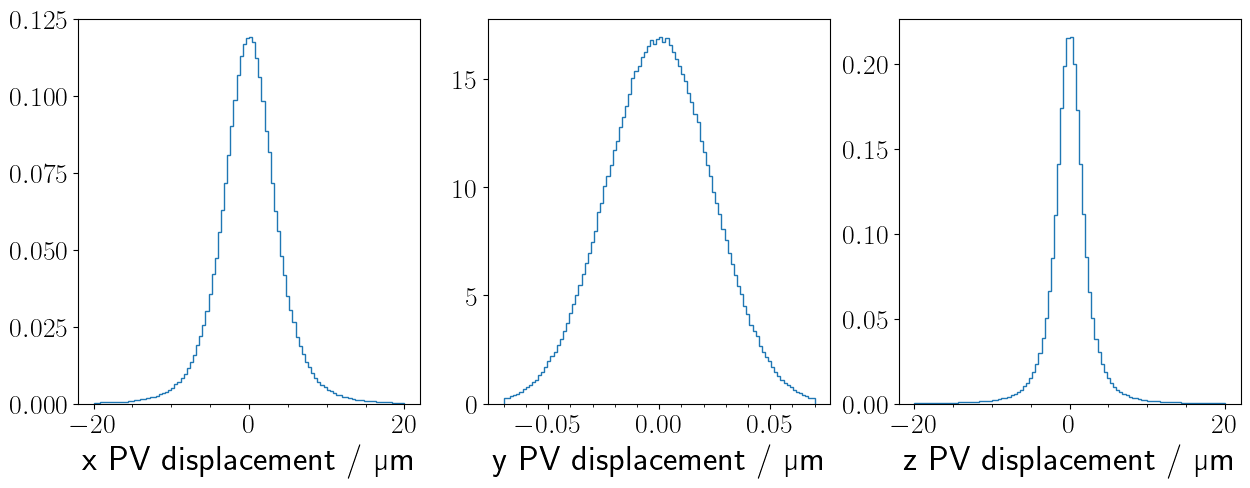

In [242]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(1, 3, 1)
ax1.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
ax1.set_xlabel('x PV displacement / µm')
ax1.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax2 = plt.subplot(1, 3, 2)
ax2.hist(PV_dy, bins = 100, histtype = "step", range=(-0.07,0.07), density = True)
ax2.set_xlabel('y PV displacement / µm')
ax2.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax3 = plt.subplot(1, 3, 3)
ax3.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
ax3.set_xlabel('z PV displacement / µm')
ax3.xaxis.set_minor_locator(tick.AutoMinorLocator());

In [243]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 5, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [244]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dx[(PV_dx > -20) & (PV_dx < 20)], weights = None)

In [245]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       2914321.007 NCalls =     13
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -234015.7373
  Edm           : 120289.4616
  Internal parameters:
                0
    -0.7520026407
     -1.063561637
  Internal gradient  :
     -124156.8474
      5293.850493
      248659.3411
  Internal covariance matrix:
  8.2253285e-06              0              0
              0  2.3909531e-06              0
              0              0  5.7300603e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 545
I VariableMetricBuilder    0 - FCN =      -234015.7373 Edm =       120289.4616 NCalls =     87
I VariableMetricBuilder    1 - FCN =      -277836.9973 Edm =       1773.665694 NCalls =    104
I VariableMetricBuilder    2 - FCN =      -279431.2232 Edm =       86.98842733 NCalls =    112
I VariableMetricBuilder    3 - FCN =      -280047.3444 Edm =       234.5221884 NCalls =    121
I Varia

4.129416989727094


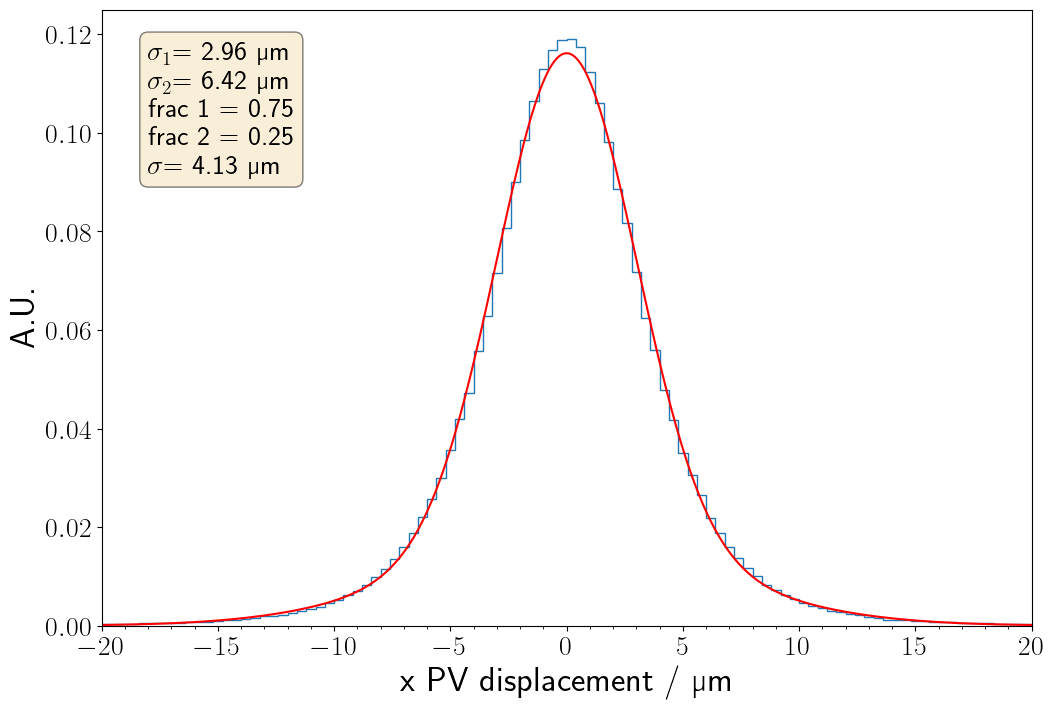

In [246]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.xlim(-20, 20)
plt.xlabel("x PV displacement / µm")
plt.ylabel("A.U.");

In [247]:
print(model.params)
def dougauss(x,mu,s1,f1,s2):
    f2=1-f1
    result=f1*(1/np.sqrt(2*np.pi*s1**2))*np.exp(-((x-mu)**2)/(2*s1**2))+f2*(1/np.sqrt(2*np.pi*s2**2))*np.exp(-((x-mu)**2)/(2*s2**2))
    return result
def gauss(x,mu,s1):
    result=np.exp(-((x-mu)**2)/(2*s1**2))
    return result
print(np.max(pdf))
print(params[sigma2]['value'])

{'frac_0': <zfit.Parameter '52_frac12' floating=True value=0.7454>, 'frac_1': <zfit.ComposedParameter 'Composed_autoparam_49' params=[('frac_0', '52_frac12')] value=0.2546>}
0.11618914307922572
6.423802323595666


0.9995291331155035


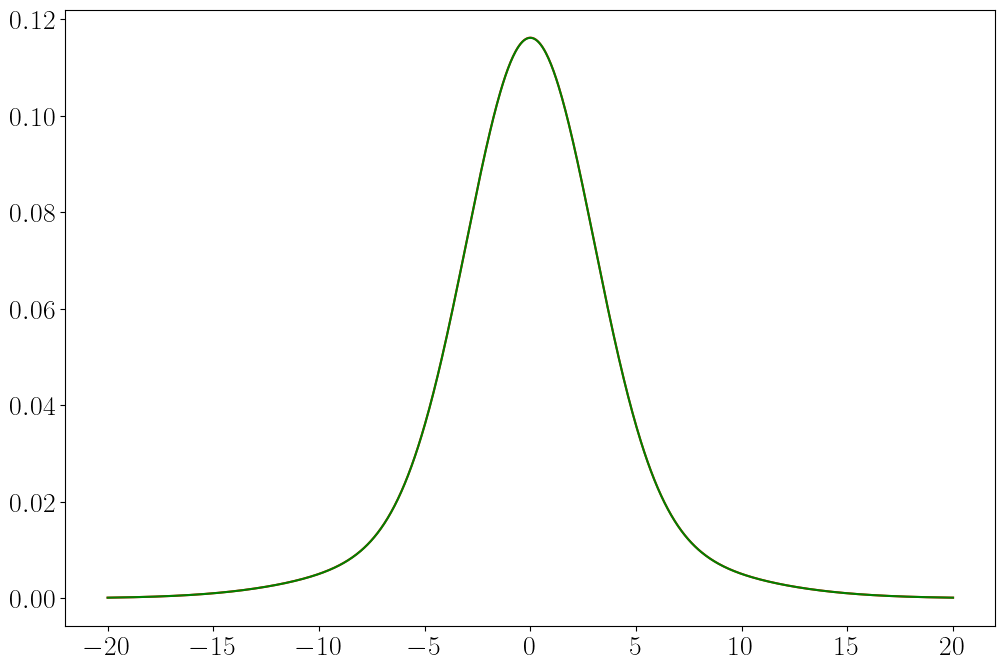

In [248]:
x_range=np.linspace(-20,20,1000)
res=dougauss(x_range,0.,2.963291968025854,0.7453838586807251,6.423802323595666)
plt.figure(figsize=(12,8))
plt.plot(x_range, pdf, color = "red")
plt.plot(x_range, res, color="green");

I1 = integrate.simpson(res, x_range)
print(I1)

In [249]:
obs = zfit.Space("x", limits = (-0.2, 0.2))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 0.01, 0.001, 0.05)
model = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 0.03, 0.02, 0.05)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

# frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

# model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [250]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dy[(PV_dy > -0.2) & (PV_dy < 0.2)], weights = None)

In [251]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       765244.1091 NCalls =      5
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 305
I VariableMetricBuilder    0 - FCN =              1000 Edm =       765244.1091 NCalls =      5
I VariableMetricBuilder    1 - FCN =      -1438754.886 Edm =       54.22978862 NCalls =     16
I VariableMetricBuilder    2 - FCN =      -1439912.735 Edm =      0.1695520483 NCalls =     21
I VariableMetricBuilder    3 - FCN =      -1439913.938 Edm =    2.54851315e-06 NCalls =     25
I VariableMetricBuilder After Hessian
I VariableMetricBuilder    4 - FCN =      -1439913.938 Edm =    1.93181925e-06 NCalls =     32
CONVERGED
Finished iteration 0, niter=32, fmin=-1439914, edm=1.93e-06 edm_minuit=1.93e-06
name         value  (rounded)    at limit
---------  ------------------  ----------
53_sigma1           0.0237829       False


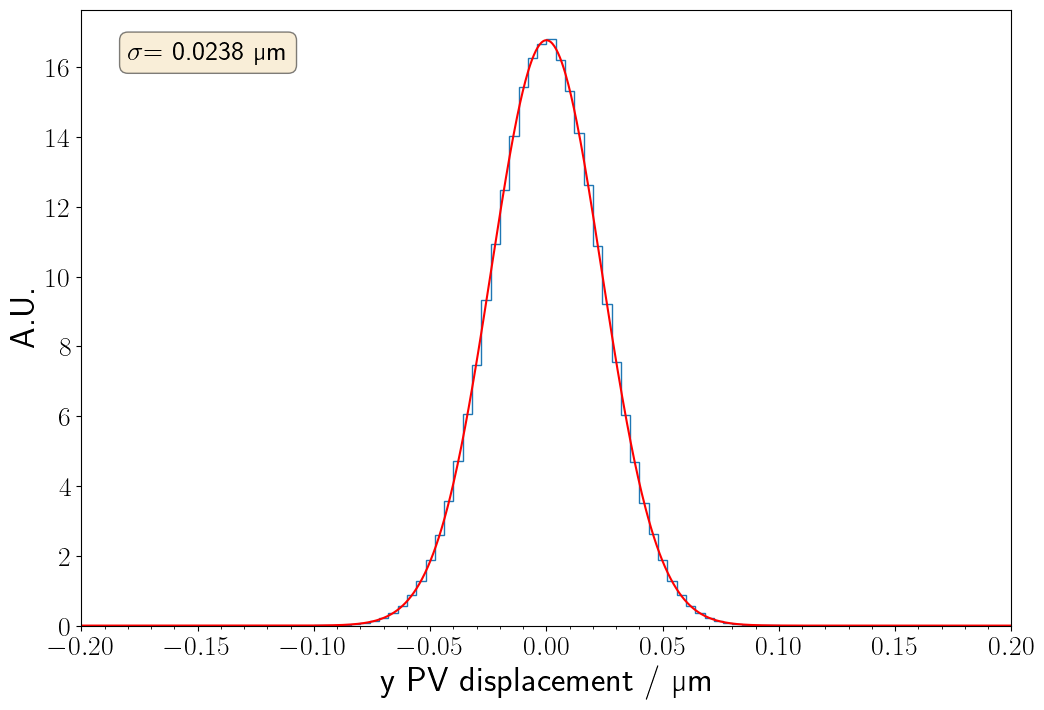

In [252]:
x_range = np.linspace(-0.2, 0.2, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dy, bins = 100, histtype = "step", range=(-0.2,0.2), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
# combined_resolution = np.sqrt(params[frac12]['value']**2 * params[sigma1]['value']**2 + (1 - params[frac12]['value'])**2 * params[sigma2]['value']**2 )
# print(combined_resolution)
# frac1=params[frac12]['value']
# frac2=1-params[frac12]['value']
#textstr = f"$\\sigma_1$= {params[sigma1]['value']:.4f} µm \n$\\sigma_2$= {params[sigma2]['value']:.4f} µm  \nfrac 1 = {frac1:.4f} \nfrac 2 = {frac2:.4f} \n$\\sigma$= {combined_resolution:.4f} µm" 
textstr = f"$\\sigma$= {params[sigma1]['value']:.4f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-0.2, 0.2)
plt.xlabel("y PV displacement / µm")
plt.ylabel("A.U.");

In [253]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 2, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])

a += 1

In [254]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dz[(PV_dz > -20) & (PV_dz < 20)], weights = None)

In [255]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       265325.7907 NCalls =     13
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -98581.11602
  Edm           : 1158444.837
  Internal parameters:
                0
    -0.8911225079
     -1.076782879
  Internal gradient  :
     -311228.2185
      282728.6372
       271259.699
  Internal covariance matrix:
  7.3235814e-06              0              0
              0  2.2132892e-06              0
              0              0  5.0929356e-05
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 545
I VariableMetricBuilder    0 - FCN =      -98581.11602 Edm =       1158444.837 NCalls =     67
I VariableMetricBuilder    1 - FCN =      -167772.2543 Edm =       78647.62262 NCalls =     81
I VariableMetricBuilder    2 - FCN =      -227700.5954 Edm =       13029.22811 NCalls =     91
I VariableMetricBuilder    3 - FCN =      -232096.1084 Edm =       14.13547195 NCalls =     99
I Varia

2.925946151831242


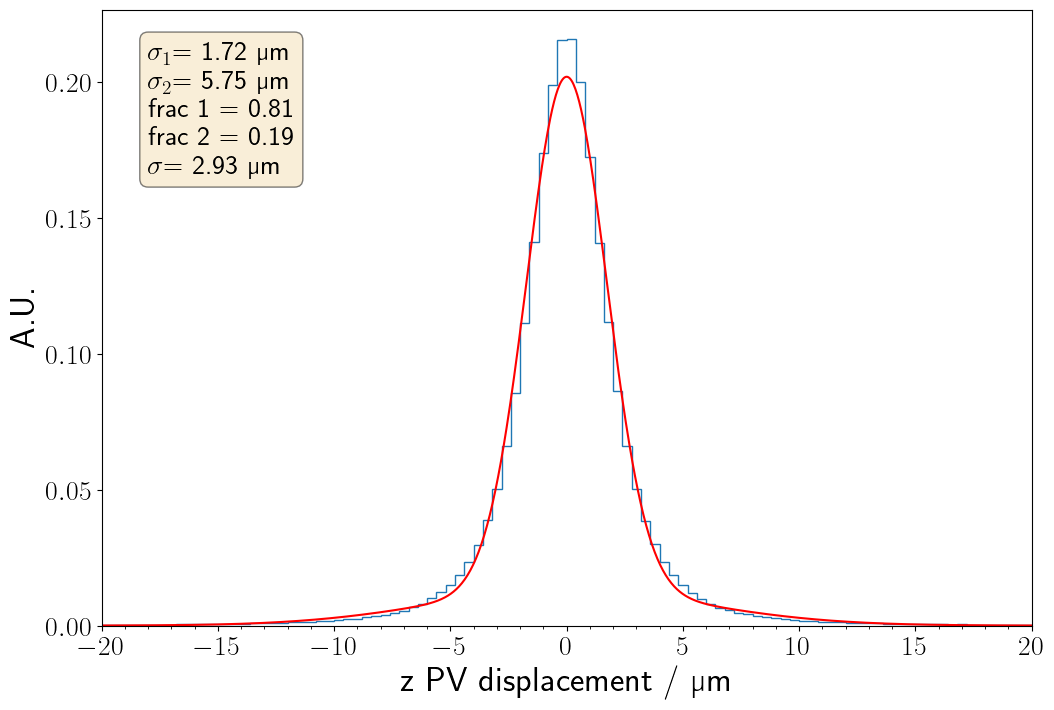

In [256]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-20, 20)
plt.xlabel("z PV displacement / µm")
plt.ylabel("A.U.");

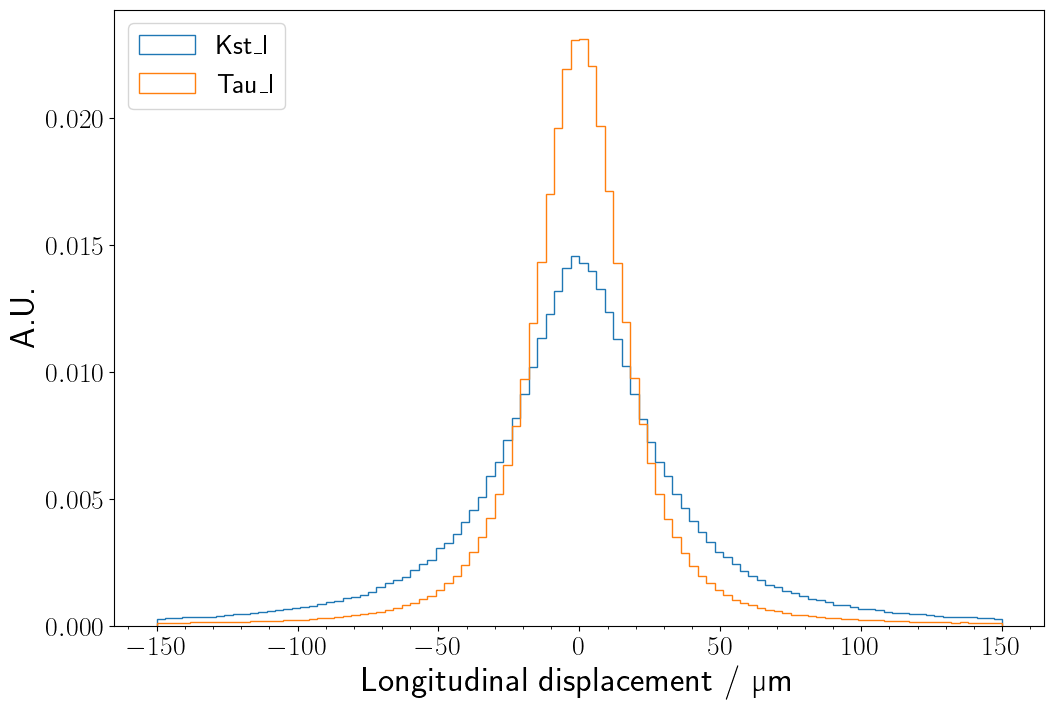

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Kst_l")
plt.hist(displacement_Tau_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Tau_l")
plt.legend(loc = "upper left")
plt.xlabel("Longitudinal displacement / µm")
plt.ylabel("A.U.");

In [20]:
obs = zfit.Space("x", limits = (-400, 400))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 20, 5, 30)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 200)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 170, 40, 500)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a += 1

In [21]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Kst_l[(displacement_Kst_l > -400) & (displacement_Kst_l < 400)], weights = None)

In [22]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       147860.0465 NCalls =     25
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 149307.8255
  Internal parameters:
  2.049358747e-16
                0
     0.2013579208
    -0.7297276562
    -0.4497968604
  Internal gradient  :
  5.531625407e+14
  5.531625406e+14
      3926.833112
     -1281726.563
                0
  Internal covariance matrix:
  2.1588706e-27              0              0              0              0
              0  2.1588706e-27              0              0              0
              0              0  2.4162017e-05              0              0
              0              0              0  3.6250865e-07              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       149307.8255 NC

68.33413104472318
0.013247875239630124


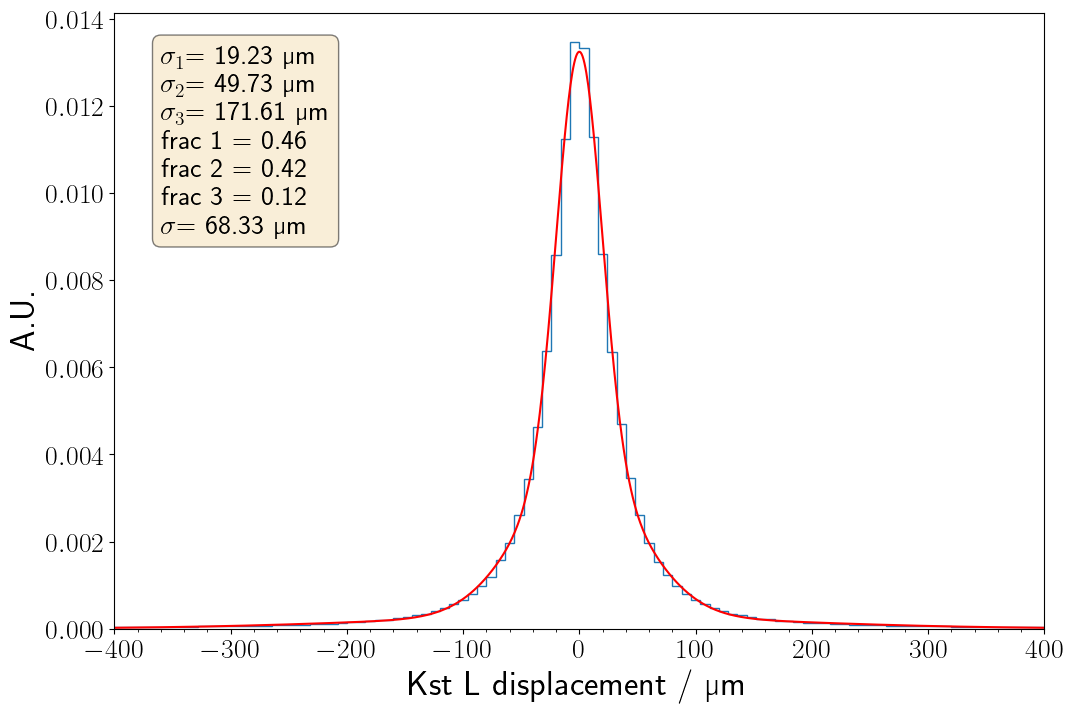

In [23]:
x_range = np.linspace(-400, 400, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, histtype = "step", range=(-400,400), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-400, 400)
plt.xlabel("Kst L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [24]:
obs = zfit.Space("x", limits = (-200, 200))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 10, 1, 25)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 80)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 100, 40, 150)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a+=1

In [25]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Tau_l[(displacement_Tau_l > -200) & (displacement_Tau_l < 200)], weights = None)

In [26]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       27079.12171 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 27079.12171
  Internal parameters:
                0
                0
    -0.2526802551
                0
    0.09103477804
  Internal gradient  :
      399086.8629
      529242.1514
     -168317.5159
      82129.55772
                0
  Internal covariance matrix:
  2.8234106e-08              0              0              0              0
              0  2.9117066e-08              0              0              0
              0              0  1.8082485e-06              0              0
              0              0              0  6.5875731e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       27079.12171 NC

33.251313349975185


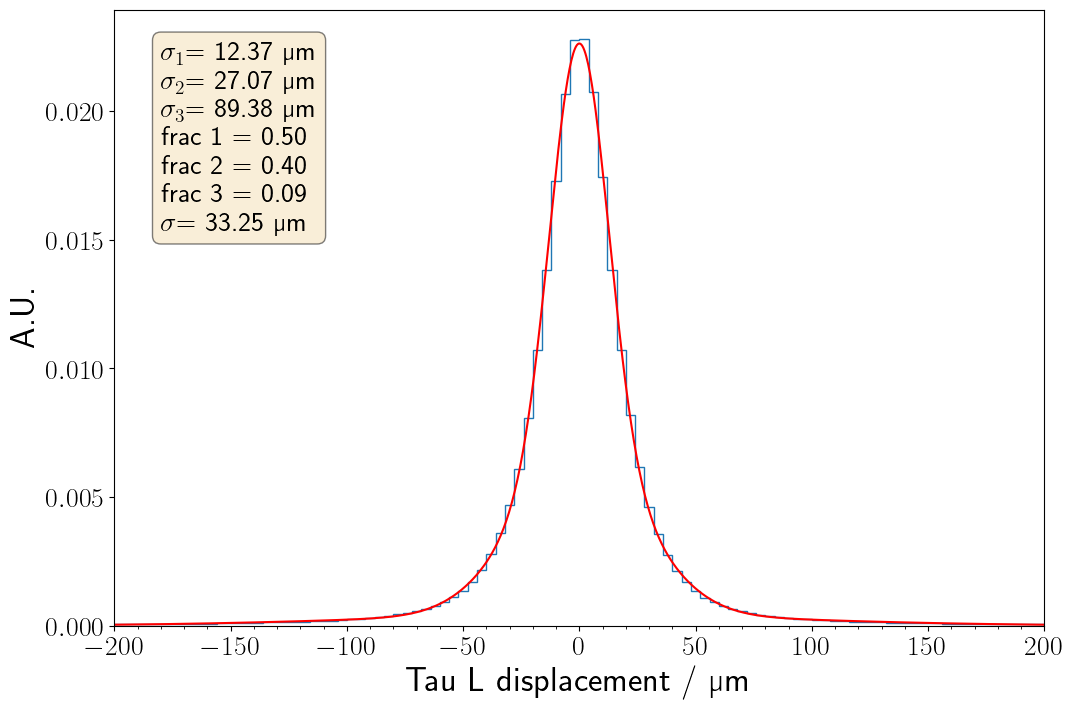

In [27]:
x_range = np.linspace(-200, 200, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Tau_l, bins = 100, histtype = "step", range=(-200,200), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-200, 200)
plt.xlabel("Tau L displacement / µm")
plt.ylabel("A.U.");

In [28]:
print(model.params["frac_2"].value())
def trigauss(x,mu,s1,f1,s2,f2,s3):
    f3=1-f1-f2
    result=f1*(1/((2*np.pi*s1**2)**0.5))*np.exp(-((x-mu)**2)/(2*s1**2))+f2*(1/((2*np.pi*s2**2)**0.5))*np.exp(-((x-mu)**2)/(2*s2**2))+f3*(1/((2*np.pi*s3**2)**0.5))*np.exp(-((x-mu)**2)/(2*s3**2))
    return result
print(np.max(pdf))


tf.Tensor(0.09169480204582214, shape=(), dtype=float64)
0.02263825778086393


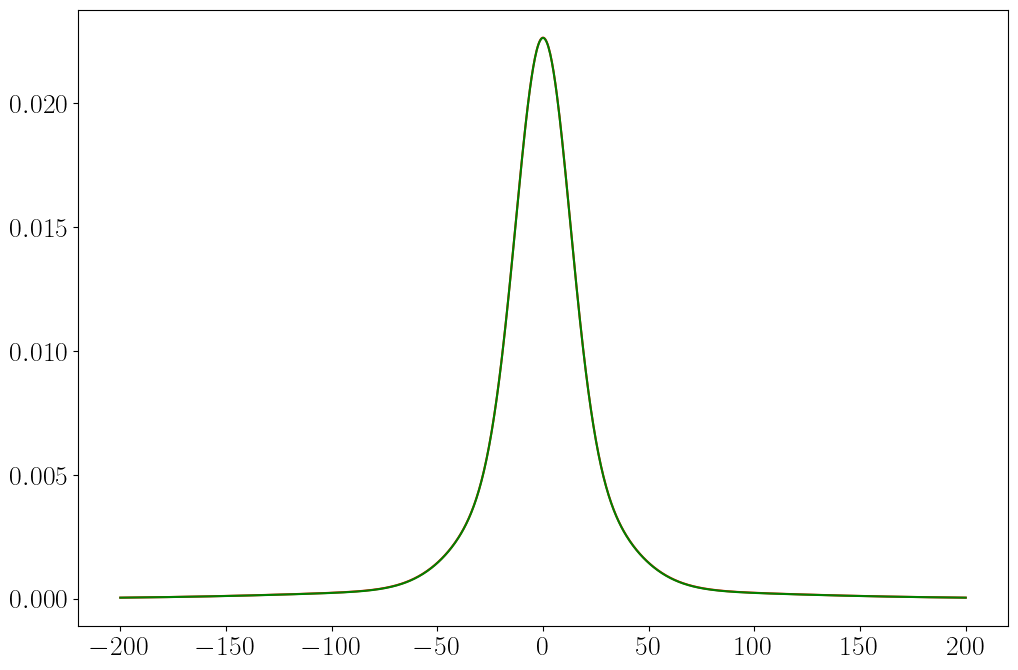

In [29]:
x_range=np.linspace(-200,200,1000)
res=trigauss(x_range,0.,12.3745,0.504848,27.0747,0.403457,89.3839)

plt.figure(figsize=(12,8))
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
plt.plot(x_range, res, color="green");

Wrong transverse resolution determination (random numbers via CB don't reproduce the behaviour of two "gaussian" resolution in plan (x',y'))

Text(0, 0.5, 'A.U.')

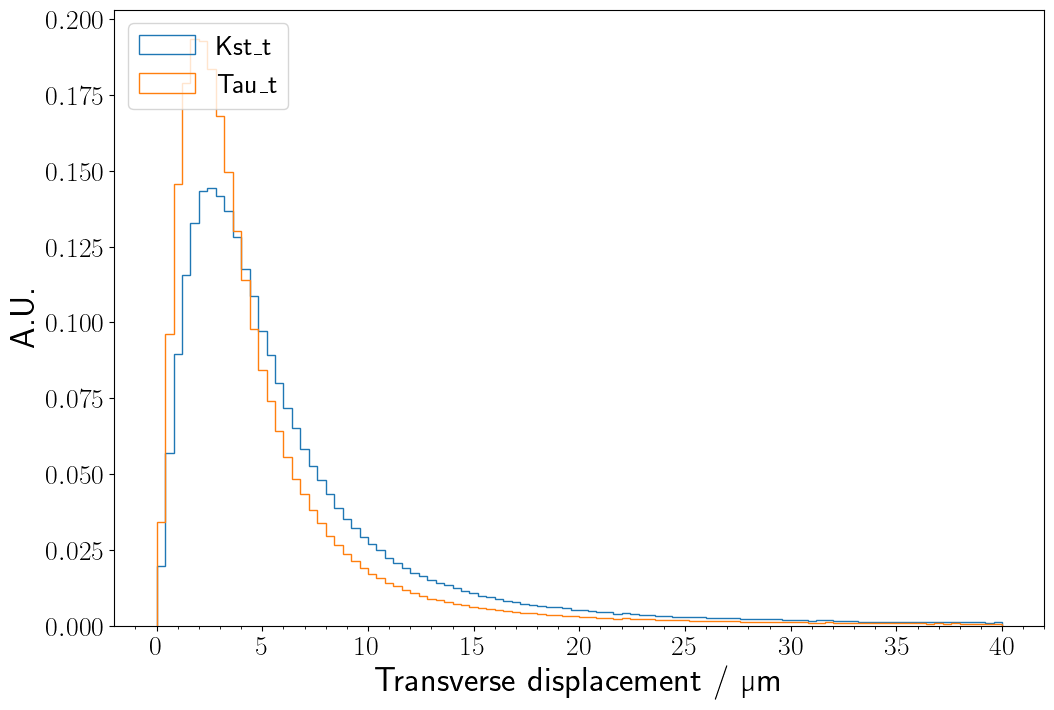

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Kst_t")
plt.hist(displacement_Tau_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Tau_t")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement / µm")
plt.ylabel("A.U.")

obs = zfit.Space("x", limits = (0, 40))

mu1 = zfit.Parameter(f"{a}_mu1", 5.0, 2, 10)
sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 1, 10)
alpha1 = zfit.Parameter(f"{a}_alpha1", -0.5, -1, 0.)
n1 = zfit.Parameter(f"{a}_n1", 10., 0., 200.)

model = zfit.pdf.CrystalBall(obs=obs,mu=mu1, sigma=sigma1, alpha=alpha1, n=n1 )

a+=1

data = zfit.Data.from_numpy(obs = obs, array=displacement_Kst_t[(displacement_Kst_t < 40)], weights = None)

nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

x_range = np.linspace(0, 40, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_t, bins = 100, histtype = "step", range=(0, 40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
textstr = f"$\\mu$= {params[mu1]['value']:.2f} µm \n $\\sigma$= {params[sigma1]['value']:.2f} µm  \n$\\alpha$= {params[alpha1]['value']:.2f} \n$n$ = {params[n1]['value']:.2f}" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', horizontalalignment='left', bbox=props)

plt.xlim(0, 40)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

obs = zfit.Space("x", limits = (0, 40))

mu1 = zfit.Parameter(f"{a}_shared_mu", 5.0, 2, 10)
sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 1, 10)
alpha1 = zfit.Parameter(f"{a}_alpha1", -0.5, -1, 0.)
n1 = zfit.Parameter(f"{a}_n1", 10., 0., 200.)

model = zfit.pdf.CrystalBall(obs=obs,mu=mu1, sigma=sigma1, alpha=alpha1, n=n1 )

a+=1

data = zfit.Data.from_numpy(obs = obs, array=displacement_Tau_t[(displacement_Tau_t < 40)], weights = None)

nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

x_range = np.linspace(0, 40, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Tau_t, bins = 100, histtype = "step", range=(0,40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
textstr = f"$\\mu$= {params[mu1]['value']:.2f} µm \n $\\sigma$= {params[sigma1]['value']:.2f} µm  \n$\\alpha$= {params[alpha1]['value']:.2f} \n$n$ = {params[n1]['value']:.2f}" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', horizontalalignment='left', bbox=props)

plt.xlim(0, 40)
plt.xlabel("Tau T displacement / µm")
plt.ylabel("A.U.");

print(np.max(pdf))

def CBpdf(x, mu, sigma, alpha, n):
    A=((n/abs(alpha))**n)*np.exp((-(abs(alpha))**2)/2)
    B=(n/abs(alpha))-abs(alpha)
    mask_part_under=(((x-mu)/sigma)<=alpha)
    mask_part_over=~mask_part_under
    res_under=np.exp(-((x-mu)**2)/(2*sigma**2))
    res_over=A*(B+((x-mu)/sigma))**(-n)
    res_over[np.isnan(res_over)]=0
    res=res_over*mask_part_over+res_under*mask_part_under
    return res

mu=2.11296
sigma=1.09284
alpha=0.470157
n=3.76879
print(alpha*sigma+mu)
x_range=np.linspace(0,40,1000)

result=CBpdf(x_range, mu, sigma, alpha, n)*0.21753953562298475
print(np.max(result))

#print(result)
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())

plt.plot(x_range, result,color="green")
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

plt.xlim(0, 40)



size=100000
def sampleCB(size, mn, mx, bound,mu, sigma, alpha, n):
    mn=0. # Lowest value of domain
    mx=40. # Highest value of domain
    bound=1 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < 0.)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=CBpdf(x, mu, sigma, alpha, n)*bound# not normalised pdf but not composite -> N=max()
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X

generate_T=sampleCB(size,0.,40.,0.21753953562298475,2.11296,1.09284,0.470157,3.76879)
#print(np.shape(generate_T))
#print(generate_T)

plt.figure(figsize=(12,8))
plt.hist(generate_T, bins=100, histtype = "step", range=(0,40), density=True)
plt.plot(x_range, result,color="green");

rd_sign=np.random.randint(2,size=size)
print(rd_sign)

generate_T=-generate_T*(rd_sign==0)+generate_T*(rd_sign!=0)

plt.figure(figsize=(12,8))
plt.hist(generate_T, bins=100, histtype = "step", range=(-40,40), density=True)

size=100000
def sampletriGau(size, mn, mx, bound, mu, s1, f1, s2, f2, s3):
    # mn=-200. # Lowest value of domain
    # mx=200. # Highest value of domain
    # bound=0.02263825778086393 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < mn-1)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=trigauss(x, mu, s1, f1, s2, f2, s3)
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X

generate_L=sampletriGau(size,-200.,200.,0.02263825778086393,0.,12.3745,0.504848,27.0747,0.403457,89.3839)
x_range=np.linspace(-200,200,1000)
plt.figure(figsize=(12,8))
plt.hist(generate_L, bins=100, histtype = "step", range=(-200,200), density=True)
plt.plot(x_range, trigauss(x_range,0.,12.3745,0.504848,27.0747,0.403457,89.3839),color="green");

plt.figure(figsize=(12,8))
plt.hist2d(generate_T,generate_L, bins=100, range=[[-40,40],[-100,100]], cmap="viridis")
plt.xlabel("$D_T$")
plt.ylabel("$D_L$")
plt.colorbar();

generate_1=np.random.normal(loc=0.0, scale=3., size=size)
generate_2=np.random.normal(loc=0.0, scale=3, size=size)
plt.hist2d(generate_1,generate_2, bins=100, range=[[-100,100],[-100,100]], cmap="viridis")
plt.colorbar();

generate_DT=np.sqrt(generate_1**2+generate_2**2)
plt.hist(np.sqrt(generate_1**2+generate_2**2),bins=100)

obs = zfit.Space("x", limits = (0, 15))

mu1 = zfit.Parameter(f"{a}_mu1", 3.0, 2, 10)
sigma1 = zfit.Parameter(f"{a}_sigma1", 2, 1, 10)
alpha1 = zfit.Parameter(f"{a}_alpha1", -0.5, -3, 0.)
n1 = zfit.Parameter(f"{a}_n1", 10., 0., 200.)

model = zfit.pdf.CrystalBall(obs=obs,mu=mu1, sigma=sigma1, alpha=alpha1, n=n1 )

a+=1

data = zfit.Data.from_numpy(obs = obs, array=generate_DT, weights = None)

nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 10)
result = minimizer.minimize(nll)
params = result.params
print(params)

x_range = np.linspace(0, 15, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(generate_DT, bins = 100, histtype = "step", range=(0, 40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
textstr = f"$\\mu$= {params[mu1]['value']:.2f} µm \n $\\sigma$= {params[sigma1]['value']:.2f} µm  \n$\\alpha$= {params[alpha1]['value']:.2f} \n$n$ = {params[n1]['value']:.2f}" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', horizontalalignment='left', bbox=props)

plt.xlim(0, 40)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

def dougauss(x,mu,s1,f1,s2):
    f2=1-f1
    result=f1*(1/((2*np.pi*s1**2)**0.5))*np.exp(-((x-mu)**2)/(2*s1**2))+f2*(1/((2*np.pi*s2**2)**0.5))*np.exp(-((x-mu)**2)/(2*s2**2))
    return result

def sampledouGau(size, mn, mx, bound, mu, s1, f1, s2):
    # mn=-200. # Lowest value of domain
    # mx=200. # Highest value of domain
    # bound=0.02263825778086393 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < mn-1)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=dougauss(x, mu, s1, f1, s2)
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X

generate_1=sampletriGau(size,-200.,200.,0.1630841003078634,0,2.7,0.5,7,0.4,20)
generate_2=sampletriGau(size,-200.,200.,0.1630841003078634,0,2.7,0.5,7,0.4,20)
x_range=np.linspace(-200,200,1000)
generate_DT=np.sqrt(generate_1**2+generate_2**2)
res=plt.hist(np.sqrt(generate_1**2+generate_2**2),bins=100,range=(0,40))
print(res)

def dougauss(x,mu,s1,f1,s2):
    f2=1-f1
    result=f1*(1/((2*np.pi*s1**2)**0.5))*np.exp(-((x-mu)**2)/(2*s1**2))+f2*(1/((2*np.pi*s2**2)**0.5))*np.exp(-((x-mu)**2)/(2*s2**2))
    return result

X=np.linspace(-20,20,100)
plt.plot(X,dougauss(X,0,2,0.75,7))
res=dougauss(X,0,2,0.75,7)
print(np.max(res))

generate_1=sampledouGau(size,-200.,200.,0.02263825778086393,0.,12.3745,0.504848,27.0747,0.403457,89.3839)
generate_2=sampledouGau(size,-200.,200.,0.02263825778086393,0.,12.3745,0.504848,27.0747,0.403457,89.3839)
x_range=np.linspace(-200,200,1000)

smear_SV=np.random.multivariate_normal([0.0,0.0],[[5**2,0],[0,20**2]],size=size)
plt.hist2d(smear_SV[:,0],smear_SV[:,1], bins=100, range=[[-100,100],[-100,100]], cmap="viridis")
plt.colorbar();

def CBpdf(x, mu, sigma, alpha, n):# CB pdf definition
    A=((n/abs(alpha))**n)*np.exp((-(abs(alpha))**2)/2)
    B=(n/abs(alpha))-abs(alpha)
    mask_part_under=(((x-mu)/sigma)<=alpha)
    mask_part_over=~mask_part_under
    res_under=np.exp(-((x-mu)**2)/(2*sigma**2))
    res_over=A*(B+((x-mu)/sigma))**(-n)
    res_over[np.isnan(res_over)]=0
    res=res_over*mask_part_over+res_under*mask_part_under
    return res

def trigauss(x,mu,s1,f1,s2,f2,s3):# 3 gaussian pdf definition
    f3=1-f1-f2
    result=f1*(1/((2*np.pi*s1**2)**0.5))*np.exp(-((x-mu)**2)/(2*s1**2))+f2*(1/((2*np.pi*s2**2)**0.5))*np.exp(-((x-mu)**2)/(2*s2**2))+f3*(1/((2*np.pi*s3**2)**0.5))*np.exp(-((x-mu)**2)/(2*s3**2))
    return result

def sampleCB(size, mn, mx, bound,mu, sigma, alpha, n):# accept/reject based random generation form CB model
    # mn=0. # Lowest value of domain
    # mx=40. # Highest value of domain
    # bound=1 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < 0.)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=CBpdf(x, mu, sigma, alpha, n)*bound# not normalised pdf but not composite -> N=max()
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X

def sampletriGau(size, mn, mx, bound, mu, s1, f1, s2, f2, s3):# accept/reject based random generation form 3 gaussian model
    # mn=-200. # Lowest value of domain
    # mx=200. # Highest value of domain
    # bound=0.02263825778086393 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < mn-1)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=trigauss(x, mu, s1, f1, s2, f2, s3)
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X




size=100000

generate_T=sampleCB(size,0.,40.,0.21753953562298475,2.11296,1.09284,0.470157,3.76879)
rd_sign=np.random.randint(2,size=size)
generate_T=-generate_T*(rd_sign==0)+generate_T*(rd_sign!=0)
generate_L=sampletriGau(size,-200.,200.,0.02263825778086393,0.,12.3745,0.504848,27.0747,0.403457,89.3839)

plt.figure(figsize=(12,8))
plt.hist2d(generate_T,generate_L, bins=100, range=[[-20,20],[-100,100]], cmap="viridis")
plt.xlabel("$D_T$ / µm")
plt.ylabel("$D_L$ / µm")
plt.title("$\\tau$ smearing")
plt.colorbar();

size=100000

generate_T=sampleCB(size,0.,40.,0.16240059480300156,2.66463,1.36084,0.404156,4.21395)
rd_sign=np.random.randint(2,size=size)
generate_T=-generate_T*(rd_sign==0)+generate_T*(rd_sign!=0)
generate_L=sampletriGau(size,-400.,400.,0.013247875239630124,0.,19.2314,0.463158,49.7349,0.419312,171.606)

plt.figure(figsize=(12,8))
plt.hist2d(generate_T,generate_L, bins=100, range=[[-20,20],[-200,200]], cmap="viridis")
plt.xlabel("$D_T$ / µm")
plt.ylabel("$D_L$ / µm")
plt.title("$K^*$ smearing")
plt.colorbar();

Right transverse resolution determination (via projection of the transverse displacement on unitary basis of the transverse plan pick-up randomly)

For SV (Kst->KPi):

[ 815.33306737 -691.3789121  2433.85798367 ... 2224.64297419 1231.00877398
   22.1797571 ]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 5.55111512e-17  1.38777878e-17 -3.46944695e-18 ...  2.77555756e-17
 -5.55111512e-17  0.00000000e+00]
[ 0.00000000e+00  0.00000000e+00 -2.35271871e-17 ...  0.00000000e+00
  1.11022302e-16  0.00000000e+00]
[-1.42108547e-14  4.42978987e-14  1.38777878e-17 ... -9.93649607e-14
  7.16093851e-15  2.37865283e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


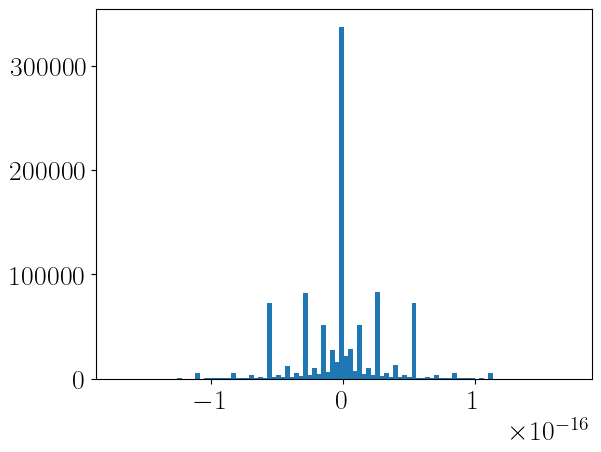

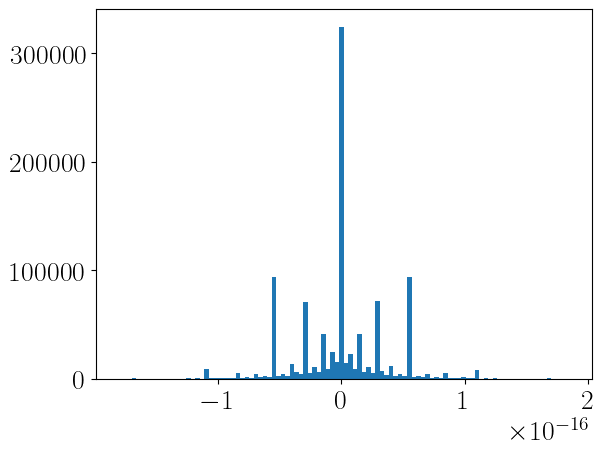

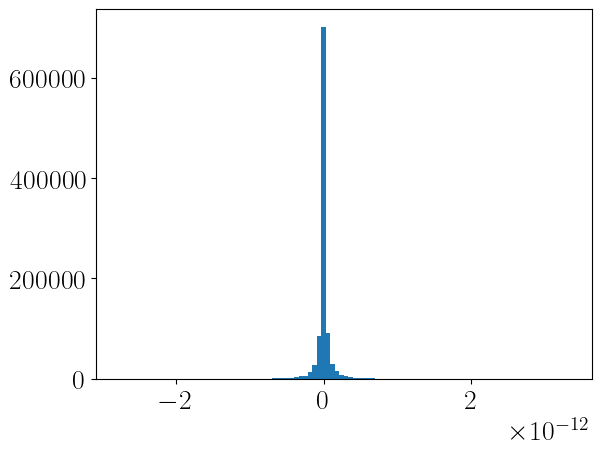

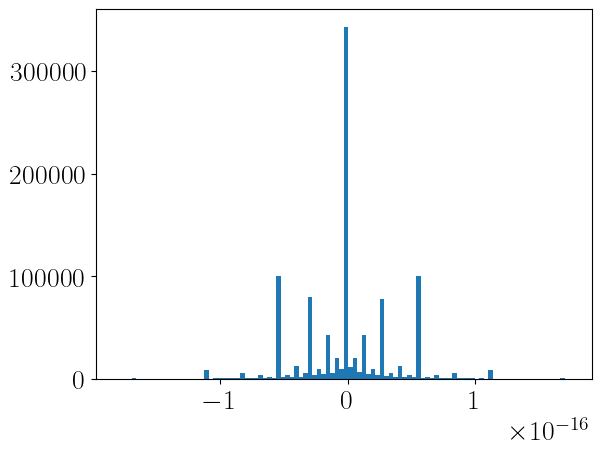

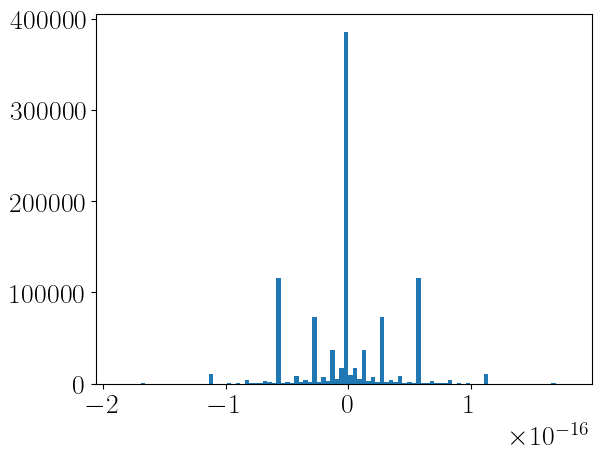

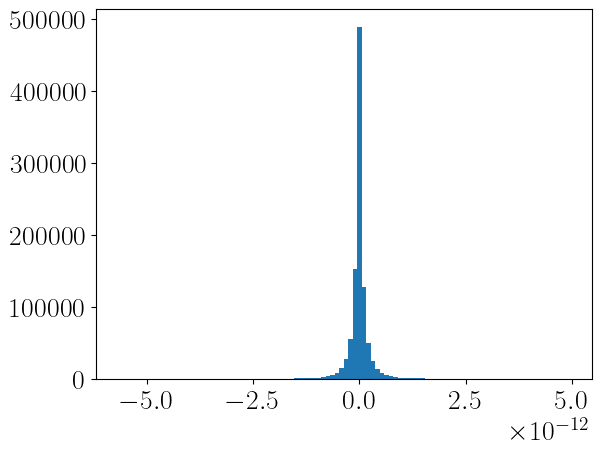

In [47]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeKst=len(Kst_mc_x)
Kst_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_rdvec_x=Kst_mc_x+np.cos(Kst_rdvec_angle)
Kst_rdvec_y=Kst_mc_y+np.sin(Kst_rdvec_angle)
print(Kst_rdvec_x)

Kst_rdvec_z=(-(Kst_uLx*(Kst_rdvec_x-Kst_mc_x)+Kst_uLy*(Kst_rdvec_y-Kst_mc_y))/Kst_uLz)+Kst_mc_z
Kst_uyp_x=Kst_rdvec_x-Kst_mc_x
Kst_uyp_y=Kst_rdvec_y-Kst_mc_y
Kst_uyp_z=Kst_rdvec_z-Kst_mc_z
Kst_uyp_norm=np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2)
Kst_uyp_x=Kst_uyp_x/Kst_uyp_norm
Kst_uyp_y=Kst_uyp_y/Kst_uyp_norm
Kst_uyp_z=Kst_uyp_z/Kst_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2))

Kst_uxp_x=(Kst_uyp_y*Kst_uLz-Kst_uyp_z*Kst_uLy)
Kst_uxp_y=(Kst_uyp_z*Kst_uLx-Kst_uyp_x*Kst_uLz)
Kst_uxp_z=(Kst_uyp_x*Kst_uLy-Kst_uyp_y*Kst_uLx)

print(np.sqrt(Kst_uxp_x**2+Kst_uxp_y**2+Kst_uxp_z**2))
print(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z)
print(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz)
print(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z)
plt.figure()
plt.hist(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z, bins=100)
plt.figure()
plt.hist(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz, bins=100)
plt.figure()
plt.hist(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Kst_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_newpoint_x=Kst_mc_x+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_x+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_x
Kst_newpoint_y=Kst_mc_y+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_y+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_y
Kst_newpoint_z=Kst_mc_z+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_z+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_z

Kst_newuyp_x=Kst_newpoint_x-Kst_mc_x
Kst_newuyp_y=Kst_newpoint_y-Kst_mc_y
Kst_newuyp_z=Kst_newpoint_z-Kst_mc_z

Kst_newuxp_x=(Kst_newuyp_y*Kst_uLz-Kst_newuyp_z*Kst_uLy)
Kst_newuxp_y=(Kst_newuyp_z*Kst_uLx-Kst_newuyp_x*Kst_uLz)
Kst_newuxp_z=(Kst_newuyp_x*Kst_uLy-Kst_newuyp_y*Kst_uLx)

print(np.sqrt(Kst_newuxp_x**2+Kst_newuxp_y**2+Kst_newuxp_z**2))
print(np.sqrt(Kst_newuyp_x**2+Kst_newuyp_y**2+Kst_newuyp_z**2))

plt.figure()
plt.hist(Kst_newuxp_x*Kst_newuyp_x+Kst_newuxp_y*Kst_newuyp_y+Kst_newuxp_z*Kst_newuyp_z, bins=100)
plt.figure()
plt.hist(Kst_newuxp_x*Kst_uLx+Kst_newuxp_y*Kst_uLy+Kst_newuxp_z*Kst_uLz, bins=100)
plt.figure()
plt.hist(Kst_uLx*Kst_newuyp_x+Kst_uLy*Kst_newuyp_y+Kst_uLz*Kst_newuyp_z, bins=100);





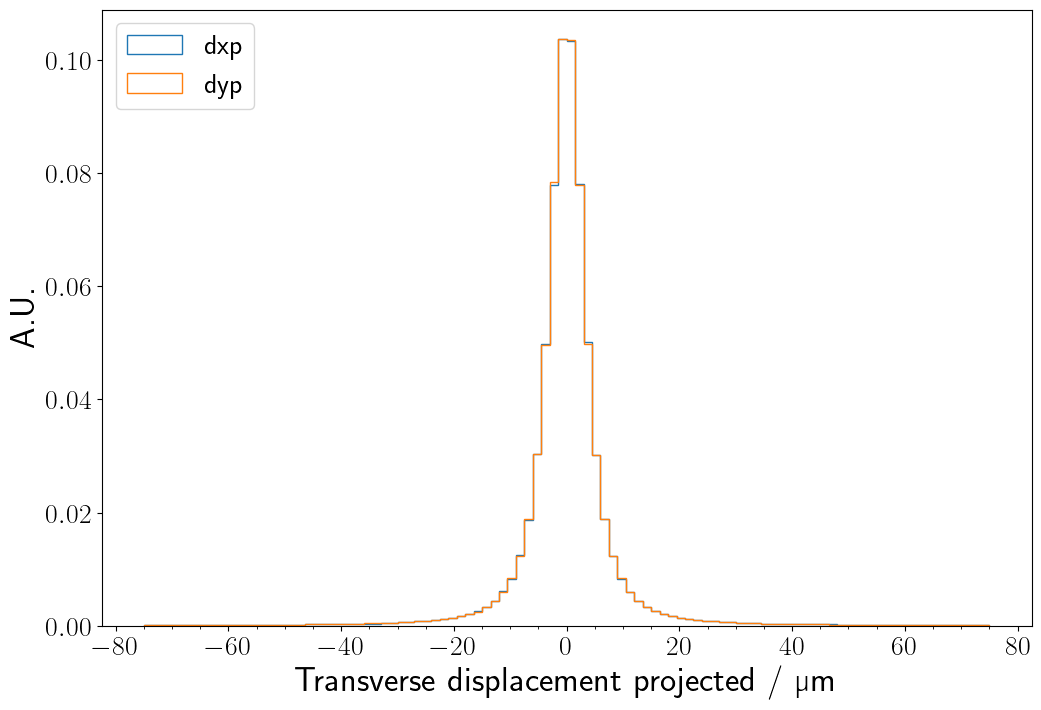

In [48]:
#building of the displacement on (x',y')
Kst_dxp=Kst_newuxp_x*Kst_dx+Kst_newuxp_y*Kst_dy+Kst_newuxp_z*Kst_dz
Kst_dyp=Kst_newuyp_x*Kst_dx+Kst_newuyp_y*Kst_dy+Kst_newuyp_z*Kst_dz
#cut of the events where the vertex reconstruction fails
Kst_dxp=Kst_dxp[Kst_rec_x!=0]
Kst_dyp=Kst_dyp[Kst_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_dxp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dxp")
plt.hist(Kst_dyp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");


Fit of the transverse resolution by concatenate the displacements on the two axis (we can because they are equivalent):

In [49]:
Kst_DTp=np.concatenate([Kst_dxp,Kst_dyp], axis=0)
obs = zfit.Space("x", limits = (-80, 80))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 15, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [50]:
data = zfit.Data.from_numpy(obs = obs, array=Kst_DTp[abs(Kst_DTp<80)], weights = None)

In [51]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       428267.2268 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 428267.2268
  Internal parameters:
                0
                0
    -0.4115168461
    -0.3398369095
     -1.008726524
  Internal gradient  :
     -569680.2817
 -1.431337501e-08
      110229.1213
       311396.745
                0
  Internal covariance matrix:
  2.4667828e-06              0              0              0              0
              0      151499.68              0              0              0
              0              0  8.5818247e-07              0              0
              0              0              0   9.302897e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       428267.2268 NC

8.827865927290013
0.1049870851346238


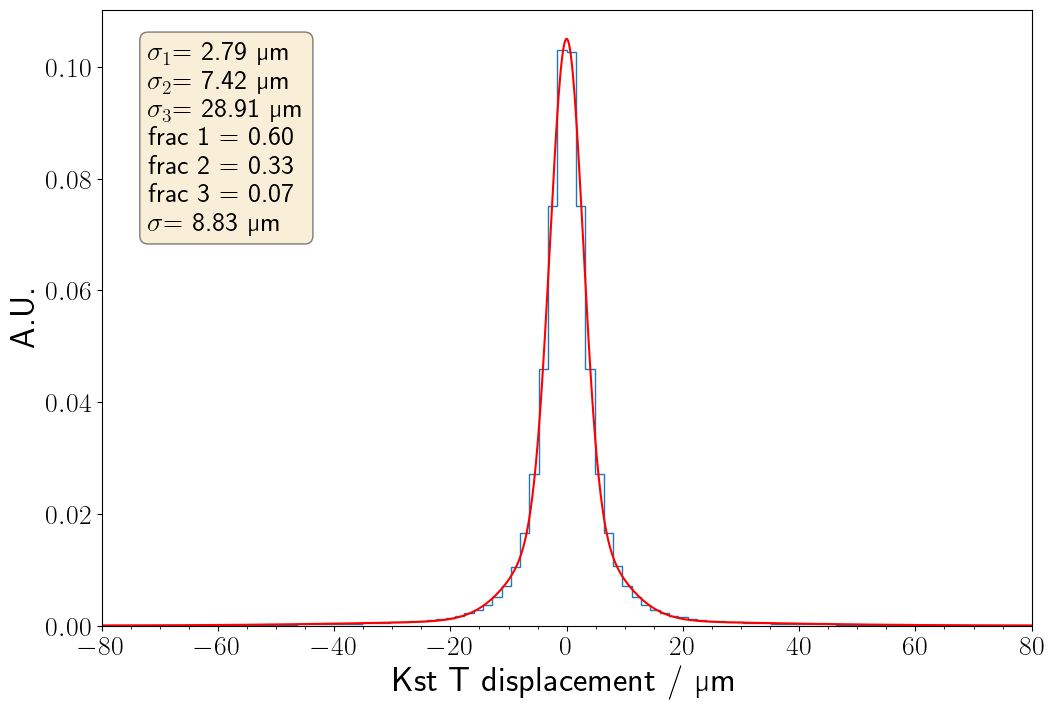

In [52]:
x_range = np.linspace(-80, 80, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_DTp, bins = 100, histtype = "step", range=(-80,80), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-80, 80)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

Check about consitancy between the previously determined DT and this new one:

=> OK

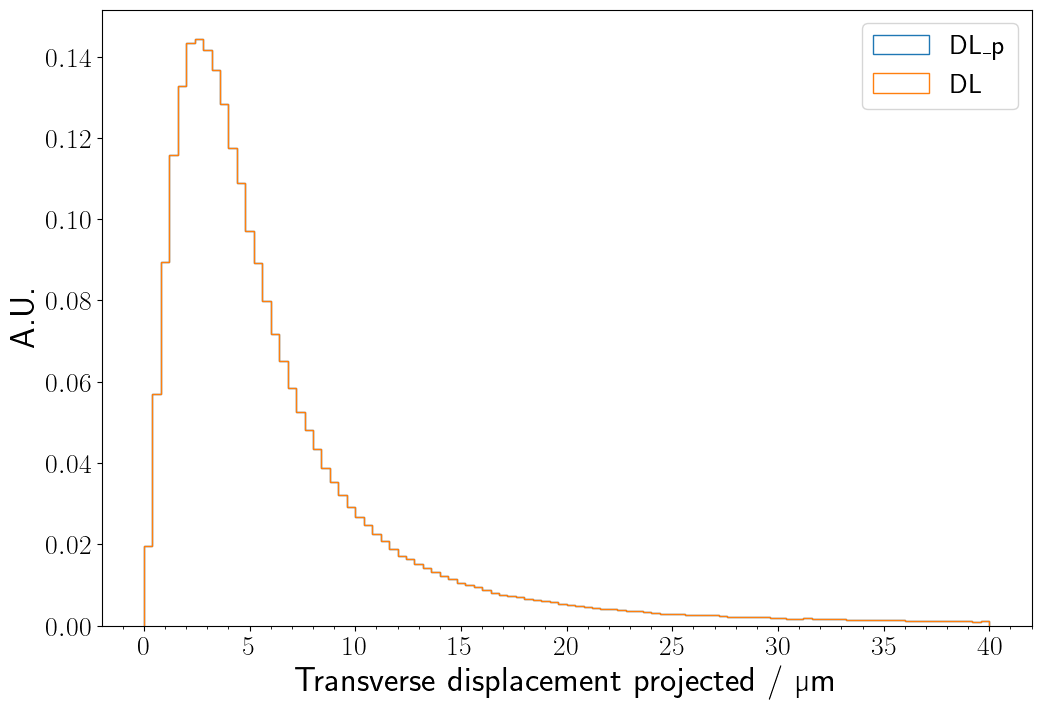

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(np.sqrt(Kst_dxp**2+Kst_dyp**2), bins = 100, range = (0, 40), histtype = "step", density = True, label = "DL_p")
plt.hist(displacement_Kst_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "DL")
#plt.hist(np.concatenate([Kst_dyp,Kst_dxp]), bins = 100, range = (-75, 75), histtype = "step", density = True, label = "merged")
plt.legend(loc = "upper right")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

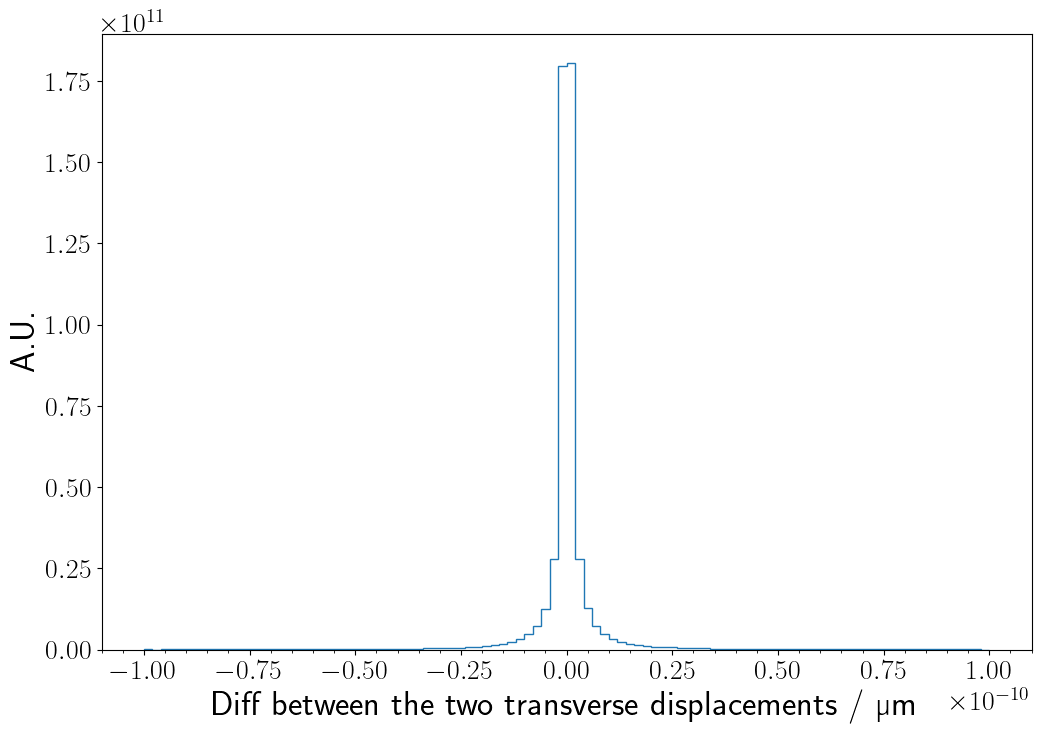

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(np.sqrt(Kst_dxp**2+Kst_dyp**2)-displacement_Kst_t, bins = 100, range = (-1e-10, 1e-10), histtype = "step", density = True)
#plt.hist(np.concatenate([Kst_dyp,Kst_dxp]), bins = 100, range = (-75, 75), histtype = "step", density = True, label = "merged")
plt.xlabel("Diff between the two transverse displacements / µm")
plt.ylabel("A.U.");

for TV (Tau->3Pi):

[ 825.61617024 1042.35176364 -807.22820587 ...   -2.85615811    3.41222395
   49.49152623]


/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_3619/2257746477.py:10: RuntimeWarning: invalid value encountered in divide
  Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 0.00000000e+00  0.00000000e+00  2.77555756e-17 ...  5.55111512e-17
 -5.55111512e-17 -2.77555756e-17]
[ 5.55111512e-17  0.00000000e+00 -5.55111512e-17 ...  8.32667268e-17
  2.77555756e-17  0.00000000e+00]
[-9.48130463e-14  3.91908728e-14  3.60822483e-14 ... -3.41393580e-15
 -8.32667268e-15 -1.11022302e-15]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


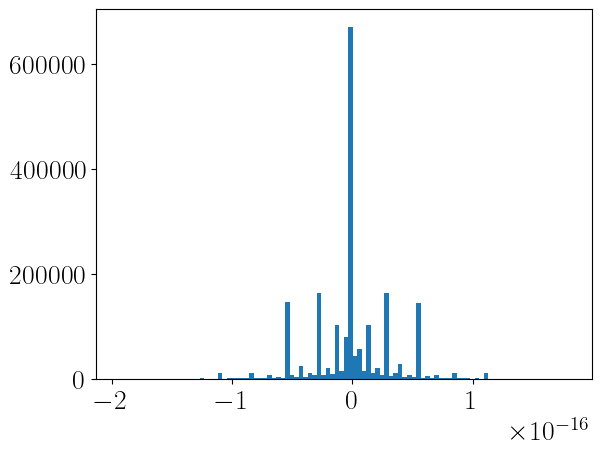

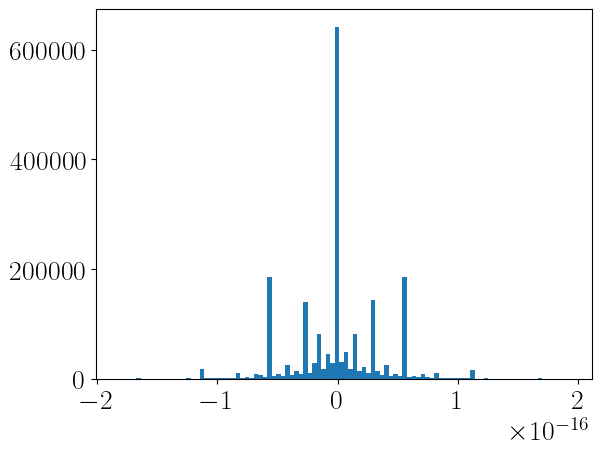

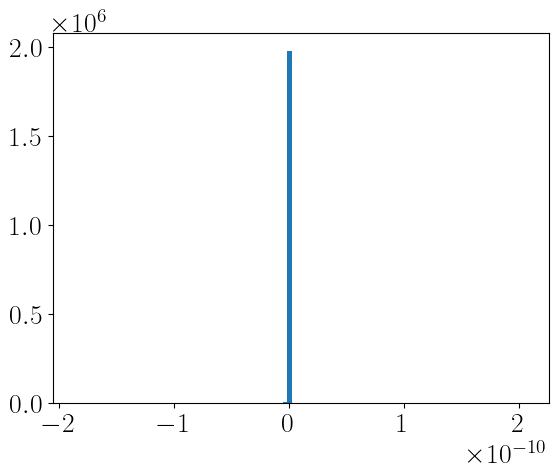

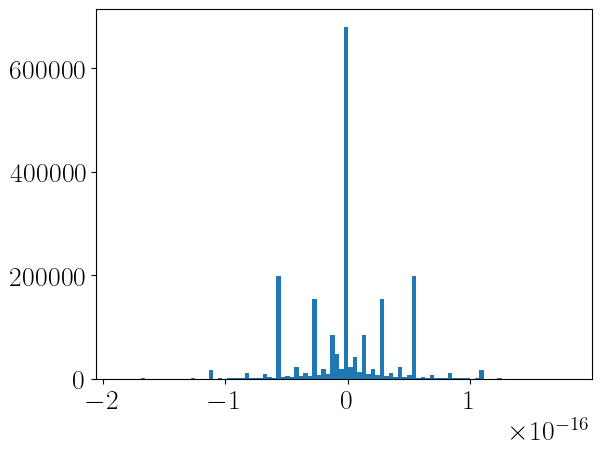

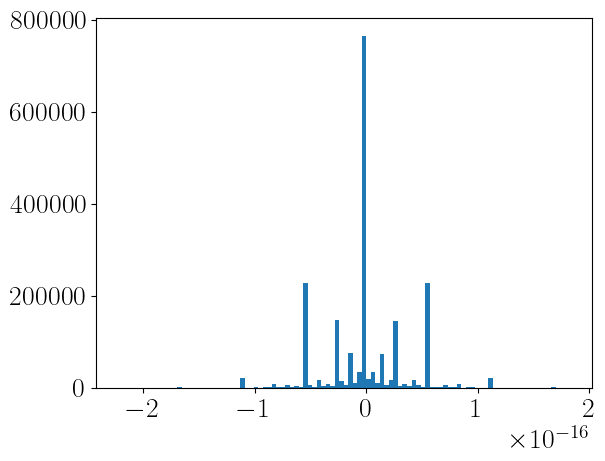

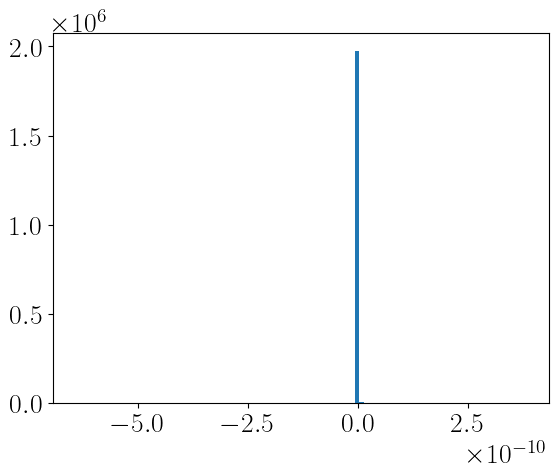

In [39]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeTau=len(Tau_mc_x)
Tau_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_rdvec_x=Tau_mc_x+np.cos(Tau_rdvec_angle)
Tau_rdvec_y=Tau_mc_y+np.sin(Tau_rdvec_angle)
print(Tau_rdvec_x)

Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z
Tau_uyp_x=Tau_rdvec_x-Tau_mc_x
Tau_uyp_y=Tau_rdvec_y-Tau_mc_y
Tau_uyp_z=Tau_rdvec_z-Tau_mc_z
Tau_uyp_norm=np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2)
Tau_uyp_x=Tau_uyp_x/Tau_uyp_norm
Tau_uyp_y=Tau_uyp_y/Tau_uyp_norm
Tau_uyp_z=Tau_uyp_z/Tau_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2))

Tau_uxp_x=(Tau_uyp_y*Tau_uLz-Tau_uyp_z*Tau_uLy)
Tau_uxp_y=(Tau_uyp_z*Tau_uLx-Tau_uyp_x*Tau_uLz)
Tau_uxp_z=(Tau_uyp_x*Tau_uLy-Tau_uyp_y*Tau_uLx)

print(np.sqrt(Tau_uxp_x**2+Tau_uxp_y**2+Tau_uxp_z**2))
print(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z)
print(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz)
print(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z)
plt.figure()
plt.hist(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z, bins=100)
plt.figure()
plt.hist(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz, bins=100)
plt.figure()
plt.hist(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Tau_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_newpoint_x=Tau_mc_x+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_x+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_x
Tau_newpoint_y=Tau_mc_y+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_y+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_y
Tau_newpoint_z=Tau_mc_z+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_z+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_z

Tau_newuyp_x=Tau_newpoint_x-Tau_mc_x
Tau_newuyp_y=Tau_newpoint_y-Tau_mc_y
Tau_newuyp_z=Tau_newpoint_z-Tau_mc_z

Tau_newuxp_x=(Tau_newuyp_y*Tau_uLz-Tau_newuyp_z*Tau_uLy)
Tau_newuxp_y=(Tau_newuyp_z*Tau_uLx-Tau_newuyp_x*Tau_uLz)
Tau_newuxp_z=(Tau_newuyp_x*Tau_uLy-Tau_newuyp_y*Tau_uLx)

print(np.sqrt(Tau_newuxp_x**2+Tau_newuxp_y**2+Tau_newuxp_z**2))
print(np.sqrt(Tau_newuyp_x**2+Tau_newuyp_y**2+Tau_newuyp_z**2))

plt.figure()
plt.hist(Tau_newuxp_x*Tau_newuyp_x+Tau_newuxp_y*Tau_newuyp_y+Tau_newuxp_z*Tau_newuyp_z, bins=100)
plt.figure()
plt.hist(Tau_newuxp_x*Tau_uLx+Tau_newuxp_y*Tau_uLy+Tau_newuxp_z*Tau_uLz, bins=100)
plt.figure()
plt.hist(Tau_uLx*Tau_newuyp_x+Tau_uLy*Tau_newuyp_y+Tau_uLz*Tau_newuyp_z, bins=100);

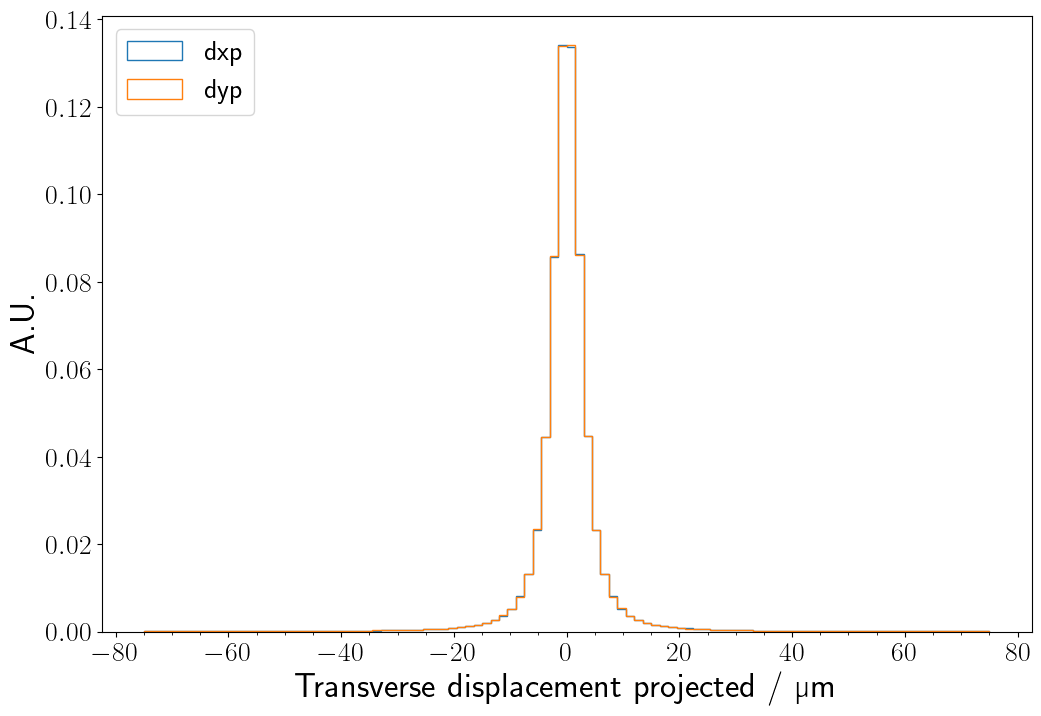

In [40]:
#building of the displacement on (x',y')
Tau_dxp=Tau_newuxp_x*Tau_dx+Tau_newuxp_y*Tau_dy+Tau_newuxp_z*Tau_dz
Tau_dyp=Tau_newuyp_x*Tau_dx+Tau_newuyp_y*Tau_dy+Tau_newuyp_z*Tau_dz
#cut of the events where the vertex reconstruction fails
Tau_dxp=Tau_dxp[Tau_rec_x!=0]
Tau_dyp=Tau_dyp[Tau_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_dxp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dxp")
plt.hist(Tau_dyp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

Fit of the transverse resolution by concatenate the displacements on the two axis (we can because they are equivalent):

In [41]:
Tau_DTp=np.concatenate([Tau_dxp,Tau_dyp], axis=0)
obs = zfit.Space("x", limits = (-80, 80))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 15, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [42]:
data = zfit.Data.from_numpy(obs = obs, array=Tau_DTp[abs(Tau_DTp<80)], weights = None)

In [43]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       -352115.011 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -33305.30561
  Edm           : 47154469.13
  Internal parameters:
                0
                0
    -0.4115168461
    -0.3983876913
     -1.008726524
  Internal gradient  :
     -1440840.508
      -30777.7639
      994819.5817
      587287.1335
                0
  Internal covariance matrix:
  1.3532909e-06              0              0              0              0
              0   0.0001873194              0              0              0
              0              0  6.1548618e-07              0              0
              0              0              0   0.0005364411              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -33305.30561 Edm =       471544

6.842489490643221
0.14014290369442506


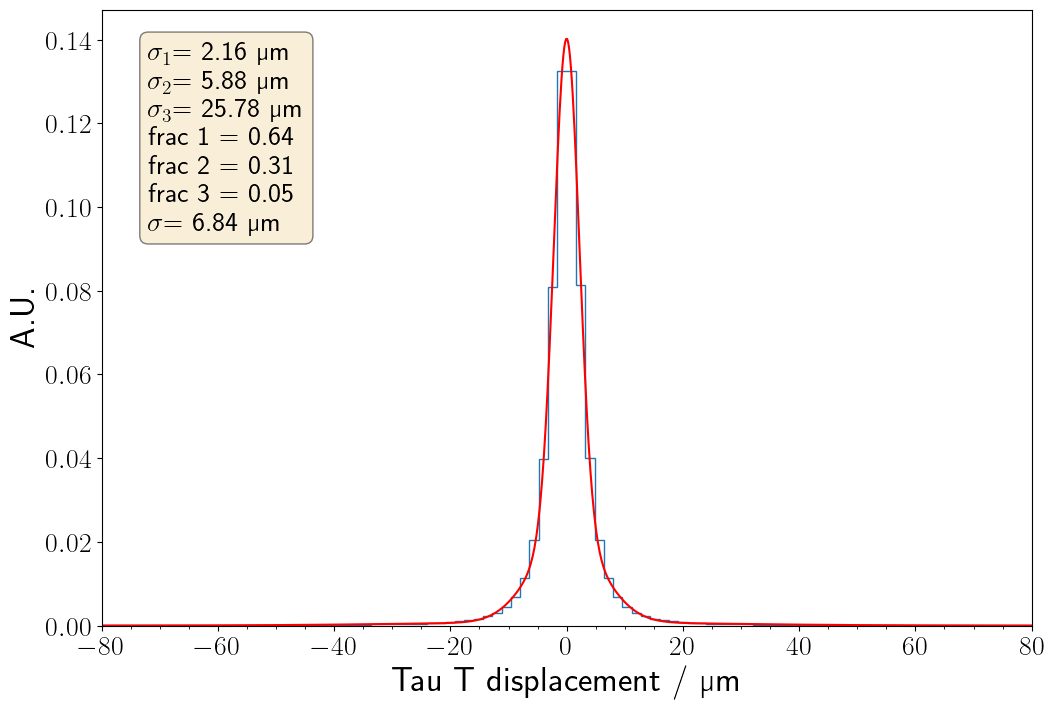

In [44]:
x_range = np.linspace(-80, 80, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_DTp, bins = 100, histtype = "step", range=(-80,80), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-80, 80)
plt.xlabel("Tau T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

Check about consitancy between the previously determined DT and this new one:

=> OK

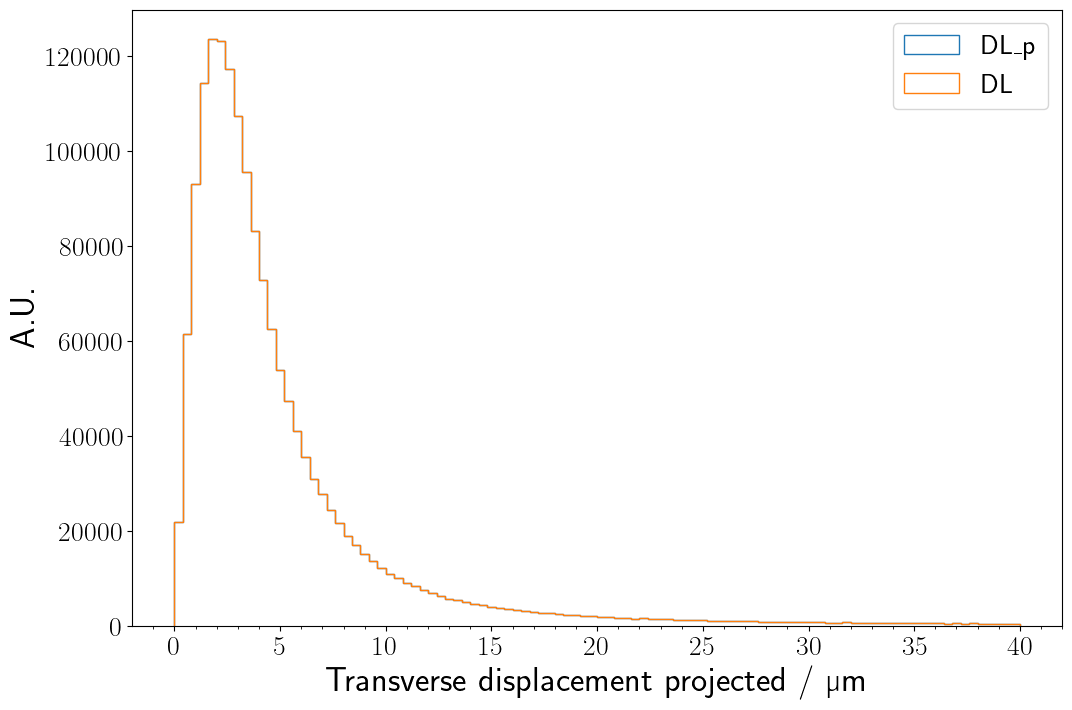

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(np.sqrt(Tau_dxp**2+Tau_dyp**2), bins = 100, range = (0, 40), histtype = "step", density = False, label = "DL_p")
plt.hist(displacement_Tau_t, bins = 100, range = (0, 40), histtype = "step", density = False, label = "DL")
#plt.hist(np.concatenate([Tau_dyp,Tau_dxp]), bins = 100, range = (-75, 75), histtype = "step", density = True, label = "merged")
plt.legend(loc = "upper right")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

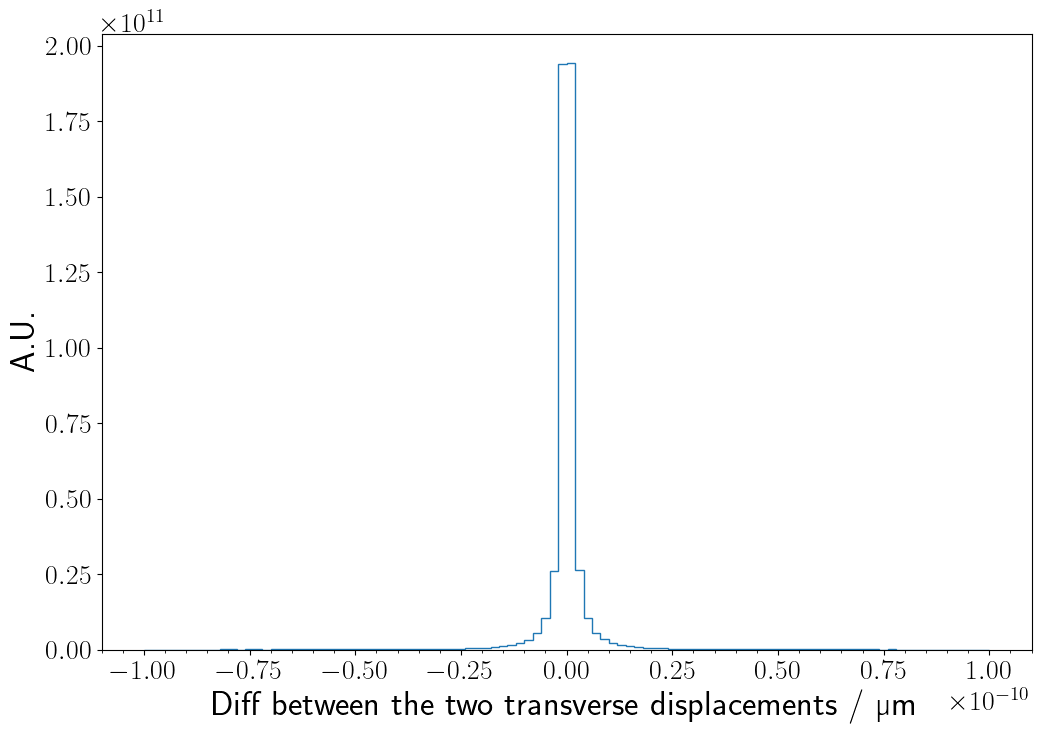

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(np.sqrt(Tau_dxp**2+Tau_dyp**2)-displacement_Tau_t, bins = 100, range = (-1e-10, 1e-10), histtype = "step", density = True)
#plt.hist(np.concatenate([Tau_dyp,Tau_dxp]), bins = 100, range = (-75, 75), histtype = "step", density = True, label = "merged")
plt.xlabel("Diff between the two transverse displacements / µm")
plt.ylabel("A.U.");

In [53]:
def CBpdf(x, mu, sigma, alpha, n):# CB pdf definition
    A=((n/abs(alpha))**n)*np.exp((-(abs(alpha))**2)/2)
    B=(n/abs(alpha))-abs(alpha)
    mask_part_under=(((x-mu)/sigma)<=alpha)
    mask_part_over=~mask_part_under
    res_under=np.exp(-((x-mu)**2)/(2*sigma**2))
    res_over=A*(B+((x-mu)/sigma))**(-n)
    res_over[np.isnan(res_over)]=0
    res=res_over*mask_part_over+res_under*mask_part_under
    return res

def trigauss(x,mu,s1,f1,s2,f2,s3):# 3 gaussian pdf definition
    f3=1-f1-f2
    result=f1*(1/((2*np.pi*s1**2)**0.5))*np.exp(-((x-mu)**2)/(2*s1**2))+f2*(1/((2*np.pi*s2**2)**0.5))*np.exp(-((x-mu)**2)/(2*s2**2))+f3*(1/((2*np.pi*s3**2)**0.5))*np.exp(-((x-mu)**2)/(2*s3**2))
    return result

def sampleCB(size, mn, mx, bound,mu, sigma, alpha, n):# accept/reject based random generation form CB model
    # mn=0. # Lowest value of domain
    # mx=40. # Highest value of domain
    # bound=1 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < 0.)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=CBpdf(x, mu, sigma, alpha, n)*bound# not normalised pdf but not composite -> N=max()
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X

def sampletriGau(size, mn, mx, bound, mu, s1, f1, s2, f2, s3):# accept/reject based random generation form 3 gaussian model
    # mn=-200. # Lowest value of domain
    # mx=200. # Highest value of domain
    # bound=0.02263825778086393 # Upper bound of PDF value
    X=np.full((size),-999.)
    while (np.count_nonzero(X < mn-1)!=0): # Do the following until a value is returned
       # Choose an X inside the desired sampling domain.
       x=np.random.uniform(mn,mx,np.count_nonzero(X == -999))
       # Choose a Y between 0 and the maximum PDF value.
       y=np.random.uniform(0,bound,np.count_nonzero(X == -999))
       # Calculate PDF
       pdf=trigauss(x, mu, s1, f1, s2, f2, s3)
       X[X == -999]=x*(y<=pdf)+(-999*(y>pdf))
       # Does (x,y) fall in the PDF?
    return X

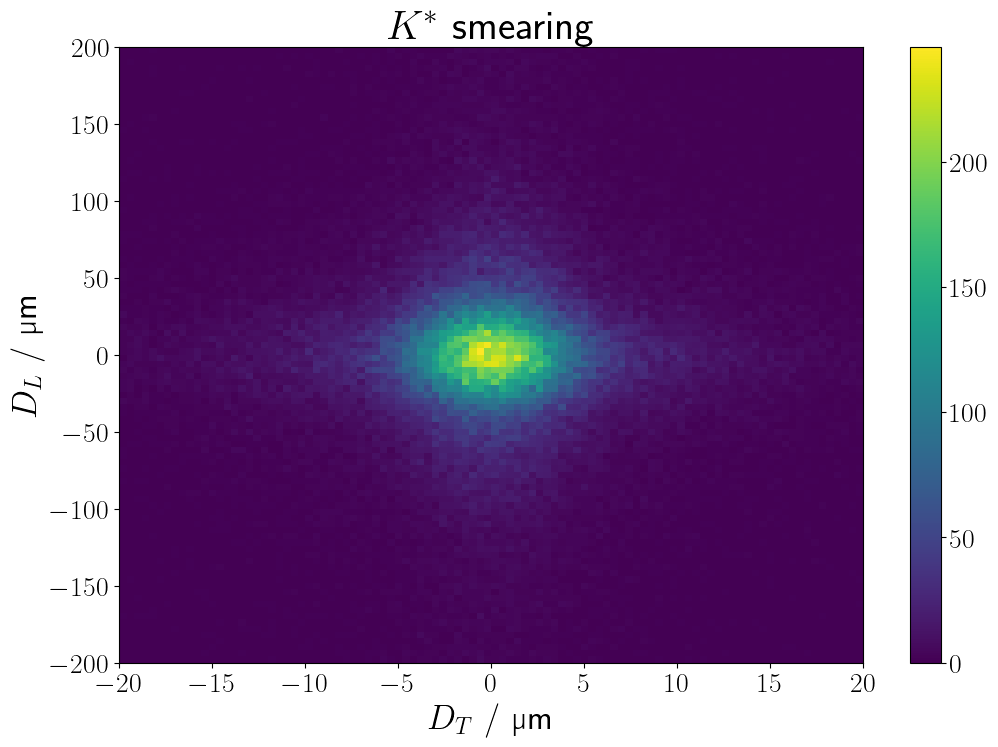

In [55]:
size=100000

generate_T=sampletriGau(size,-80.,80.,0.1049870851346238,0.,2.78856,0.603335,7.41655,0.330804,28.9095)
generate_L=sampletriGau(size,-400.,400.,0.013247875239630124,0.,19.2314,0.463158,49.7349,0.419312,171.606)

plt.figure(figsize=(12,8))
plt.hist2d(generate_T,generate_L, bins=100, range=[[-20,20],[-200,200]], cmap="viridis")
plt.xlabel("$D_T$ / µm")
plt.ylabel("$D_L$ / µm")
plt.title("$K^*$ smearing")
plt.colorbar();

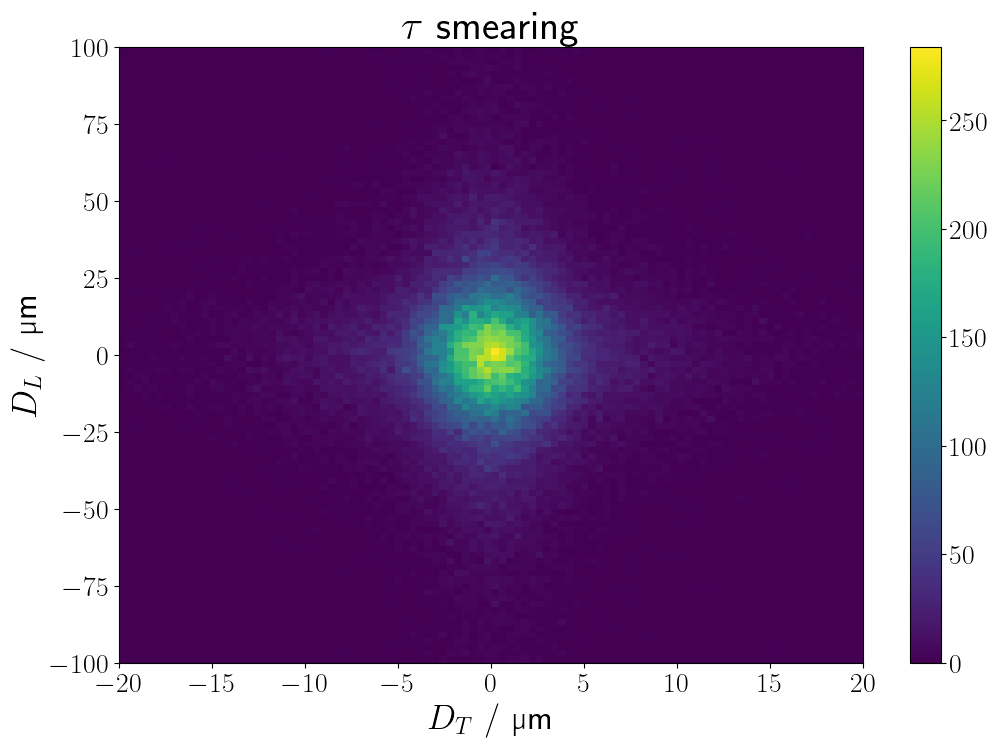

In [56]:
size=100000

generate_T=sampletriGau(size,-80.,80.,0.14014290369442506,0.,2.16384,0.643673,5.88183,0.306353,25.7778)
generate_L=sampletriGau(size,-200.,200.,0.02263825778086393,0.,12.3745,0.504848,27.0747,0.403457,89.3839)

plt.figure(figsize=(12,8))
plt.hist2d(generate_T,generate_L, bins=100, range=[[-20,20],[-100,100]], cmap="viridis")
plt.xlabel("$D_T$ / µm")
plt.ylabel("$D_L$ / µm")
plt.title("$\\tau$ smearing")
plt.colorbar();

# IDEA with best omega (x2)

In [4]:
vertex_resolution = ur.open("/Users/tristanmiralles/Desktop/FCC_stuff/IDEA_vertexing_study/p8_ee_Zbb_ecm91_EvtGen_Bd2KstarTauTau/vertex_resolution_last_smeared_omega0.root")
events = vertex_resolution["tree"]

In [5]:
PV_dx=np.array(ak.flatten(events["PV_dx"].array(library = "ak") * 10**3))
PV_dy=np.array(ak.flatten(events["PV_dy"].array(library = "ak") * 10**3))
PV_dz=np.array(ak.flatten(events["PV_dz"].array(library = "ak") * 10**3))

PV_rec_x=np.array(ak.flatten(events["PV_rec_x"].array(library = "ak") * 10**3))
PV_rec_y=np.array(ak.flatten(events["PV_rec_y"].array(library = "ak") * 10**3))
PV_rec_z=np.array(ak.flatten(events["PV_rec_z"].array(library = "ak") * 10**3))

print(len(PV_dx))

PV_dx=PV_dx[PV_rec_x!=0]
PV_dy=PV_dy[PV_rec_x!=0]
PV_dz=PV_dz[PV_rec_x!=0]

print(len(PV_dx))

Kst_rec_x=np.array(ak.flatten(events["Kst_rec_x"].array(library = "ak") * 10**3))
Kst_rec_y=np.array(ak.flatten(events["Kst_rec_y"].array(library = "ak") * 10**3))
Kst_rec_z=np.array(ak.flatten(events["Kst_rec_z"].array(library = "ak") * 10**3))

Kst_mc_x=np.array(ak.flatten(events["Kst_mc_x"].array(library = "ak") * 10**3))
Kst_mc_y=np.array(ak.flatten(events["Kst_mc_y"].array(library = "ak") * 10**3))
Kst_mc_z=np.array(ak.flatten(events["Kst_mc_z"].array(library = "ak") * 10**3))
Kst_dx=np.array(ak.flatten(events["Kst_dx"].array(library = "ak") * 10**3))
Kst_dy=np.array(ak.flatten(events["Kst_dy"].array(library = "ak") * 10**3))
Kst_dz=np.array(ak.flatten(events["Kst_dz"].array(library = "ak") * 10**3))
Kst_uLx=np.array(ak.flatten(events["Kst_uLx"].array(library = "ak")))
Kst_uLy=np.array(ak.flatten(events["Kst_uLy"].array(library = "ak")))
Kst_uLz=np.array(ak.flatten(events["Kst_uLz"].array(library = "ak")))

displacement_Kst_l = np.array(ak.flatten(events["displacement_Kst_l"].array(library = "ak") * 10**3))
displacement_Kst_t = np.array(ak.flatten(events["displacement_Kst_t"].array(library = "ak") * 10**3))
print(len(displacement_Kst_l))
print(displacement_Kst_l)
displacement_Kst_l=displacement_Kst_l[Kst_rec_x!=0]
displacement_Kst_t=displacement_Kst_t[Kst_rec_x!=0]
print(len(displacement_Kst_l))
print(displacement_Kst_l)

Tau_rec_x=np.array(ak.flatten(events["Tau_rec_x"].array(library = "ak") * 10**3))
Tau_rec_y=np.array(ak.flatten(events["Tau_rec_y"].array(library = "ak") * 10**3))
Tau_rec_z=np.array(ak.flatten(events["Tau_rec_z"].array(library = "ak") * 10**3))

Tau_mc_x=np.array(ak.flatten(events["Tau_mc_x"].array(library = "ak") * 10**3))
Tau_mc_y=np.array(ak.flatten(events["Tau_mc_y"].array(library = "ak") * 10**3))
Tau_mc_z=np.array(ak.flatten(events["Tau_mc_z"].array(library = "ak") * 10**3))
Tau_dx=np.array(ak.flatten(events["Tau_dx"].array(library = "ak") * 10**3))
Tau_dy=np.array(ak.flatten(events["Tau_dy"].array(library = "ak") * 10**3))
Tau_dz=np.array(ak.flatten(events["Tau_dz"].array(library = "ak") * 10**3))
Tau_uLx=np.array(ak.flatten(events["Tau_uLx"].array(library = "ak")))
Tau_uLy=np.array(ak.flatten(events["Tau_uLy"].array(library = "ak")))
Tau_uLz=np.array(ak.flatten(events["Tau_uLz"].array(library = "ak")))


displacement_Tau_l = np.array(ak.flatten(events["displacement_Tau_l"].array(library = "ak") * 10**3))
displacement_Tau_t = np.array(ak.flatten(events["displacement_Tau_t"].array(library = "ak") * 10**3))
print(len(displacement_Tau_l))
displacement_Tau_l=displacement_Tau_l[Tau_rec_x!=0]
displacement_Tau_t=displacement_Tau_t[Tau_rec_x!=0]
print(len(displacement_Tau_l))

999805
985858
999805
[-6.68031250e+03 -6.61972985e+00 -3.62393601e+03 ... -2.63204422e+01
 -6.06878996e+00  5.51064939e+00]
892195
[ -6.61972985 -13.75091708  38.41952529 ... -26.32044216  -6.06878996
   5.51064939]
1999610
1621813


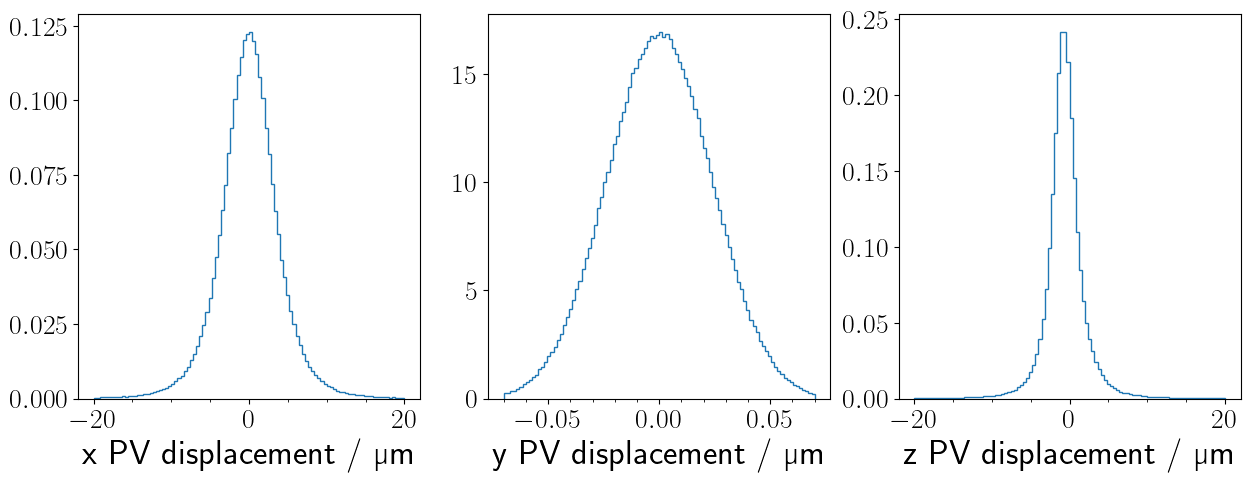

In [6]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(1, 3, 1)
ax1.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
ax1.set_xlabel('x PV displacement / µm')
ax1.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax2 = plt.subplot(1, 3, 2)
ax2.hist(PV_dy, bins = 100, histtype = "step", range=(-0.07,0.07), density = True)
ax2.set_xlabel('y PV displacement / µm')
ax2.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax3 = plt.subplot(1, 3, 3)
ax3.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
ax3.set_xlabel('z PV displacement / µm')
ax3.xaxis.set_minor_locator(tick.AutoMinorLocator());

In [7]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 5, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [8]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dx[(PV_dx > -20) & (PV_dx < 20)], weights = None)

In [9]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =      -56170475.67 NCalls =     13
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -292065.9308
  Edm           : 1769.075529
  Internal parameters:
                0
    -0.8265141656
       -1.4729128
  Internal gradient  :
      7085.474571
     -39930.07251
     -8314.386815
  Internal covariance matrix:
  9.6965369e-06              0              0
              0  3.1076719e-06              0
              0              0  2.3645527e-05
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 545
I VariableMetricBuilder    0 - FCN =      -292065.9308 Edm =       1769.075529 NCalls =     62
I VariableMetricBuilder    1 - FCN =      -292966.5708 Edm =       534.2382221 NCalls =     72
I VariableMetricBuilder    2 - FCN =      -293679.3494 Edm =       491.5216879 NCalls =     80
I VariableMetricBuilder    3 - FCN =      -295023.1152 Edm =        1489.65815 NCalls =     90
I Varia

4.043421370529367


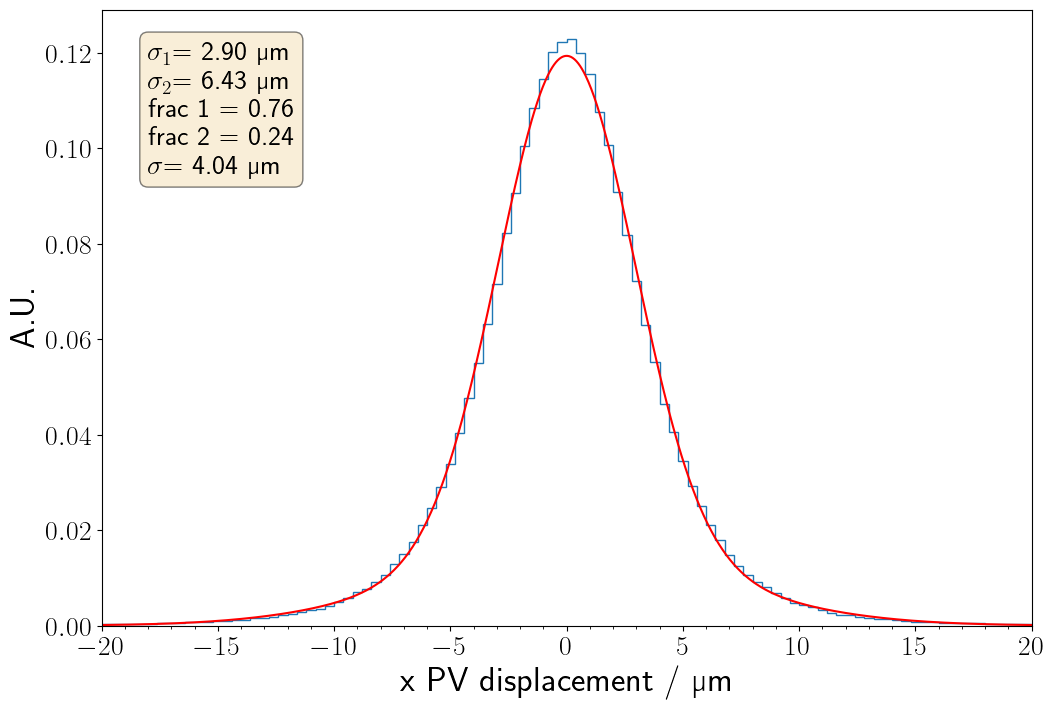

In [10]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.xlim(-20, 20)
plt.xlabel("x PV displacement / µm")
plt.ylabel("A.U.");

In [11]:
obs = zfit.Space("x", limits = (-0.2, 0.2))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 0.01, 0.001, 0.05)
model = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 0.03, 0.02, 0.05)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

# frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

# model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [12]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dy[(PV_dy > -0.2) & (PV_dy < 0.2)], weights = None)

In [13]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       765390.1038 NCalls =      5
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 305
I VariableMetricBuilder    0 - FCN =              1000 Edm =       765390.1038 NCalls =      5
I VariableMetricBuilder    1 - FCN =      -1439045.764 Edm =       54.25127069 NCalls =     16
I VariableMetricBuilder    2 - FCN =      -1440204.175 Edm =      0.1697108876 NCalls =     21
I VariableMetricBuilder    3 - FCN =      -1440205.379 Edm =   2.552165177e-06 NCalls =     25
I VariableMetricBuilder After Hessian
I VariableMetricBuilder    4 - FCN =      -1440205.379 Edm =   1.935054373e-06 NCalls =     32
CONVERGED
Finished iteration 0, niter=32, fmin=-1440205, edm=1.94e-06 edm_minuit=1.94e-06
name        value  (rounded)    at limit
--------  ------------------  ----------
1_sigma1           0.0237835       False


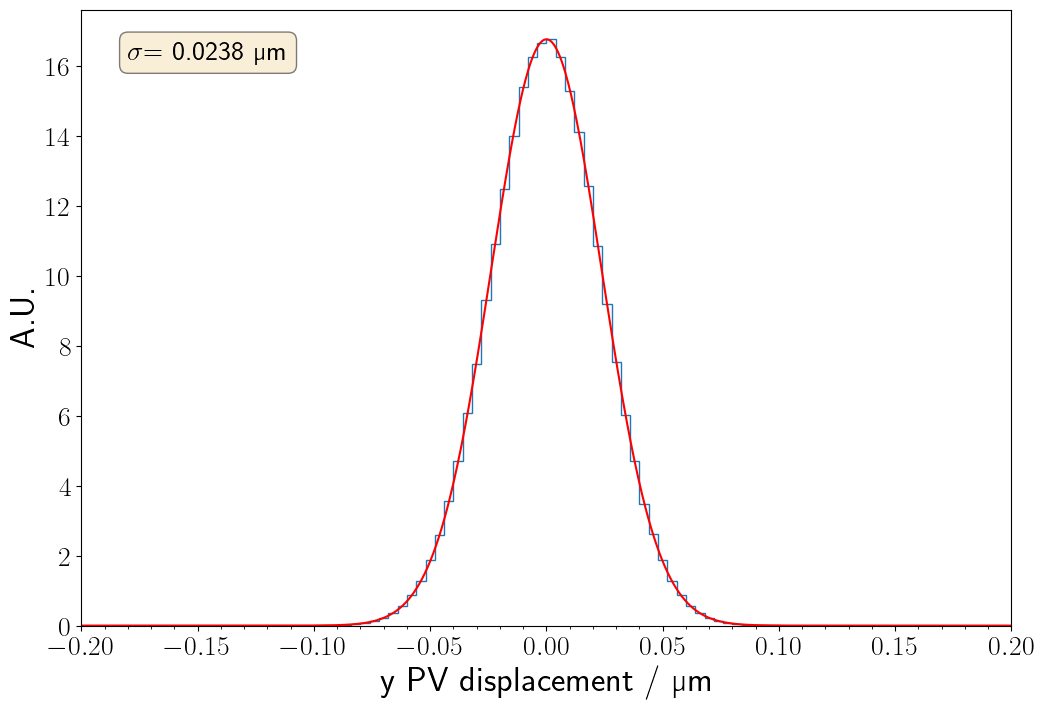

In [14]:
x_range = np.linspace(-0.2, 0.2, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dy, bins = 100, histtype = "step", range=(-0.2,0.2), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
# combined_resolution = np.sqrt(params[frac12]['value']**2 * params[sigma1]['value']**2 + (1 - params[frac12]['value'])**2 * params[sigma2]['value']**2 )
# print(combined_resolution)
# frac1=params[frac12]['value']
# frac2=1-params[frac12]['value']
#textstr = f"$\\sigma_1$= {params[sigma1]['value']:.4f} µm \n$\\sigma_2$= {params[sigma2]['value']:.4f} µm  \nfrac 1 = {frac1:.4f} \nfrac 2 = {frac2:.4f} \n$\\sigma$= {combined_resolution:.4f} µm" 
textstr = f"$\\sigma$= {params[sigma1]['value']:.4f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-0.2, 0.2)
plt.xlabel("y PV displacement / µm")
plt.ylabel("A.U.");

In [15]:
obs = zfit.Space("x", limits = (-15, 15))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
#shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 2, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 3, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])

a += 1

In [16]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dz[(PV_dz > -15) & (PV_dz < 15)], weights = None)

In [17]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       303571.3545 NCalls =     17
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -154297.7805
  Edm           : 218046.471
  Internal parameters:
                0
                0
    -0.8911225079
     -1.173092447
  Internal gradient  :
     -171511.3322
      853534.8504
       252117.596
       313625.053
  Internal covariance matrix:
  1.3009841e-05              0              0              0
              0  1.5977348e-07              0              0
              0              0  2.6876075e-06              0
              0              0              0   2.056259e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 680
I VariableMetricBuilder    0 - FCN =      -154297.7805 Edm =        218046.471 NCalls =     92
I VariableMetricBuilder    1 - FCN =      -263003.6162 Edm =       40212.59176 NCalls =    102
I VariableMetricBuilder    2 - FCN =      -286075.9652 E

2.5882746688925735


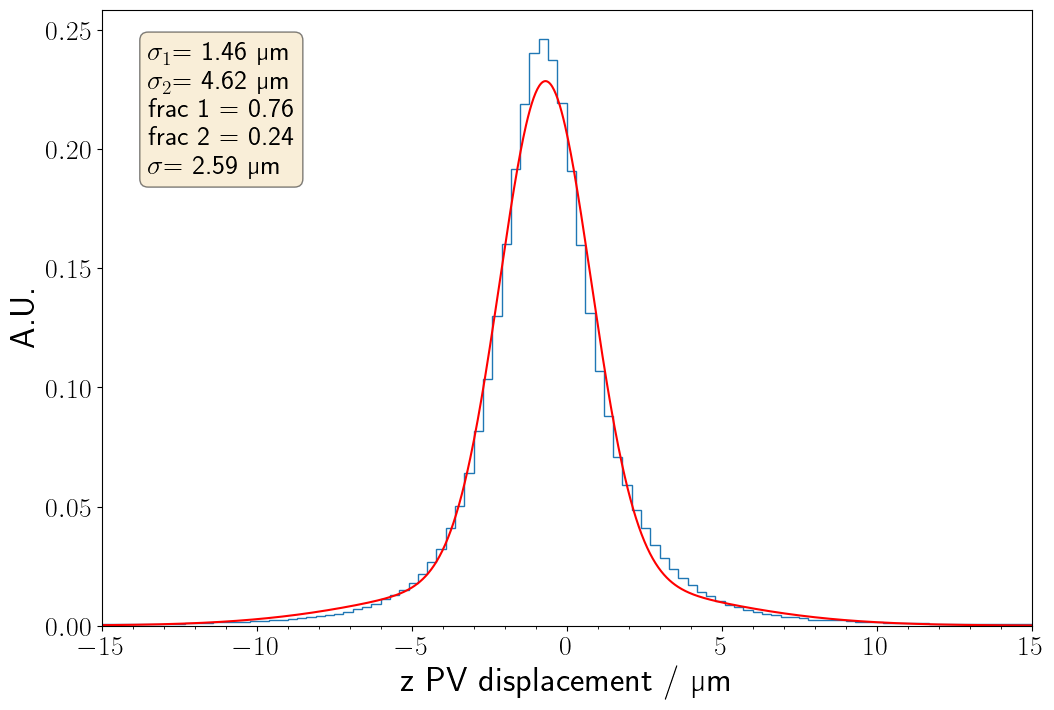

In [18]:
x_range = np.linspace(-15, 15, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dz, bins = 100, histtype = "step", range=(-15,15), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-15, 15)
plt.xlabel("z PV displacement / µm")
plt.ylabel("A.U.");

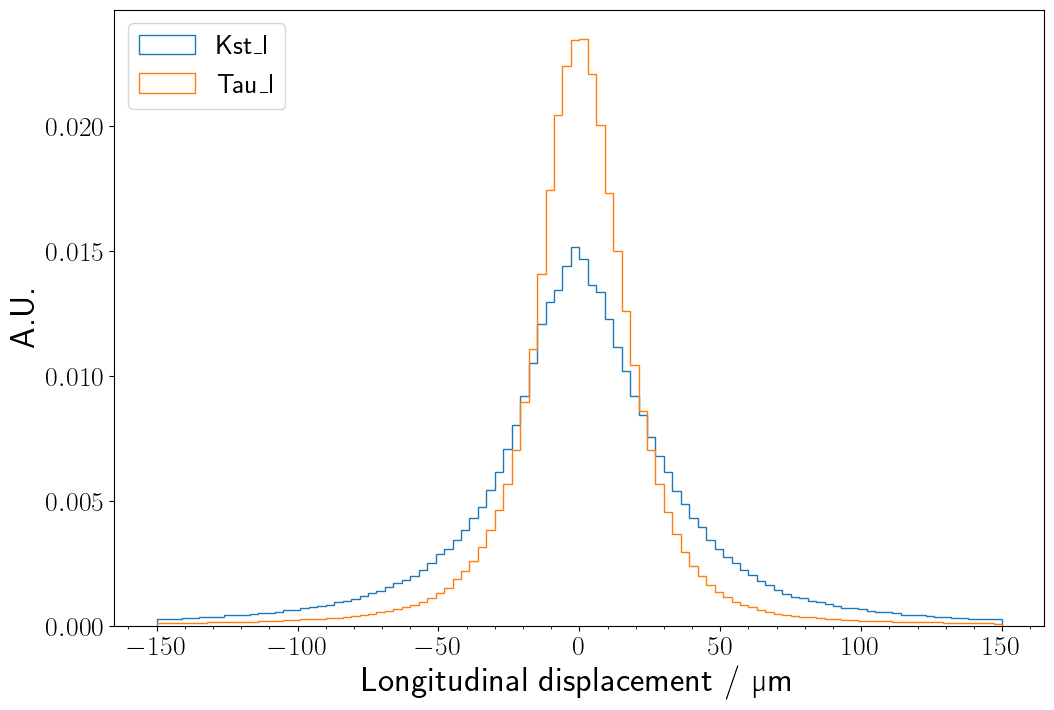

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Kst_l")
plt.hist(displacement_Tau_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Tau_l")
plt.legend(loc = "upper left")
plt.xlabel("Longitudinal displacement / µm")
plt.ylabel("A.U.");

In [20]:
obs = zfit.Space("x", limits = (-400, 400))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 15, 5, 30)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 200)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 150, 40, 500)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.4, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a += 1

In [21]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Kst_l[(displacement_Kst_l > -400) & (displacement_Kst_l < 400)], weights = None)

In [22]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       11212.81462 NCalls =     21
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       11212.81462 NCalls =     21
I VariableMetricBuilder    1 - FCN =      -8076.394752 Edm =       1842.301438 NCalls =     33
I VariableMetricBuilder    2 - FCN =      -9608.200445 Edm =       47.31955419 NCalls =     45
I VariableMetricBuilder    3 - FCN =      -9677.735884 Edm =       5.399863352 NCalls =     57
I VariableMetricBuilder    4 - FCN =      -9693.841979 Edm =       5.630291575 NCalls =     69
I VariableMetricBuilder    5 - FCN =      -9705.472691 Edm =       0.180331776 NCalls =     81
I VariableMetricBuilder    6 - FCN =      -9706.187072 Edm =      0.4539156995 NCalls =     93
I VariableMetricBuilder    7 - FCN =      -9714.876582 Edm =       3.664744603 NCalls =    107
I VariableMetricBuilder    8 - FCN =      -9722.256402 Edm =

64.6373452251283
0.01361356307650987


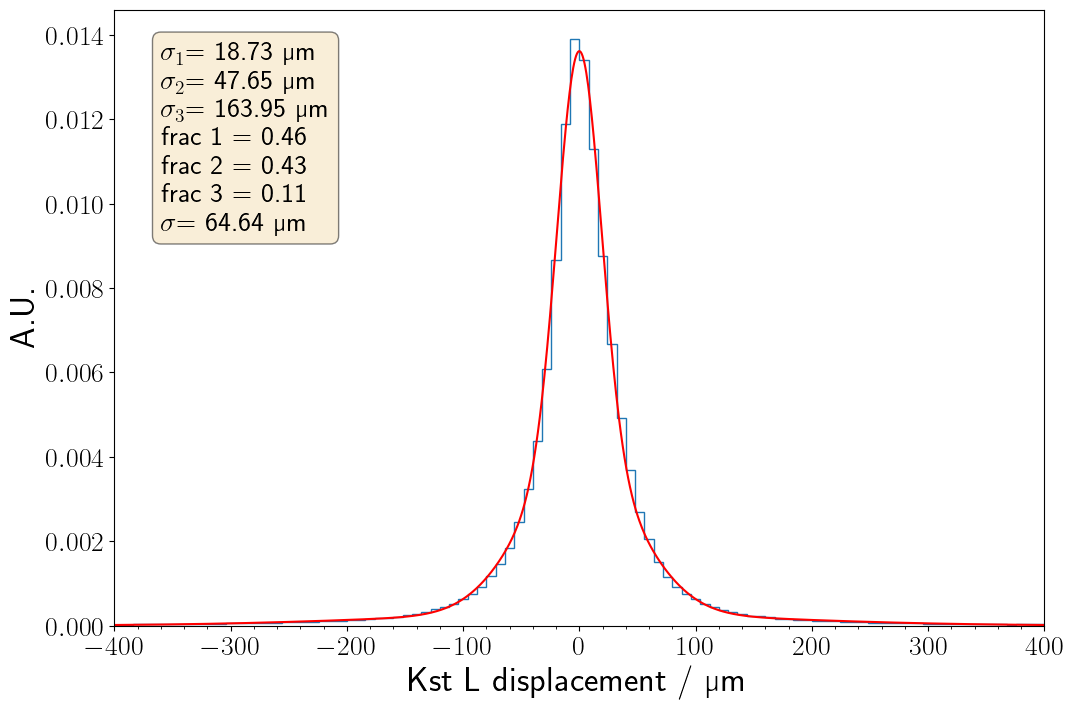

In [23]:
x_range = np.linspace(-400, 400, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, histtype = "step", range=(-400,400), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-400, 400)
plt.xlabel("Kst L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [24]:
obs = zfit.Space("x", limits = (-200, 200))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 10, 1, 25)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 80)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 100, 40, 150)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a+=1

In [25]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Tau_l[(displacement_Tau_l > -200) & (displacement_Tau_l < 200)], weights = None)

In [26]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =        32112.7182 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 32112.7182
  Internal parameters:
                0
                0
    -0.2526802551
                0
    0.09103477804
  Internal gradient  :
      298269.4284
        453902.48
     -158056.0413
      99101.99249
                0
  Internal covariance matrix:
  3.1620583e-08              0              0              0              0
              0   3.265042e-08              0              0              0
              0              0  1.7839202e-06              0              0
              0              0              0  7.5698954e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =        32112.7182 NCa

32.03088168510711
0.023182323534486814


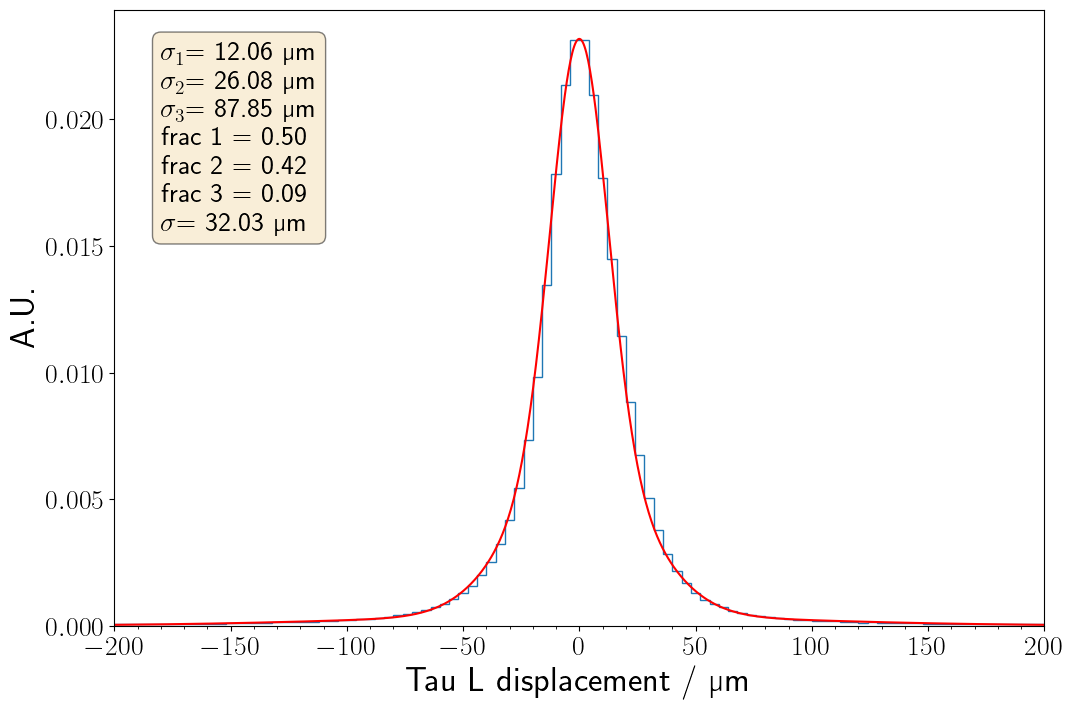

In [27]:
x_range = np.linspace(-200, 200, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Tau_l, bins = 100, histtype = "step", range=(-200,200), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-200, 200)
plt.xlabel("Tau L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

Text(0, 0.5, 'A.U.')

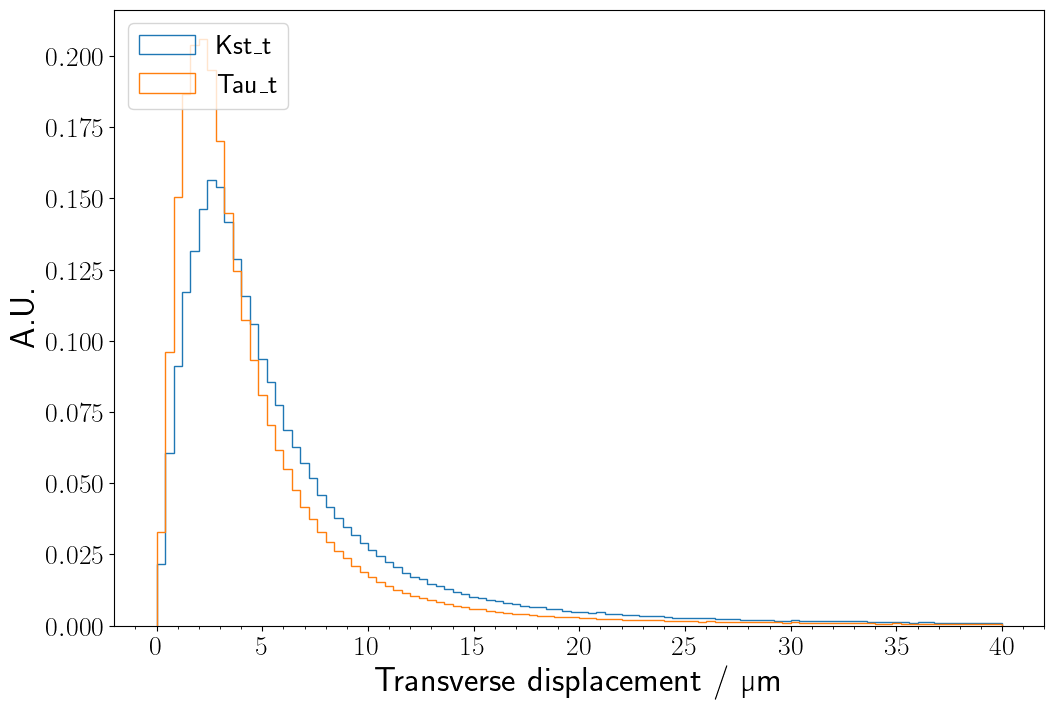

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Kst_t")
plt.hist(displacement_Tau_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Tau_t")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement / µm")
plt.ylabel("A.U.")

In [29]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeKst=len(Kst_mc_x)
Kst_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_rdvec_x=Kst_mc_x+np.cos(Kst_rdvec_angle)
Kst_rdvec_y=Kst_mc_y+np.sin(Kst_rdvec_angle)
print(Kst_rdvec_x)

Kst_rdvec_z=(-(Kst_uLx*(Kst_rdvec_x-Kst_mc_x)+Kst_uLy*(Kst_rdvec_y-Kst_mc_y))/Kst_uLz)+Kst_mc_z
Kst_uyp_x=Kst_rdvec_x-Kst_mc_x
Kst_uyp_y=Kst_rdvec_y-Kst_mc_y
Kst_uyp_z=Kst_rdvec_z-Kst_mc_z
Kst_uyp_norm=np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2)
Kst_uyp_x=Kst_uyp_x/Kst_uyp_norm
Kst_uyp_y=Kst_uyp_y/Kst_uyp_norm
Kst_uyp_z=Kst_uyp_z/Kst_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2))

Kst_uxp_x=(Kst_uyp_y*Kst_uLz-Kst_uyp_z*Kst_uLy)
Kst_uxp_y=(Kst_uyp_z*Kst_uLx-Kst_uyp_x*Kst_uLz)
Kst_uxp_z=(Kst_uyp_x*Kst_uLy-Kst_uyp_y*Kst_uLx)

print(np.sqrt(Kst_uxp_x**2+Kst_uxp_y**2+Kst_uxp_z**2))
print(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z)
print(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz)
print(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Kst_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_newpoint_x=Kst_mc_x+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_x+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_x
Kst_newpoint_y=Kst_mc_y+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_y+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_y
Kst_newpoint_z=Kst_mc_z+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_z+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_z

Kst_newuyp_x=Kst_newpoint_x-Kst_mc_x
Kst_newuyp_y=Kst_newpoint_y-Kst_mc_y
Kst_newuyp_z=Kst_newpoint_z-Kst_mc_z

Kst_newuxp_x=(Kst_newuyp_y*Kst_uLz-Kst_newuyp_z*Kst_uLy)
Kst_newuxp_y=(Kst_newuyp_z*Kst_uLx-Kst_newuyp_x*Kst_uLz)
Kst_newuxp_z=(Kst_newuyp_x*Kst_uLy-Kst_newuyp_y*Kst_uLx)

print(np.sqrt(Kst_newuxp_x**2+Kst_newuxp_y**2+Kst_newuxp_z**2))
print(np.sqrt(Kst_newuyp_x**2+Kst_newuyp_y**2+Kst_newuyp_z**2))

# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_newuyp_x+Kst_newuxp_y*Kst_newuyp_y+Kst_newuxp_z*Kst_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_uLx+Kst_newuxp_y*Kst_uLy+Kst_newuxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_newuyp_x+Kst_uLy*Kst_newuyp_y+Kst_uLz*Kst_newuyp_z, bins=100);





[ 815.10136665 -691.44960375 2435.20948782 ... 2224.61979155 1229.86187411
   22.13374805]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 5.55111512e-17  2.77555756e-17 -3.46944695e-18 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[ 5.55111512e-17 -5.55111512e-17 -7.53520510e-17 ... -5.55111512e-17
  1.38777878e-17  0.00000000e+00]
[-3.89133170e-14 -4.46309656e-14 -1.38777878e-17 ... -7.72715225e-14
  1.94289029e-15  3.22519789e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


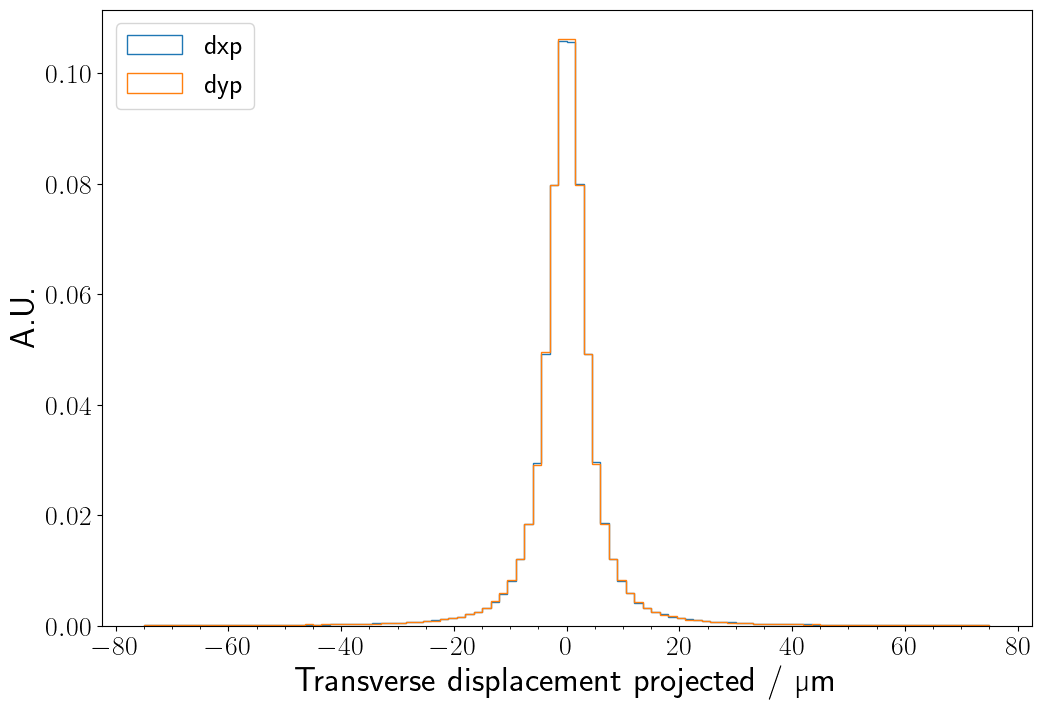

In [30]:
#building of the displacement on (x',y')
Kst_dxp=Kst_newuxp_x*Kst_dx+Kst_newuxp_y*Kst_dy+Kst_newuxp_z*Kst_dz
Kst_dyp=Kst_newuyp_x*Kst_dx+Kst_newuyp_y*Kst_dy+Kst_newuyp_z*Kst_dz
#cut of the events where the vertex reconstruction fails
Kst_dxp=Kst_dxp[Kst_rec_x!=0]
Kst_dyp=Kst_dyp[Kst_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_dxp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dxp")
plt.hist(Kst_dyp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");


In [35]:
Kst_DTp=np.concatenate([Kst_dxp,Kst_dyp], axis=0)
obs = zfit.Space("x", limits = (-80, 80))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 10, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 15, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [36]:
data = zfit.Data.from_numpy(obs = obs, array=Kst_DTp[abs(Kst_DTp<80)], weights = None)

In [37]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       52010.05247 NCalls =     25
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 53265.15325
  Internal parameters:
   3.31075241e-16
                0
    -0.4115168461
    -0.8911225079
     -1.008726524
  Internal gradient  :
  3.652976738e+12
  3.652976974e+12
      237937.9659
     -526642.9997
                0
  Internal covariance matrix:
  8.2499777e-23              0              0              0              0
              0  8.2499777e-23              0              0              0
              0              0  1.3729334e-06              0              0
              0              0              0  4.8000558e-07              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       53265.15325 NC

8.38580149630164
0.10832851720834197


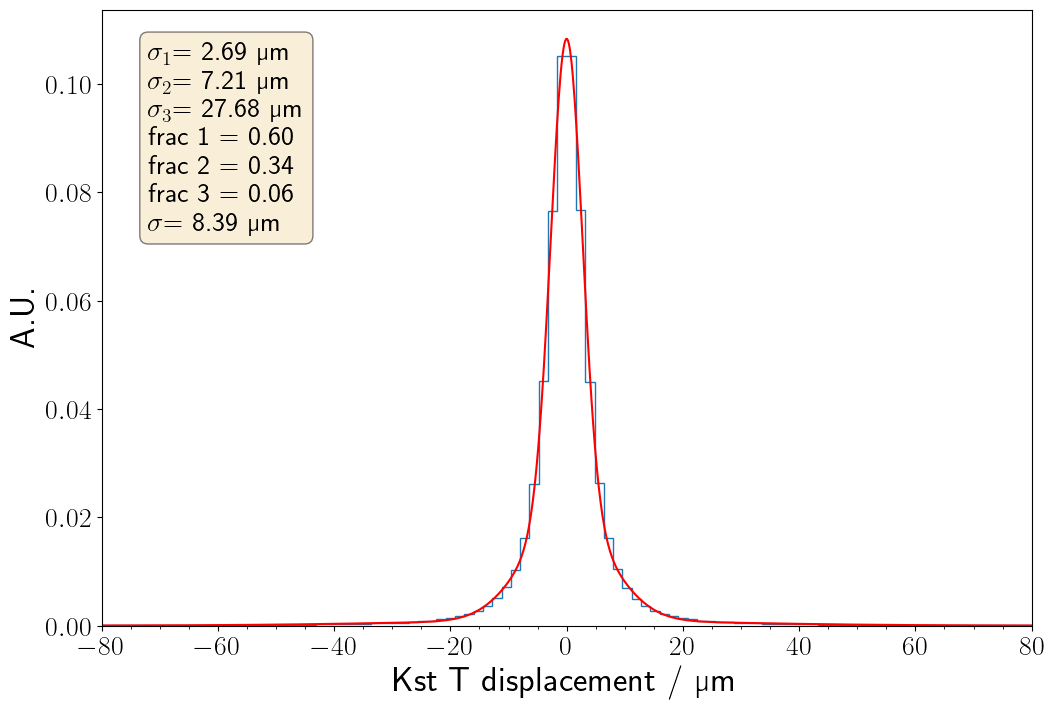

In [38]:
x_range = np.linspace(-80, 80, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_DTp, bins = 100, histtype = "step", range=(-80,80), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-80, 80)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [39]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeTau=len(Tau_mc_x)
Tau_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_rdvec_x=Tau_mc_x+np.cos(Tau_rdvec_angle)
Tau_rdvec_y=Tau_mc_y+np.sin(Tau_rdvec_angle)
print(Tau_rdvec_x)

Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z
Tau_uyp_x=Tau_rdvec_x-Tau_mc_x
Tau_uyp_y=Tau_rdvec_y-Tau_mc_y
Tau_uyp_z=Tau_rdvec_z-Tau_mc_z
Tau_uyp_norm=np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2)
Tau_uyp_x=Tau_uyp_x/Tau_uyp_norm
Tau_uyp_y=Tau_uyp_y/Tau_uyp_norm
Tau_uyp_z=Tau_uyp_z/Tau_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2))

Tau_uxp_x=(Tau_uyp_y*Tau_uLz-Tau_uyp_z*Tau_uLy)
Tau_uxp_y=(Tau_uyp_z*Tau_uLx-Tau_uyp_x*Tau_uLz)
Tau_uxp_z=(Tau_uyp_x*Tau_uLy-Tau_uyp_y*Tau_uLx)

print(np.sqrt(Tau_uxp_x**2+Tau_uxp_y**2+Tau_uxp_z**2))
print(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z)
print(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz)
print(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Tau_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_newpoint_x=Tau_mc_x+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_x+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_x
Tau_newpoint_y=Tau_mc_y+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_y+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_y
Tau_newpoint_z=Tau_mc_z+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_z+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_z

Tau_newuyp_x=Tau_newpoint_x-Tau_mc_x
Tau_newuyp_y=Tau_newpoint_y-Tau_mc_y
Tau_newuyp_z=Tau_newpoint_z-Tau_mc_z

Tau_newuxp_x=(Tau_newuyp_y*Tau_uLz-Tau_newuyp_z*Tau_uLy)
Tau_newuxp_y=(Tau_newuyp_z*Tau_uLx-Tau_newuyp_x*Tau_uLz)
Tau_newuxp_z=(Tau_newuyp_x*Tau_uLy-Tau_newuyp_y*Tau_uLx)

print(np.sqrt(Tau_newuxp_x**2+Tau_newuxp_y**2+Tau_newuxp_z**2))
print(np.sqrt(Tau_newuyp_x**2+Tau_newuyp_y**2+Tau_newuyp_z**2))

# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_newuyp_x+Tau_newuxp_y*Tau_newuyp_y+Tau_newuxp_z*Tau_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_uLx+Tau_newuxp_y*Tau_uLy+Tau_newuxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_newuyp_x+Tau_uLy*Tau_newuyp_y+Tau_uLz*Tau_newuyp_z, bins=100);

[ 825.29657717 1042.91091897 -807.60350311 ...   -2.47133563    3.5005155
   49.25693206]


/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_42185/3007776521.py:10: RuntimeWarning: invalid value encountered in divide
  Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[0.0000000e+00 0.0000000e+00 6.9388939e-17 ... 6.9388939e-18 0.0000000e+00
 0.0000000e+00]
[-2.77555756e-17  1.11022302e-16 -2.77555756e-17 ...  1.38777878e-17
  0.00000000e+00  6.93889390e-18]
[ 3.61377595e-14  8.32667268e-14  2.03725925e-14 ... -9.43689571e-16
 -1.24344979e-14  1.09912079e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


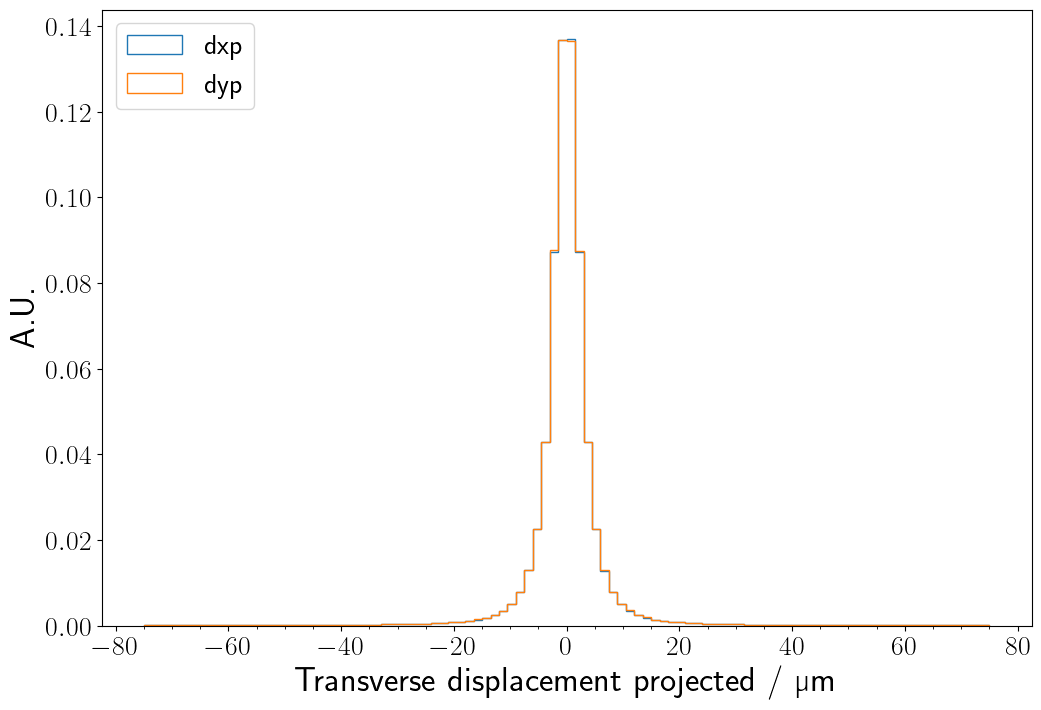

In [40]:
#building of the displacement on (x',y')
Tau_dxp=Tau_newuxp_x*Tau_dx+Tau_newuxp_y*Tau_dy+Tau_newuxp_z*Tau_dz
Tau_dyp=Tau_newuyp_x*Tau_dx+Tau_newuyp_y*Tau_dy+Tau_newuyp_z*Tau_dz
#cut of the events where the vertex reconstruction fails
Tau_dxp=Tau_dxp[Tau_rec_x!=0]
Tau_dyp=Tau_dyp[Tau_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_dxp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dxp")
plt.hist(Tau_dyp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

In [41]:
Tau_DTp=np.concatenate([Tau_dxp,Tau_dyp], axis=0)
obs = zfit.Space("x", limits = (-80, 80))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 10, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 15, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [42]:
data = zfit.Data.from_numpy(obs = obs, array=Tau_DTp[abs(Tau_DTp<80)], weights = None)

In [43]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       296688.6316 NCalls =     25
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 298038.562
  Internal parameters:
                0
                0
    -0.4115168461
    -0.8911225079
     -1.008726524
  Internal gradient  :
   3.71844365e+12
  3.718444473e+12
      1071665.163
     -78409.58643
                0
  Internal covariance matrix:
  8.4695797e-23              0              0              0              0
              0  8.4695797e-23              0              0              0
              0              0  1.0333673e-06              0              0
              0              0              0  4.9196558e-07              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =        298038.562 NCa

6.571563371803881
0.14479450626536589


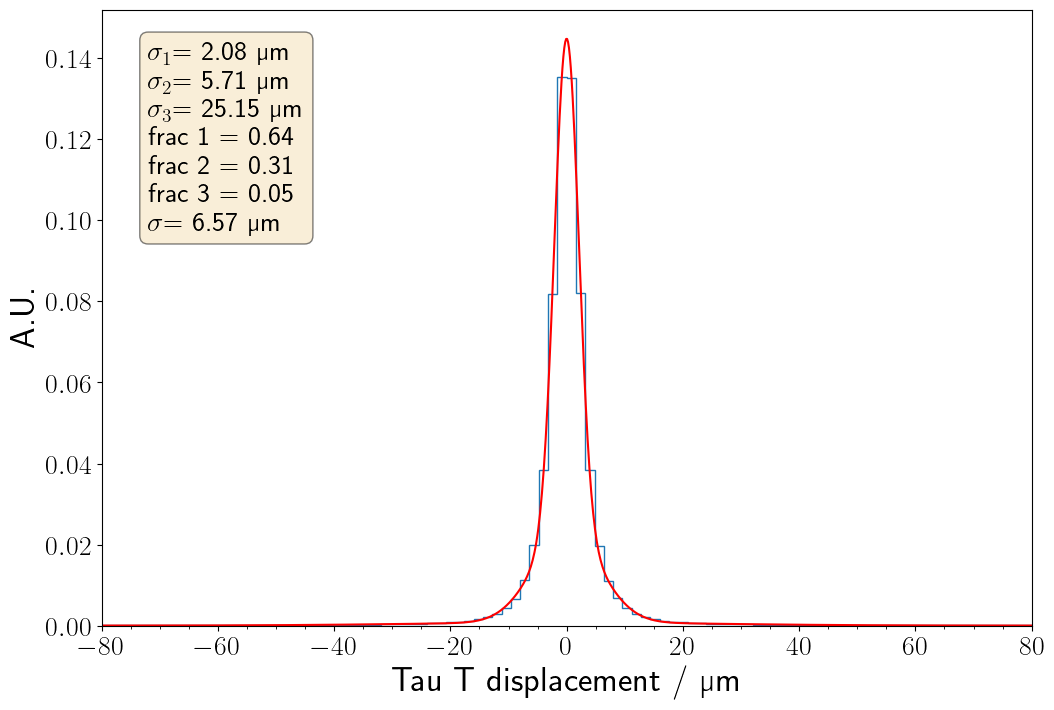

In [44]:
x_range = np.linspace(-80, 80, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_DTp, bins = 100, histtype = "step", range=(-80,80), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-80, 80)
plt.xlabel("Tau T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

# IDEA with best d0z0 x2

In [45]:
vertex_resolution = ur.open("/Users/tristanmiralles/Desktop/FCC_stuff/IDEA_vertexing_study/p8_ee_Zbb_ecm91_EvtGen_Bd2KstarTauTau/vertex_resolution_last_smeared_d0z0.root")
events = vertex_resolution["tree"]

In [46]:
PV_dx=np.array(ak.flatten(events["PV_dx"].array(library = "ak") * 10**3))
PV_dy=np.array(ak.flatten(events["PV_dy"].array(library = "ak") * 10**3))
PV_dz=np.array(ak.flatten(events["PV_dz"].array(library = "ak") * 10**3))

PV_rec_x=np.array(ak.flatten(events["PV_rec_x"].array(library = "ak") * 10**3))
PV_rec_y=np.array(ak.flatten(events["PV_rec_y"].array(library = "ak") * 10**3))
PV_rec_z=np.array(ak.flatten(events["PV_rec_z"].array(library = "ak") * 10**3))

print(len(PV_dx))

PV_dx=PV_dx[PV_rec_x!=0]
PV_dy=PV_dy[PV_rec_x!=0]
PV_dz=PV_dz[PV_rec_x!=0]

print(len(PV_dx))

Kst_rec_x=np.array(ak.flatten(events["Kst_rec_x"].array(library = "ak") * 10**3))
Kst_rec_y=np.array(ak.flatten(events["Kst_rec_y"].array(library = "ak") * 10**3))
Kst_rec_z=np.array(ak.flatten(events["Kst_rec_z"].array(library = "ak") * 10**3))

Kst_mc_x=np.array(ak.flatten(events["Kst_mc_x"].array(library = "ak") * 10**3))
Kst_mc_y=np.array(ak.flatten(events["Kst_mc_y"].array(library = "ak") * 10**3))
Kst_mc_z=np.array(ak.flatten(events["Kst_mc_z"].array(library = "ak") * 10**3))
Kst_dx=np.array(ak.flatten(events["Kst_dx"].array(library = "ak") * 10**3))
Kst_dy=np.array(ak.flatten(events["Kst_dy"].array(library = "ak") * 10**3))
Kst_dz=np.array(ak.flatten(events["Kst_dz"].array(library = "ak") * 10**3))
Kst_uLx=np.array(ak.flatten(events["Kst_uLx"].array(library = "ak")))
Kst_uLy=np.array(ak.flatten(events["Kst_uLy"].array(library = "ak")))
Kst_uLz=np.array(ak.flatten(events["Kst_uLz"].array(library = "ak")))

displacement_Kst_l = np.array(ak.flatten(events["displacement_Kst_l"].array(library = "ak") * 10**3))
displacement_Kst_t = np.array(ak.flatten(events["displacement_Kst_t"].array(library = "ak") * 10**3))
print(len(displacement_Kst_l))
print(displacement_Kst_l)
displacement_Kst_l=displacement_Kst_l[Kst_rec_x!=0]
displacement_Kst_t=displacement_Kst_t[Kst_rec_x!=0]
print(len(displacement_Kst_l))
print(displacement_Kst_l)

Tau_rec_x=np.array(ak.flatten(events["Tau_rec_x"].array(library = "ak") * 10**3))
Tau_rec_y=np.array(ak.flatten(events["Tau_rec_y"].array(library = "ak") * 10**3))
Tau_rec_z=np.array(ak.flatten(events["Tau_rec_z"].array(library = "ak") * 10**3))

Tau_mc_x=np.array(ak.flatten(events["Tau_mc_x"].array(library = "ak") * 10**3))
Tau_mc_y=np.array(ak.flatten(events["Tau_mc_y"].array(library = "ak") * 10**3))
Tau_mc_z=np.array(ak.flatten(events["Tau_mc_z"].array(library = "ak") * 10**3))
Tau_dx=np.array(ak.flatten(events["Tau_dx"].array(library = "ak") * 10**3))
Tau_dy=np.array(ak.flatten(events["Tau_dy"].array(library = "ak") * 10**3))
Tau_dz=np.array(ak.flatten(events["Tau_dz"].array(library = "ak") * 10**3))
Tau_uLx=np.array(ak.flatten(events["Tau_uLx"].array(library = "ak")))
Tau_uLy=np.array(ak.flatten(events["Tau_uLy"].array(library = "ak")))
Tau_uLz=np.array(ak.flatten(events["Tau_uLz"].array(library = "ak")))


displacement_Tau_l = np.array(ak.flatten(events["displacement_Tau_l"].array(library = "ak") * 10**3))
displacement_Tau_t = np.array(ak.flatten(events["displacement_Tau_t"].array(library = "ak") * 10**3))
print(len(displacement_Tau_l))
displacement_Tau_l=displacement_Tau_l[Tau_rec_x!=0]
displacement_Tau_t=displacement_Tau_t[Tau_rec_x!=0]
print(len(displacement_Tau_l))

999805
972977
999805
[-6.68031250e+03 -2.73605209e+00 -3.62393601e+03 ... -1.16698327e+01
 -1.90431910e+00  2.73204070e+00]
892195
[ -2.73605209  -3.08725838  15.02905467 ... -11.66983272  -1.9043191
   2.7320407 ]
1999610
1621813


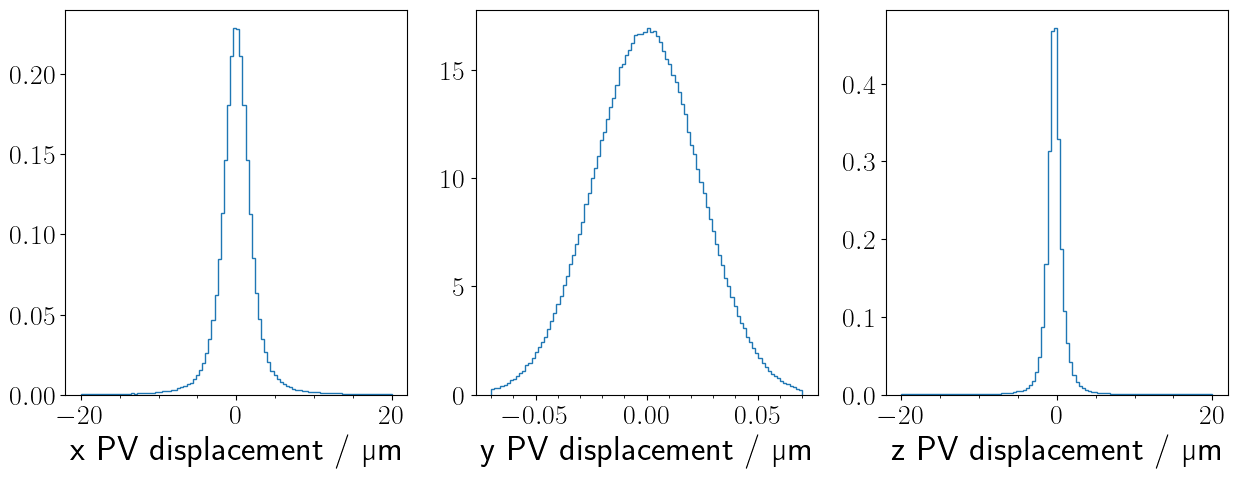

In [73]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(1, 3, 1)
ax1.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
ax1.set_xlabel('x PV displacement / µm')
ax1.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax2 = plt.subplot(1, 3, 2)
ax2.hist(PV_dy, bins = 100, histtype = "step", range=(-0.07,0.07), density = True)
ax2.set_xlabel('y PV displacement / µm')
ax2.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax3 = plt.subplot(1, 3, 3)
ax3.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
ax3.set_xlabel('z PV displacement / µm')
ax3.xaxis.set_minor_locator(tick.AutoMinorLocator());

In [162]:
obs = zfit.Space("x", limits = (-15, 15))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 5, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 3, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [163]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dx[(PV_dx > -15) & (PV_dx < 15)], weights = None)

In [164]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =          149224.3 NCalls =     13
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -620364.3014
  Edm           : 4021.065001
  Internal parameters:
                0
     -1.315239047
     -1.367584661
  Internal gradient  :
     -43711.08761
      -16382.3452
      4021.584408
  Internal covariance matrix:
  7.5616846e-06              0              0
              0  6.0152256e-06              0
              0              0   1.365486e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 545
I VariableMetricBuilder    0 - FCN =      -620364.3014 Edm =       4021.065001 NCalls =    123
I VariableMetricBuilder    1 - FCN =      -626725.1022 Edm =       6477.963138 NCalls =    133
I VariableMetricBuilder    2 - FCN =      -631698.0968 Edm =       4606.931985 NCalls =    144
I VariableMetricBuilder    3 - FCN =      -637866.4459 Edm =        3460.73508 NCalls =    153
I Varia

2.563556041768769


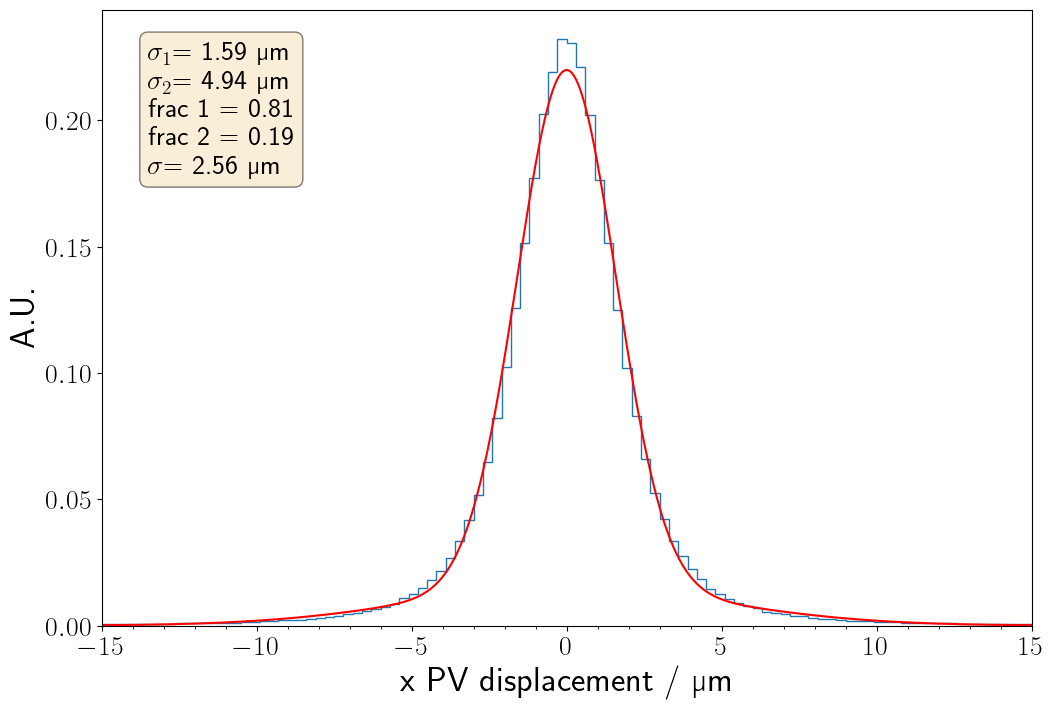

In [165]:
x_range = np.linspace(-15, 15, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dx, bins = 100, histtype = "step", range=(-15,15), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.xlim(-15, 15)
plt.xlabel("x PV displacement / µm")
plt.ylabel("A.U.");

In [78]:
obs = zfit.Space("x", limits = (-0.2, 0.2))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 0.01, 0.001, 0.05)
model = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 0.03, 0.02, 0.05)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

# frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

# model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [79]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dy[(PV_dy > -0.2) & (PV_dy < 0.2)], weights = None)

In [80]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       755227.6165 NCalls =      5
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 305
I VariableMetricBuilder    0 - FCN =              1000 Edm =       755227.6165 NCalls =      5
I VariableMetricBuilder    1 - FCN =      -1419881.635 Edm =       53.50078646 NCalls =     16
I VariableMetricBuilder    2 - FCN =      -1421023.742 Edm =       0.167115108 NCalls =     21
I VariableMetricBuilder    3 - FCN =      -1421024.927 Edm =   2.509702971e-06 NCalls =     25
I VariableMetricBuilder After Hessian
I VariableMetricBuilder    4 - FCN =      -1421024.927 Edm =   1.901591779e-06 NCalls =     32
CONVERGED
Finished iteration 0, niter=32, fmin=-1421025, edm=1.9e-06 edm_minuit=1.9e-06
name         value  (rounded)    at limit
---------  ------------------  ----------
16_sigma1           0.0237817       False


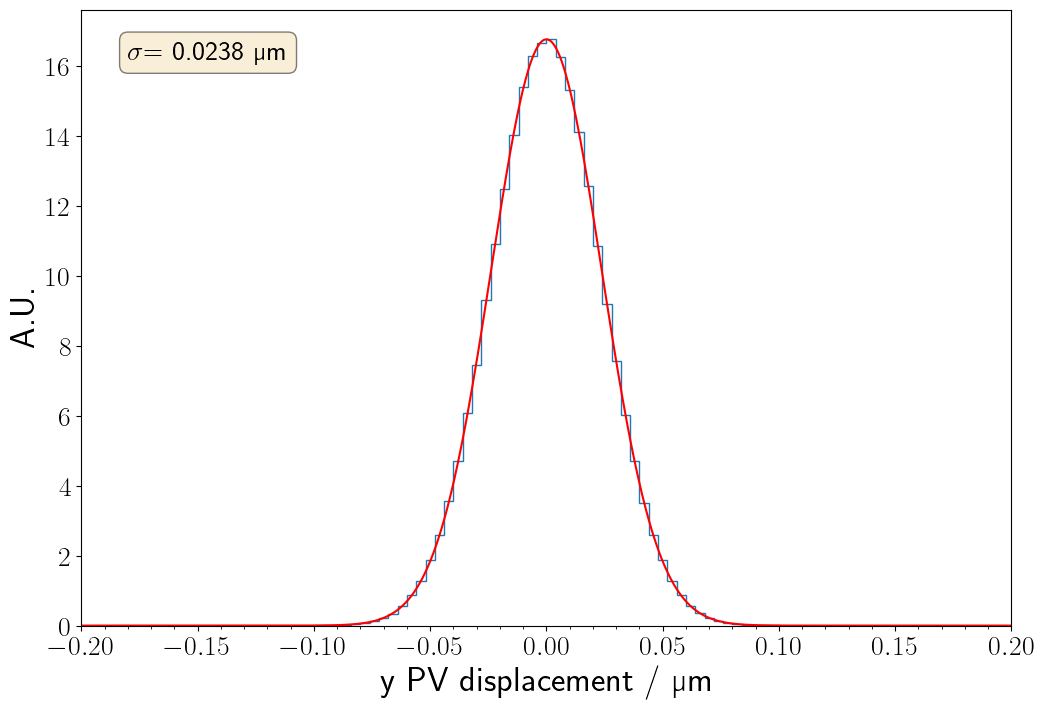

In [81]:
x_range = np.linspace(-0.2, 0.2, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dy, bins = 100, histtype = "step", range=(-0.2,0.2), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
# combined_resolution = np.sqrt(params[frac12]['value']**2 * params[sigma1]['value']**2 + (1 - params[frac12]['value'])**2 * params[sigma2]['value']**2 )
# print(combined_resolution)
# frac1=params[frac12]['value']
# frac2=1-params[frac12]['value']
#textstr = f"$\\sigma_1$= {params[sigma1]['value']:.4f} µm \n$\\sigma_2$= {params[sigma2]['value']:.4f} µm  \nfrac 1 = {frac1:.4f} \nfrac 2 = {frac2:.4f} \n$\\sigma$= {combined_resolution:.4f} µm" 
textstr = f"$\\sigma$= {params[sigma1]['value']:.4f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-0.2, 0.2)
plt.xlabel("y PV displacement / µm")
plt.ylabel("A.U.");

In [154]:
obs = zfit.Space("x", limits = (-8, 8))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
#shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 2, 0.5, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 1, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])

a += 1

In [155]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dz[(PV_dz > -8) & (PV_dz < 8)], weights = None)

In [156]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =      -2066956.684 NCalls =     17
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -497573.9139
  Edm           : 68380.4694
  Internal parameters:
                0
                0
     -1.349005927
     -1.330875739
  Internal gradient  :
     -23061.09732
      3380266.627
     -40323.40757
      -234496.063
  Internal covariance matrix:
  8.4234867e-06              0              0              0
              0  2.2372943e-08              0              0
              0              0  2.0096806e-06              0
              0              0              0  1.8434208e-07
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 680
I VariableMetricBuilder    0 - FCN =      -497573.9139 Edm =        68380.4694 NCalls =    104
I VariableMetricBuilder    1 - FCN =      -563427.1229 Edm =       18789.19801 NCalls =    113
I VariableMetricBuilder    2 - FCN =      -573161.2832 E

1.3235352906242


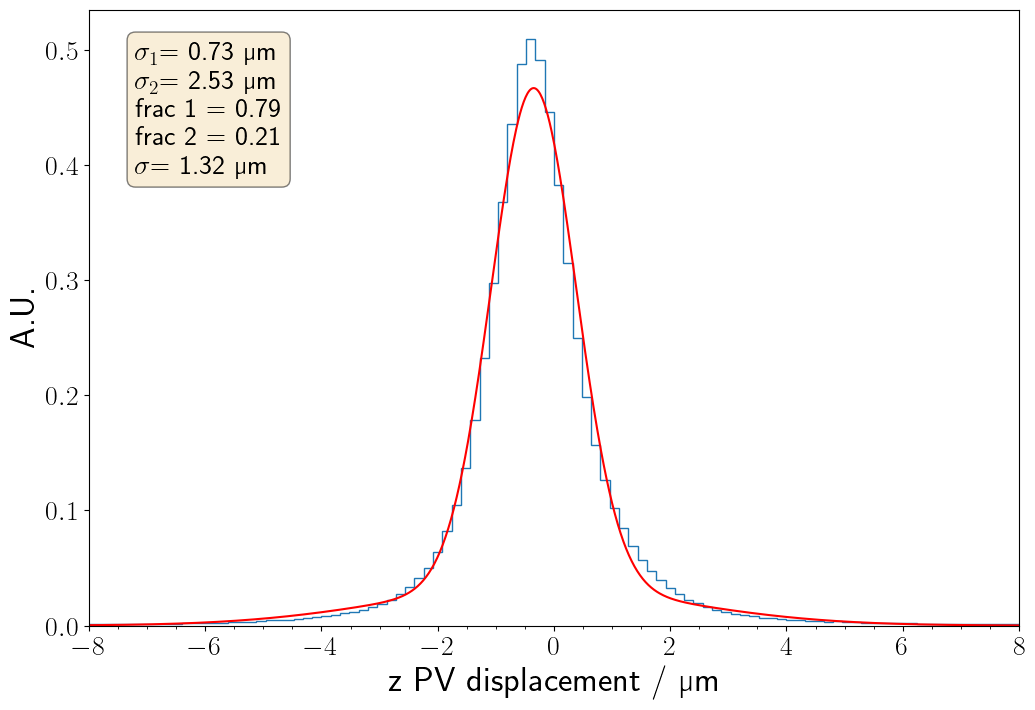

In [157]:
x_range = np.linspace(-8, 8, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dz, bins = 100, histtype = "step", range=(-8, 8), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-8, 8)
plt.xlabel("z PV displacement / µm")
plt.ylabel("A.U.");

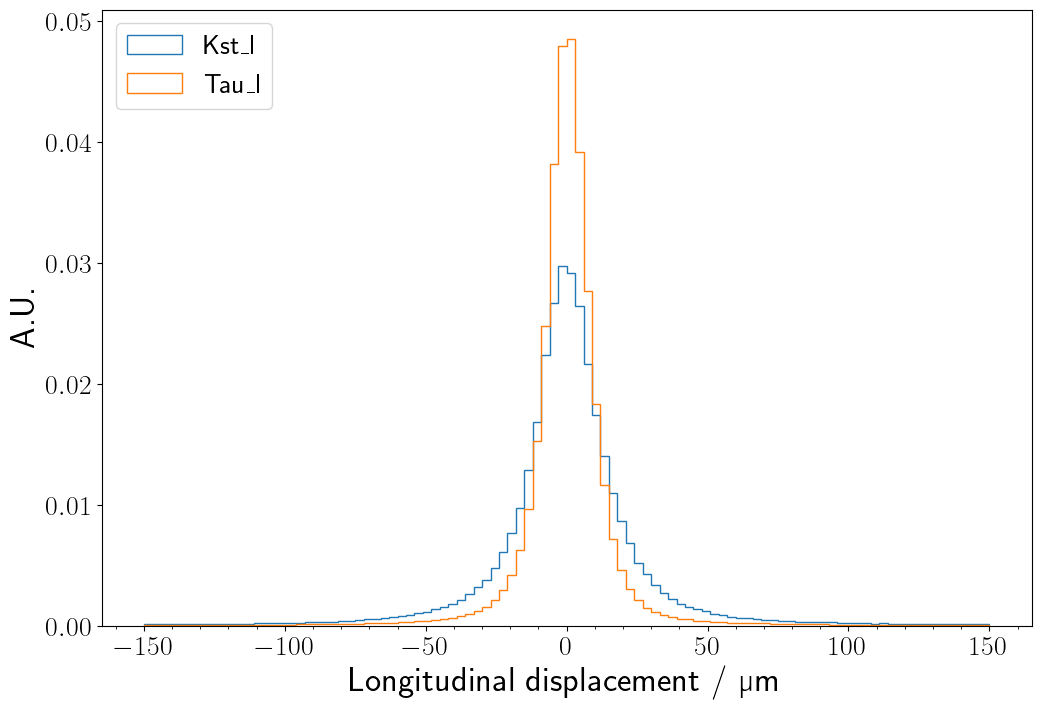

In [97]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Kst_l")
plt.hist(displacement_Tau_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Tau_l")
plt.legend(loc = "upper left")
plt.xlabel("Longitudinal displacement / µm")
plt.ylabel("A.U.");

In [166]:
obs = zfit.Space("x", limits = (-150, 150))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 20, 5, 30)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 200)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 100, 40, 500)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a += 1

In [167]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Kst_l[(displacement_Kst_l > -150) & (displacement_Kst_l < 150)], weights = None)

In [168]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =      -238703.0134 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -82815.25951
  Edm           : 81757.20995
  Internal parameters:
                0
                0
    -0.3682100323
    -0.7297276562
    -0.8317784478
  Internal gradient  :
     -227509.4108
     -31439.73031
      107974.7443
      152810.6379
                0
  Internal covariance matrix:
  2.0288167e-06              0              0              0              0
              0  3.7880923e-06              0              0              0
              0              0   7.843885e-06              0              0
              0              0              0  5.4311619e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -82815.25951 Edm =       81757.

27.916685576801797
0.02928595448827096


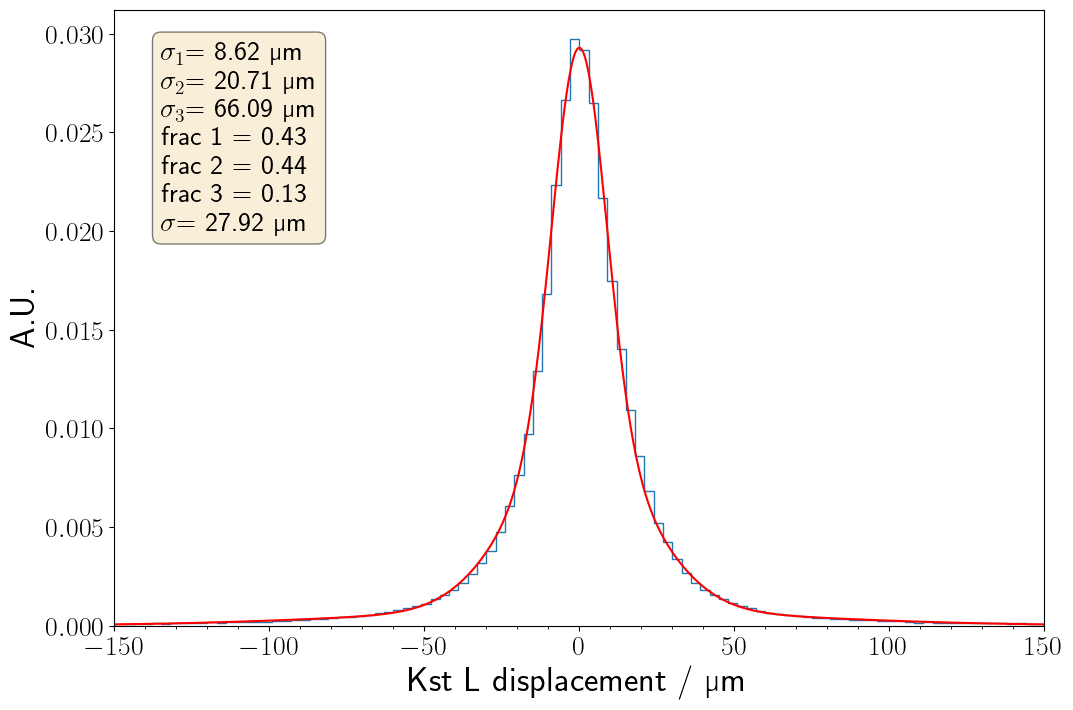

In [169]:
x_range = np.linspace(-150, 150, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, histtype = "step", range=(-150,150), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-150, 150)
plt.xlabel("Kst L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [170]:
obs = zfit.Space("x", limits = (-100, 100))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 10, 1, 25)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 10, 80)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 100, 30, 150)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a+=1

In [171]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Tau_l[(displacement_Tau_l > -100) & (displacement_Tau_l < 100)], weights = None)

In [172]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       810353.8809 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -180248.2596
  Edm           : 381058.5726
  Internal parameters:
                0
                0
    -0.2526802551
    -0.5882369126
     0.1674480792
  Internal gradient  :
      480310.1905
      832115.1519
      478626.5152
      224749.6374
                0
  Internal covariance matrix:
   8.590698e-09              0              0              0              0
              0  8.6923295e-09              0              0              0
              0              0  5.9349422e-06              0              0
              0              0              0  3.1009682e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -180248.2596 Edm =       381058

15.171459887191354
0.04954760815253171


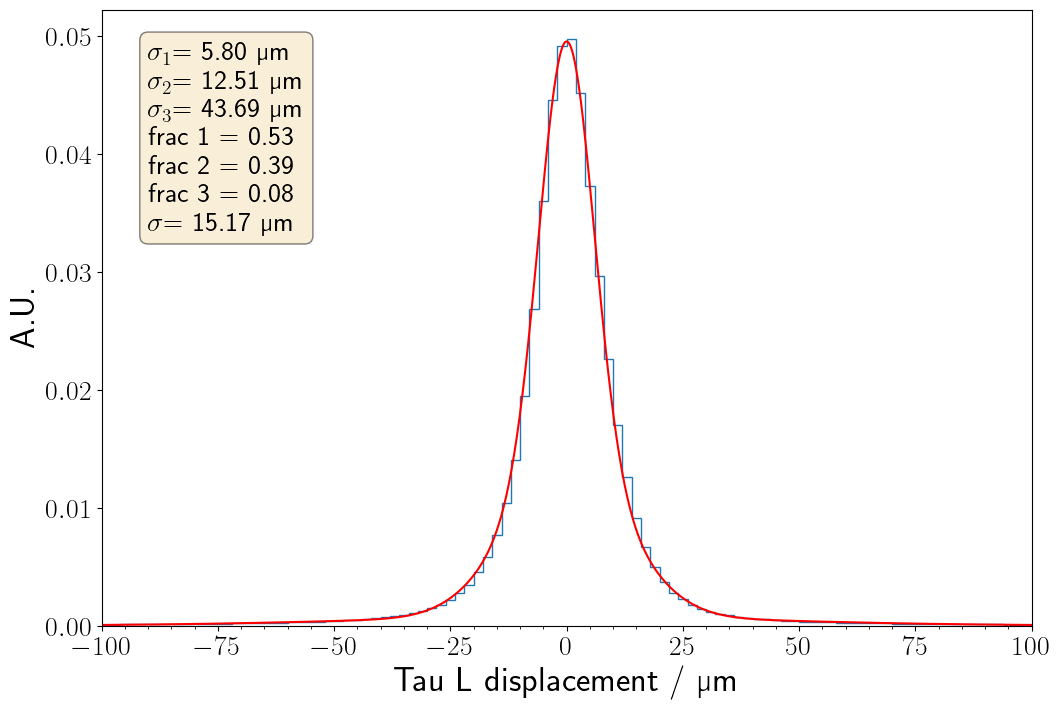

In [174]:
x_range = np.linspace(-100, 100, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Tau_l, bins = 100, histtype = "step", range=(-100,100), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-100, 100)
plt.xlabel("Tau L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

Text(0, 0.5, 'A.U.')

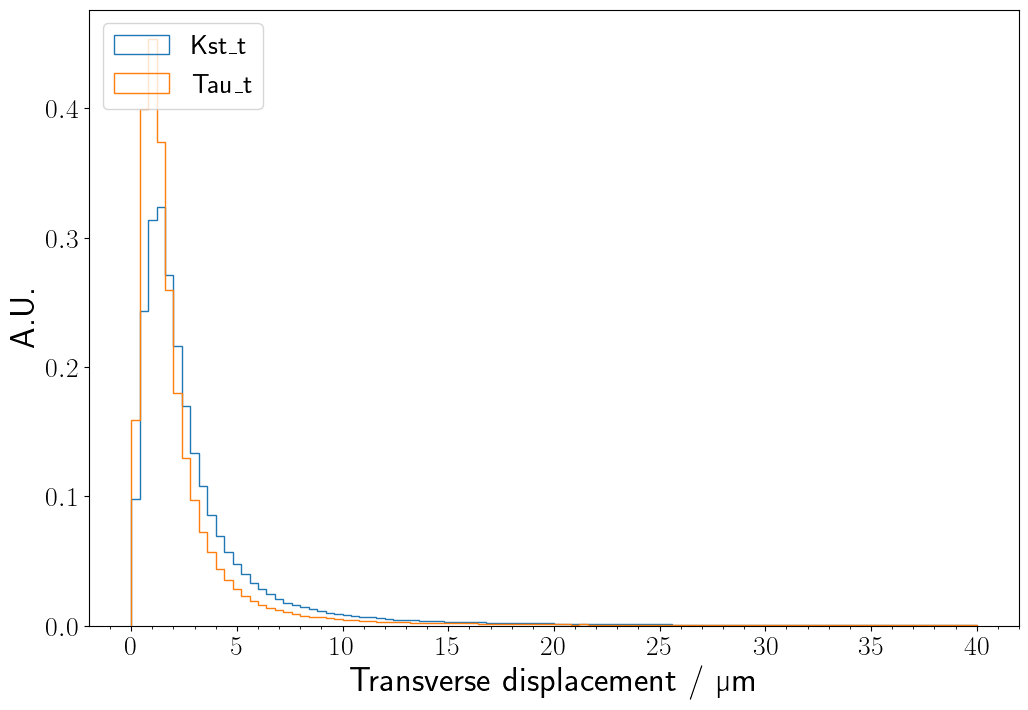

In [175]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Kst_t")
plt.hist(displacement_Tau_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Tau_t")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement / µm")
plt.ylabel("A.U.")

In [176]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeKst=len(Kst_mc_x)
Kst_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_rdvec_x=Kst_mc_x+np.cos(Kst_rdvec_angle)
Kst_rdvec_y=Kst_mc_y+np.sin(Kst_rdvec_angle)
print(Kst_rdvec_x)

Kst_rdvec_z=(-(Kst_uLx*(Kst_rdvec_x-Kst_mc_x)+Kst_uLy*(Kst_rdvec_y-Kst_mc_y))/Kst_uLz)+Kst_mc_z
Kst_uyp_x=Kst_rdvec_x-Kst_mc_x
Kst_uyp_y=Kst_rdvec_y-Kst_mc_y
Kst_uyp_z=Kst_rdvec_z-Kst_mc_z
Kst_uyp_norm=np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2)
Kst_uyp_x=Kst_uyp_x/Kst_uyp_norm
Kst_uyp_y=Kst_uyp_y/Kst_uyp_norm
Kst_uyp_z=Kst_uyp_z/Kst_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2))

Kst_uxp_x=(Kst_uyp_y*Kst_uLz-Kst_uyp_z*Kst_uLy)
Kst_uxp_y=(Kst_uyp_z*Kst_uLx-Kst_uyp_x*Kst_uLz)
Kst_uxp_z=(Kst_uyp_x*Kst_uLy-Kst_uyp_y*Kst_uLx)

print(np.sqrt(Kst_uxp_x**2+Kst_uxp_y**2+Kst_uxp_z**2))
print(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z)
print(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz)
print(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Kst_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_newpoint_x=Kst_mc_x+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_x+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_x
Kst_newpoint_y=Kst_mc_y+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_y+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_y
Kst_newpoint_z=Kst_mc_z+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_z+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_z

Kst_newuyp_x=Kst_newpoint_x-Kst_mc_x
Kst_newuyp_y=Kst_newpoint_y-Kst_mc_y
Kst_newuyp_z=Kst_newpoint_z-Kst_mc_z

Kst_newuxp_x=(Kst_newuyp_y*Kst_uLz-Kst_newuyp_z*Kst_uLy)
Kst_newuxp_y=(Kst_newuyp_z*Kst_uLx-Kst_newuyp_x*Kst_uLz)
Kst_newuxp_z=(Kst_newuyp_x*Kst_uLy-Kst_newuyp_y*Kst_uLx)

print(np.sqrt(Kst_newuxp_x**2+Kst_newuxp_y**2+Kst_newuxp_z**2))
print(np.sqrt(Kst_newuyp_x**2+Kst_newuyp_y**2+Kst_newuyp_z**2))

# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_newuyp_x+Kst_newuxp_y*Kst_newuyp_y+Kst_newuxp_z*Kst_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_uLx+Kst_newuxp_y*Kst_uLy+Kst_newuxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_newuyp_x+Kst_uLy*Kst_newuyp_y+Kst_uLz*Kst_newuyp_z, bins=100);





[ 816.51727402 -690.8862678  2434.70933873 ... 2224.61301676 1230.5883138
   21.2525827 ]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 0.00000000e+00 -2.77555756e-17  0.00000000e+00 ...  0.00000000e+00
 -1.73472348e-17  6.93889390e-18]


[-2.77555756e-17 -5.55111512e-17 -7.67615138e-17 ...  0.00000000e+00
 -3.46944695e-18 -3.46944695e-18]
[ 2.53130850e-14  5.09453590e-14  2.08166817e-17 ...  3.16968674e-14
 -2.49800181e-15  1.60982339e-15]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


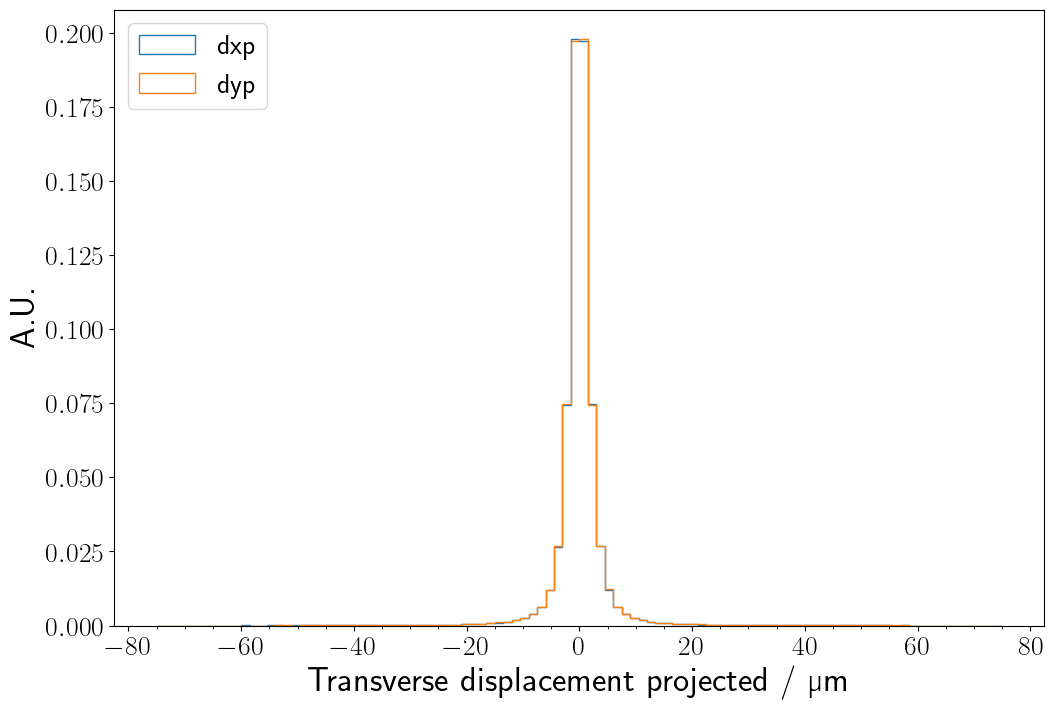

In [177]:
#building of the displacement on (x',y')
Kst_dxp=Kst_newuxp_x*Kst_dx+Kst_newuxp_y*Kst_dy+Kst_newuxp_z*Kst_dz
Kst_dyp=Kst_newuyp_x*Kst_dx+Kst_newuyp_y*Kst_dy+Kst_newuyp_z*Kst_dz
#cut of the events where the vertex reconstruction fails
Kst_dxp=Kst_dxp[Kst_rec_x!=0]
Kst_dyp=Kst_dyp[Kst_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_dxp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dxp")
plt.hist(Kst_dyp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");


In [178]:
Kst_DTp=np.concatenate([Kst_dxp,Kst_dyp], axis=0)
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 1, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 5, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [179]:
data = zfit.Data.from_numpy(obs = obs, array=Kst_DTp[abs(Kst_DTp<20)], weights = None)

In [180]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =          10137672 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -693620.3438
  Edm           : 61593.32922
  Internal parameters:
                0
   0.000301707813
    -0.8535815138
     -1.002085589
     -1.517057434
  Internal gradient  :
     -262389.8337
     -1960.906618
      209858.4129
       227771.442
      2.863359753
  Internal covariance matrix:
  3.1274886e-06              0              0              0              0
              0  0.00034862809              0              0              0
              0              0  3.7131652e-07              0              0
              0              0              0  2.5746031e-07              0
              0              0              0              0    0.017454399
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -693620.3438 Edm =       61593.

3.2565285236483303
0.2437679487436491


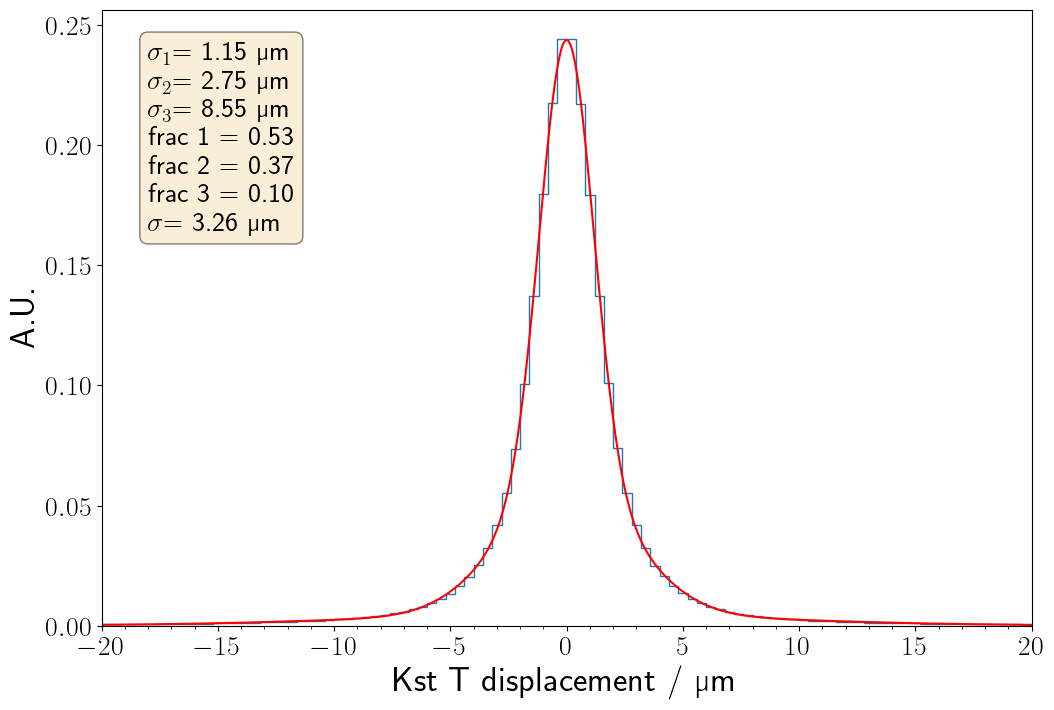

In [181]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_DTp, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-20, 20)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [182]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeTau=len(Tau_mc_x)
Tau_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_rdvec_x=Tau_mc_x+np.cos(Tau_rdvec_angle)
Tau_rdvec_y=Tau_mc_y+np.sin(Tau_rdvec_angle)
print(Tau_rdvec_x)

Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z
Tau_uyp_x=Tau_rdvec_x-Tau_mc_x
Tau_uyp_y=Tau_rdvec_y-Tau_mc_y
Tau_uyp_z=Tau_rdvec_z-Tau_mc_z
Tau_uyp_norm=np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2)
Tau_uyp_x=Tau_uyp_x/Tau_uyp_norm
Tau_uyp_y=Tau_uyp_y/Tau_uyp_norm
Tau_uyp_z=Tau_uyp_z/Tau_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2))

Tau_uxp_x=(Tau_uyp_y*Tau_uLz-Tau_uyp_z*Tau_uLy)
Tau_uxp_y=(Tau_uyp_z*Tau_uLx-Tau_uyp_x*Tau_uLz)
Tau_uxp_z=(Tau_uyp_x*Tau_uLy-Tau_uyp_y*Tau_uLx)

print(np.sqrt(Tau_uxp_x**2+Tau_uxp_y**2+Tau_uxp_z**2))
print(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z)
print(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz)
print(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Tau_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_newpoint_x=Tau_mc_x+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_x+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_x
Tau_newpoint_y=Tau_mc_y+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_y+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_y
Tau_newpoint_z=Tau_mc_z+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_z+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_z

Tau_newuyp_x=Tau_newpoint_x-Tau_mc_x
Tau_newuyp_y=Tau_newpoint_y-Tau_mc_y
Tau_newuyp_z=Tau_newpoint_z-Tau_mc_z

Tau_newuxp_x=(Tau_newuyp_y*Tau_uLz-Tau_newuyp_z*Tau_uLy)
Tau_newuxp_y=(Tau_newuyp_z*Tau_uLx-Tau_newuyp_x*Tau_uLz)
Tau_newuxp_z=(Tau_newuyp_x*Tau_uLy-Tau_newuyp_y*Tau_uLx)

print(np.sqrt(Tau_newuxp_x**2+Tau_newuxp_y**2+Tau_newuxp_z**2))
print(np.sqrt(Tau_newuyp_x**2+Tau_newuyp_y**2+Tau_newuyp_z**2))

# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_newuyp_x+Tau_newuxp_y*Tau_newuyp_y+Tau_newuxp_z*Tau_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_uLx+Tau_newuxp_y*Tau_uLy+Tau_newuxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_newuyp_x+Tau_uLy*Tau_newuyp_y+Tau_uLz*Tau_newuyp_z, bins=100);

[ 824.50164109 1042.91595961 -807.61902082 ...   -1.67352042    1.7490343
   49.88893445]


/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_39236/3007776521.py:10: RuntimeWarning: invalid value encountered in divide
  Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[-2.08166817e-17 -2.77555756e-17  1.38777878e-17 ...  5.20417043e-18
  2.77555756e-17  1.11022302e-16]
[ 3.46944695e-18  0.00000000e+00  5.55111512e-17 ... -3.46944695e-18
  5.55111512e-17  0.00000000e+00]
[ 7.59392549e-14  8.29891711e-14  4.50750548e-14 ...  1.33226763e-15
 -1.21569421e-14  1.83186799e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


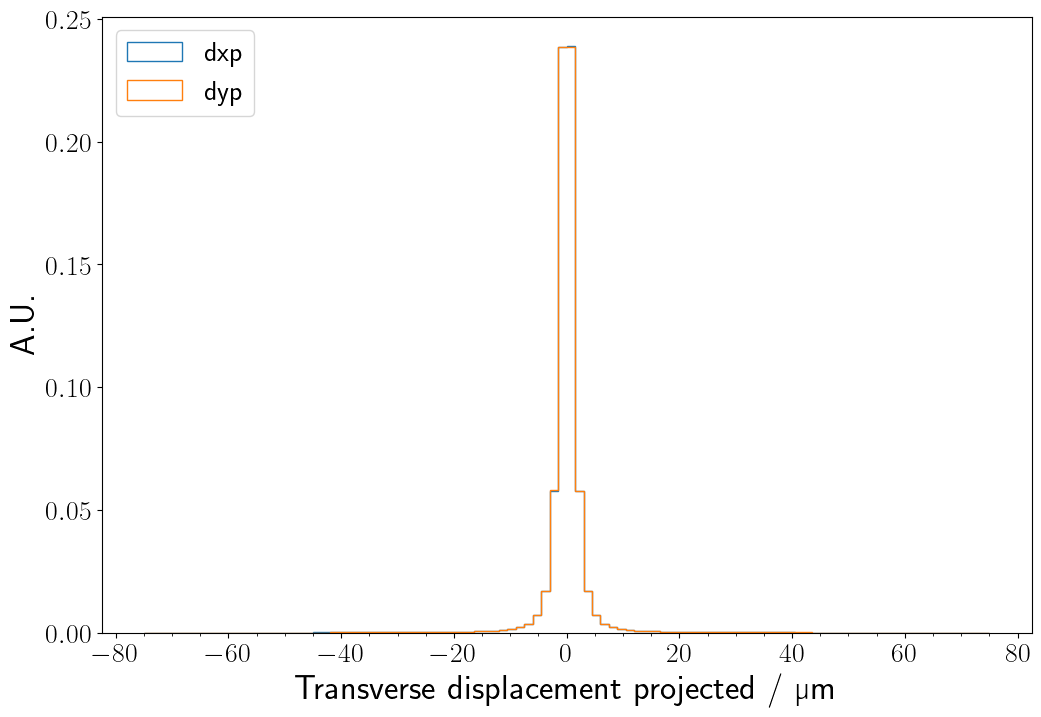

In [183]:
#building of the displacement on (x',y')
Tau_dxp=Tau_newuxp_x*Tau_dx+Tau_newuxp_y*Tau_dy+Tau_newuxp_z*Tau_dz
Tau_dyp=Tau_newuyp_x*Tau_dx+Tau_newuyp_y*Tau_dy+Tau_newuyp_z*Tau_dz
#cut of the events where the vertex reconstruction fails
Tau_dxp=Tau_dxp[Tau_rec_x!=0]
Tau_dyp=Tau_dyp[Tau_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_dxp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dxp")
plt.hist(Tau_dyp, bins = 100, range = (-75, 75), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

In [184]:
Tau_DTp=np.concatenate([Tau_dxp,Tau_dyp], axis=0)
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 1, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 1, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [185]:
data = zfit.Data.from_numpy(obs = obs, array=Tau_DTp[abs(Tau_DTp<20)], weights = None)

In [186]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =      -1441653.184 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -1907632.692
  Edm           : 16495.3934
  Internal parameters:
                0
                0
    -0.9493811274
     -1.094356427
    -0.5456658263
  Internal gradient  :
      430264361.1
      430836723.4
      610929.7363
       57614.2229
                0
  Internal covariance matrix:
  3.4501682e-14              0              0              0              0
              0  3.4502095e-14              0              0              0
              0              0  1.4160187e-07              0              0
              0              0              0  1.0221277e-07              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -1907632.692 Edm =        16495.

2.5506709909635905
0.33022931474875994


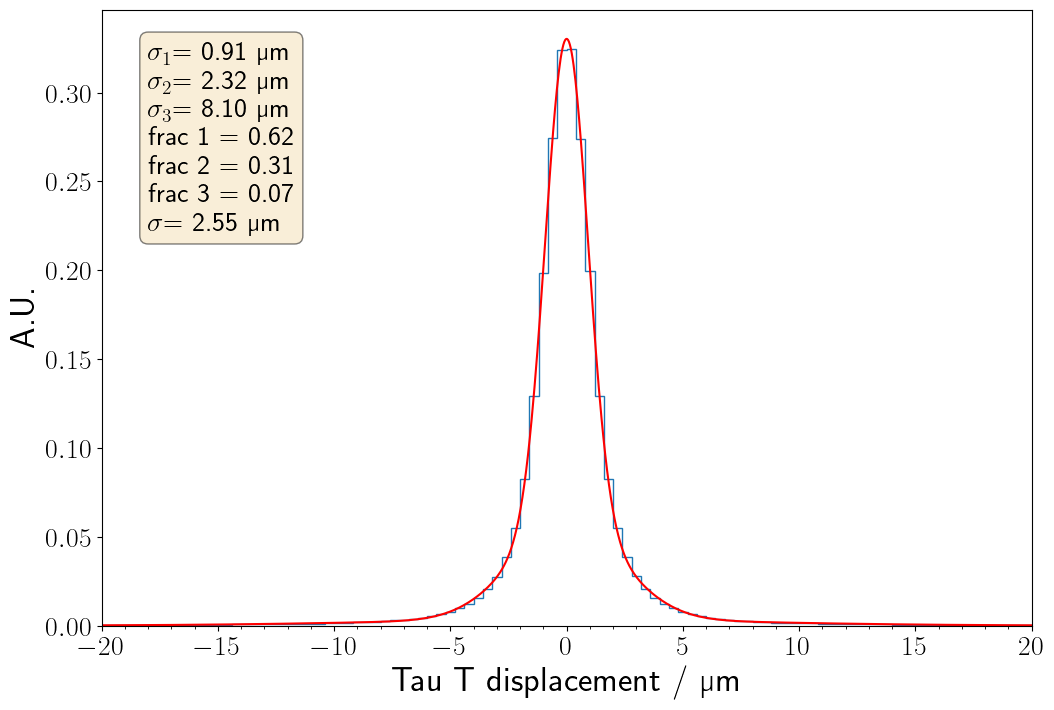

In [187]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_DTp, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-20, 20)
plt.xlabel("Tau T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

# IDEA with best d0z0 x1.5

In [150]:
vertex_resolution = ur.open("/Users/tristanmiralles/Desktop/FCC_stuff/IDEA_vertexing_study/p8_ee_Zbb_ecm91_EvtGen_Bd2KstarTauTau/vertex_resolution_last_smeared_d0z0_67.root")
events = vertex_resolution["tree"]

In [151]:
PV_dx=np.array(ak.flatten(events["PV_dx"].array(library = "ak") * 10**3))
PV_dy=np.array(ak.flatten(events["PV_dy"].array(library = "ak") * 10**3))
PV_dz=np.array(ak.flatten(events["PV_dz"].array(library = "ak") * 10**3))

PV_rec_x=np.array(ak.flatten(events["PV_rec_x"].array(library = "ak") * 10**3))
PV_rec_y=np.array(ak.flatten(events["PV_rec_y"].array(library = "ak") * 10**3))
PV_rec_z=np.array(ak.flatten(events["PV_rec_z"].array(library = "ak") * 10**3))

print(len(PV_dx))

PV_dx=PV_dx[PV_rec_x!=0]
PV_dy=PV_dy[PV_rec_x!=0]
PV_dz=PV_dz[PV_rec_x!=0]

print(len(PV_dx))

Kst_rec_x=np.array(ak.flatten(events["Kst_rec_x"].array(library = "ak") * 10**3))
Kst_rec_y=np.array(ak.flatten(events["Kst_rec_y"].array(library = "ak") * 10**3))
Kst_rec_z=np.array(ak.flatten(events["Kst_rec_z"].array(library = "ak") * 10**3))

Kst_mc_x=np.array(ak.flatten(events["Kst_mc_x"].array(library = "ak") * 10**3))
Kst_mc_y=np.array(ak.flatten(events["Kst_mc_y"].array(library = "ak") * 10**3))
Kst_mc_z=np.array(ak.flatten(events["Kst_mc_z"].array(library = "ak") * 10**3))
Kst_dx=np.array(ak.flatten(events["Kst_dx"].array(library = "ak") * 10**3))
Kst_dy=np.array(ak.flatten(events["Kst_dy"].array(library = "ak") * 10**3))
Kst_dz=np.array(ak.flatten(events["Kst_dz"].array(library = "ak") * 10**3))
Kst_uLx=np.array(ak.flatten(events["Kst_uLx"].array(library = "ak")))
Kst_uLy=np.array(ak.flatten(events["Kst_uLy"].array(library = "ak")))
Kst_uLz=np.array(ak.flatten(events["Kst_uLz"].array(library = "ak")))

displacement_Kst_l = np.array(ak.flatten(events["displacement_Kst_l"].array(library = "ak") * 10**3))
displacement_Kst_t = np.array(ak.flatten(events["displacement_Kst_t"].array(library = "ak") * 10**3))
print(len(displacement_Kst_l))
print(displacement_Kst_l)
displacement_Kst_l=displacement_Kst_l[Kst_rec_x!=0]
displacement_Kst_t=displacement_Kst_t[Kst_rec_x!=0]
print(len(displacement_Kst_l))
print(displacement_Kst_l)

Tau_rec_x=np.array(ak.flatten(events["Tau_rec_x"].array(library = "ak") * 10**3))
Tau_rec_y=np.array(ak.flatten(events["Tau_rec_y"].array(library = "ak") * 10**3))
Tau_rec_z=np.array(ak.flatten(events["Tau_rec_z"].array(library = "ak") * 10**3))

Tau_mc_x=np.array(ak.flatten(events["Tau_mc_x"].array(library = "ak") * 10**3))
Tau_mc_y=np.array(ak.flatten(events["Tau_mc_y"].array(library = "ak") * 10**3))
Tau_mc_z=np.array(ak.flatten(events["Tau_mc_z"].array(library = "ak") * 10**3))
Tau_dx=np.array(ak.flatten(events["Tau_dx"].array(library = "ak") * 10**3))
Tau_dy=np.array(ak.flatten(events["Tau_dy"].array(library = "ak") * 10**3))
Tau_dz=np.array(ak.flatten(events["Tau_dz"].array(library = "ak") * 10**3))
Tau_uLx=np.array(ak.flatten(events["Tau_uLx"].array(library = "ak")))
Tau_uLy=np.array(ak.flatten(events["Tau_uLy"].array(library = "ak")))
Tau_uLz=np.array(ak.flatten(events["Tau_uLz"].array(library = "ak")))


displacement_Tau_l = np.array(ak.flatten(events["displacement_Tau_l"].array(library = "ak") * 10**3))
displacement_Tau_t = np.array(ak.flatten(events["displacement_Tau_t"].array(library = "ak") * 10**3))
print(len(displacement_Tau_l))
displacement_Tau_l=displacement_Tau_l[Tau_rec_x!=0]
displacement_Tau_t=displacement_Tau_t[Tau_rec_x!=0]
print(len(displacement_Tau_l))

999805
980306
999805
[-6.68031250e+03 -4.05529903e+00 -3.62393601e+03 ... -1.66081740e+01
 -3.34551999e+00  3.67688051e+00]
892195
[ -4.05529903  -6.61159267  22.90270614 ... -16.60817395  -3.34551999
   3.67688051]
1999610
1621813


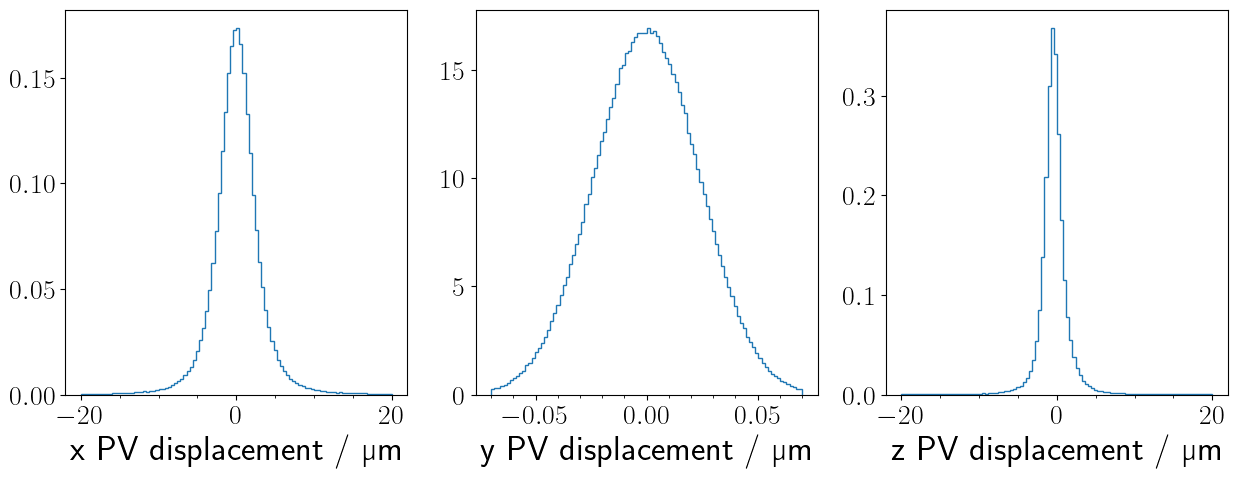

In [4]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(1, 3, 1)
ax1.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
ax1.set_xlabel('x PV displacement / µm')
ax1.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax2 = plt.subplot(1, 3, 2)
ax2.hist(PV_dy, bins = 100, histtype = "step", range=(-0.07,0.07), density = True)
ax2.set_xlabel('y PV displacement / µm')
ax2.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax3 = plt.subplot(1, 3, 3)
ax3.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
ax3.set_xlabel('z PV displacement / µm')
ax3.xaxis.set_minor_locator(tick.AutoMinorLocator());

In [5]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 5, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [6]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dx[(PV_dx > -20) & (PV_dx < 20)], weights = None)

In [7]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =      -78665.37186 NCalls =     13
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -469066.3421
  Edm           : 18036.85187
  Internal parameters:
                0
     -1.047655482
     -1.452466296
  Internal gradient  :
     -90181.29344
     -5047.807508
       54901.0441
  Internal covariance matrix:
  7.5705213e-06              0              0
              0  2.3848353e-06              0
              0              0   3.489611e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 545
I VariableMetricBuilder    0 - FCN =      -469066.3421 Edm =       18036.85187 NCalls =     91
I VariableMetricBuilder    1 - FCN =      -484263.0054 Edm =        5817.99438 NCalls =    101
I VariableMetricBuilder    2 - FCN =      -491116.9508 Edm =       304.8487343 NCalls =    110
I VariableMetricBuilder    3 - FCN =      -491479.8308 Edm =      0.4080807313 NCalls =    118
I Varia

3.2642770573928597


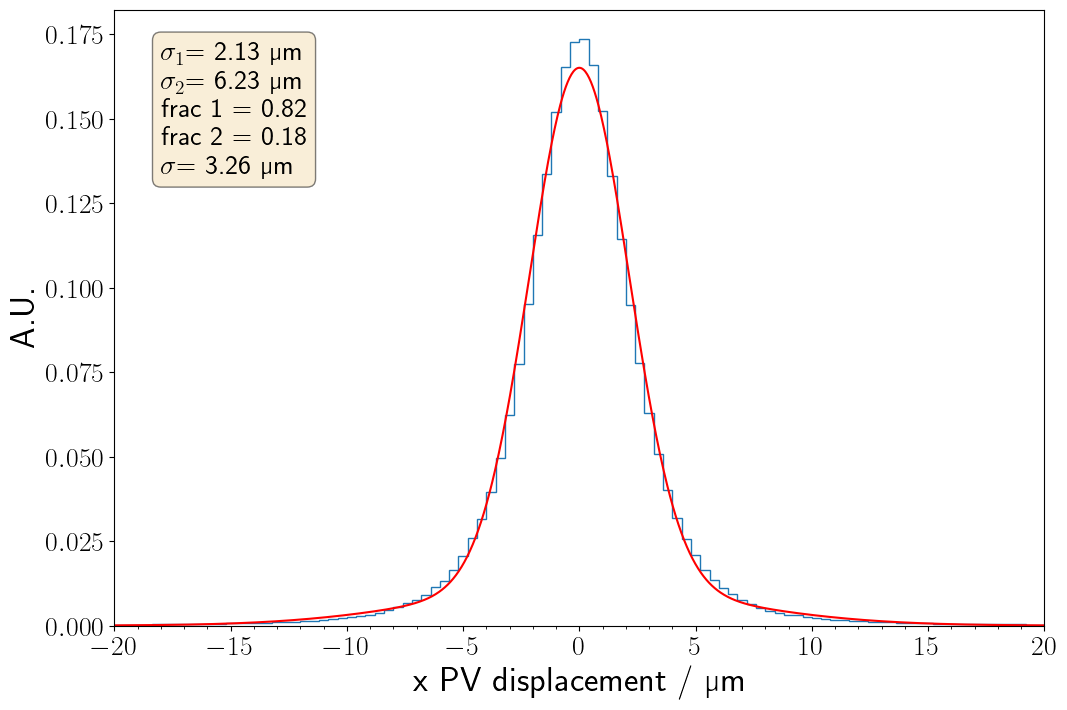

In [8]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.xlim(-20, 20)
plt.xlabel("x PV displacement / µm")
plt.ylabel("A.U.");

In [9]:
obs = zfit.Space("x", limits = (-0.2, 0.2))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 0.01, 0.001, 0.05)
model = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 0.03, 0.02, 0.05)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

# frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

# model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [10]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dy[(PV_dy > -0.2) & (PV_dy < 0.2)], weights = None)

In [11]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       760939.2473 NCalls =      5
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 305
I VariableMetricBuilder    0 - FCN =              1000 Edm =       760939.2473 NCalls =      5
I VariableMetricBuilder    1 - FCN =      -1430633.654 Edm =         53.909652 NCalls =     16
I VariableMetricBuilder    2 - FCN =      -1431784.528 Edm =      0.1684271888 NCalls =     21
I VariableMetricBuilder    3 - FCN =      -1431785.723 Edm =    2.52989538e-06 NCalls =     25
I VariableMetricBuilder After Hessian
I VariableMetricBuilder    4 - FCN =      -1431785.723 Edm =    1.91707305e-06 NCalls =     32
CONVERGED
Finished iteration 0, niter=32, fmin=-1431786, edm=1.92e-06 edm_minuit=1.92e-06
name        value  (rounded)    at limit
--------  ------------------  ----------
1_sigma1           0.0237819       False


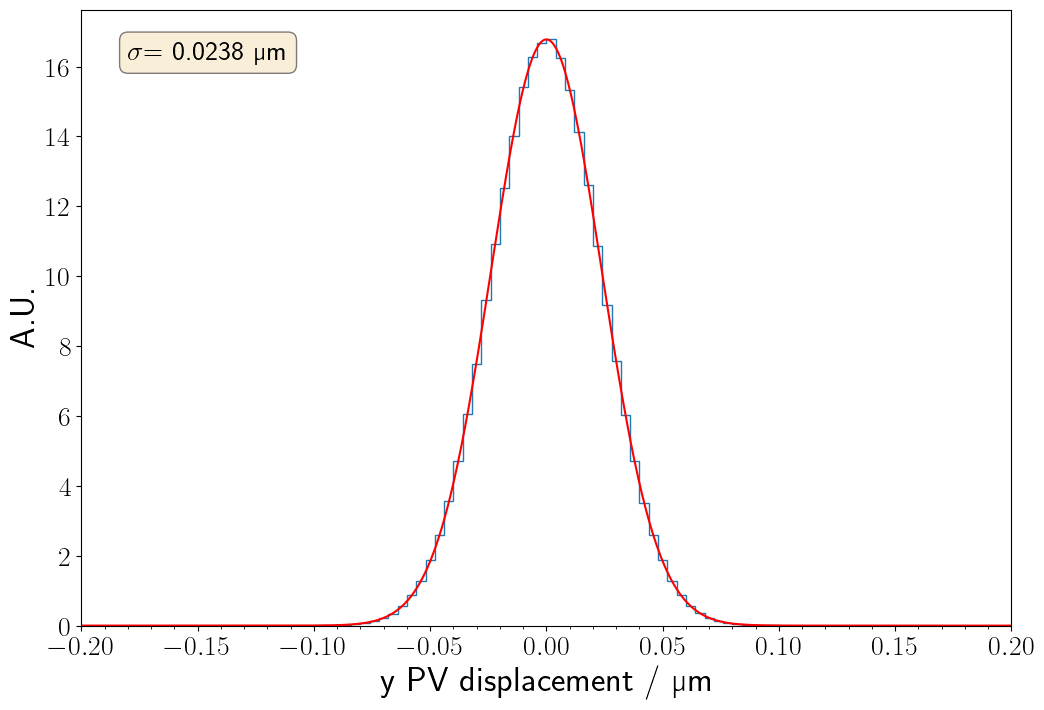

In [12]:
x_range = np.linspace(-0.2, 0.2, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dy, bins = 100, histtype = "step", range=(-0.2,0.2), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
# combined_resolution = np.sqrt(params[frac12]['value']**2 * params[sigma1]['value']**2 + (1 - params[frac12]['value'])**2 * params[sigma2]['value']**2 )
# print(combined_resolution)
# frac1=params[frac12]['value']
# frac2=1-params[frac12]['value']
#textstr = f"$\\sigma_1$= {params[sigma1]['value']:.4f} µm \n$\\sigma_2$= {params[sigma2]['value']:.4f} µm  \nfrac 1 = {frac1:.4f} \nfrac 2 = {frac2:.4f} \n$\\sigma$= {combined_resolution:.4f} µm" 
textstr = f"$\\sigma$= {params[sigma1]['value']:.4f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-0.2, 0.2)
plt.xlabel("y PV displacement / µm")
plt.ylabel("A.U.");

In [17]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
#shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 2, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])

a += 1

In [18]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dz[(PV_dz > -20) & (PV_dz < 20)], weights = None)

In [19]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       596830.0162 NCalls =     17
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -180305.8967
  Edm           : 546871.5159
  Internal parameters:
                0
                0
    -0.8911225079
      -1.55698444
  Internal gradient  :
     -281442.8246
      663614.2865
      509227.4024
      12917.06741
  Internal covariance matrix:
  1.2859065e-05              0              0              0
              0  1.3450513e-07              0              0
              0              0  4.2779565e-06              0
              0              0              0  2.1397178e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 680
I VariableMetricBuilder    0 - FCN =      -180305.8967 Edm =       546871.5159 NCalls =     96
I VariableMetricBuilder    1 - FCN =      -452126.1928 Edm =       174307.1136 NCalls =    123
I VariableMetricBuilder    2 - FCN =      -479026.5734 

2.1046192176005962


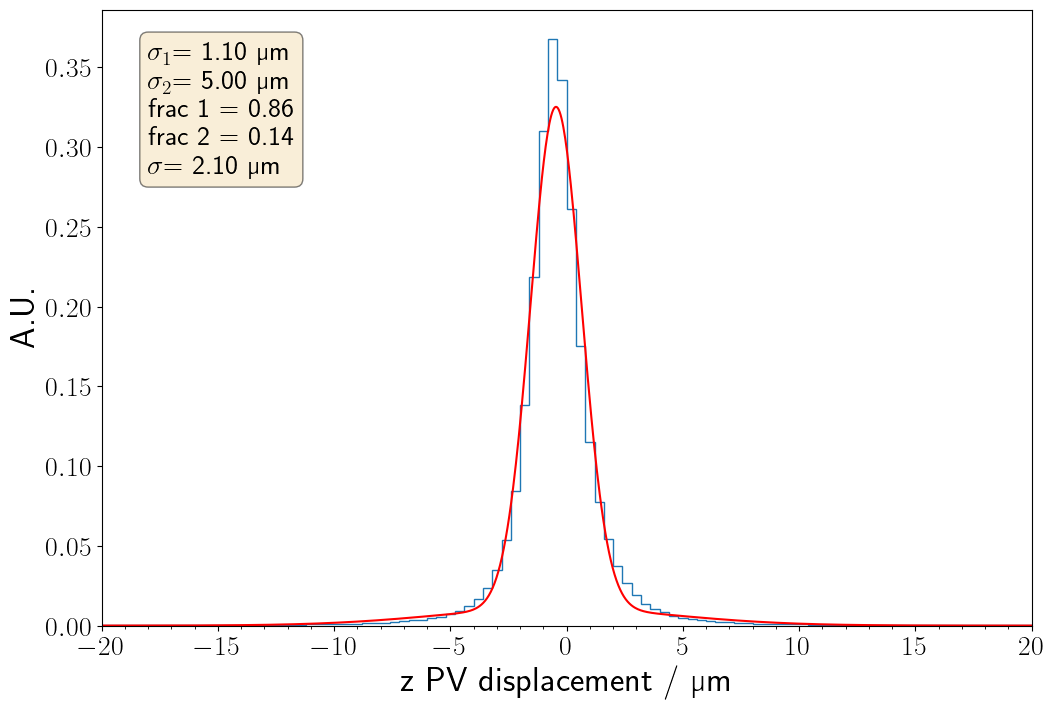

In [20]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-20, 20)
plt.xlabel("z PV displacement / µm")
plt.ylabel("A.U.");

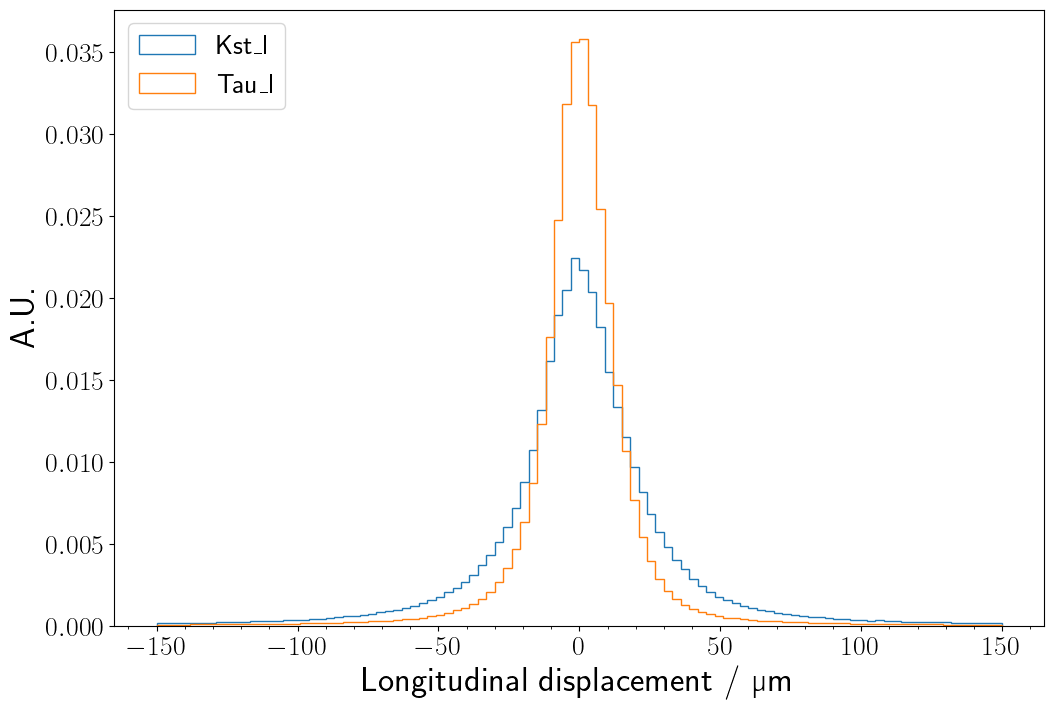

In [152]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Kst_l")
plt.hist(displacement_Tau_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Tau_l")
plt.legend(loc = "upper left")
plt.xlabel("Longitudinal displacement / µm")
plt.ylabel("A.U.");

In [154]:
obs = zfit.Space("x", limits = (-200, 200))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 20, 5, 30)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 200)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 170, 40, 500)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a += 1

In [155]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Kst_l[(displacement_Kst_l > -200) & (displacement_Kst_l < 200)], weights = None)

In [156]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       137196.4385 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 137196.4385
  Internal parameters:
                0
                0
     0.2013579208
    -0.7297276562
    -0.4497968604
  Internal gradient  :
       990295.967
      1099783.158
      90809.49693
     -26966.40701
                0
  Internal covariance matrix:
  6.4436196e-09              0              0              0              0
              0  6.5019653e-09              0              0              0
              0              0  6.4683943e-05              0              0
              0              0              0  1.6432159e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       137196.4385 NC

38.121769712292696
0.021364527967300203


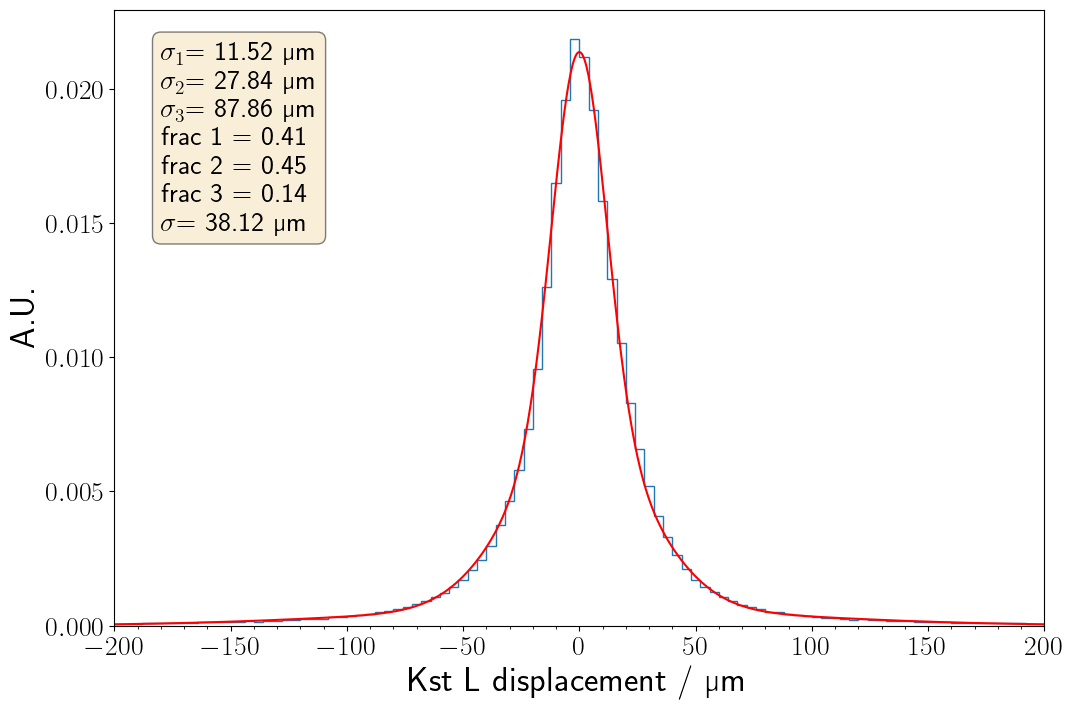

In [157]:
x_range = np.linspace(-200, 200, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, histtype = "step", range=(-200,200), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-200, 200)
plt.xlabel("Kst L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [158]:
obs = zfit.Space("x", limits = (-100, 100))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 10, 1, 25)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 10, 80)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 100, 20, 150)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a+=1

In [159]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Tau_l[(displacement_Tau_l > -100) & (displacement_Tau_l < 100)], weights = None)

In [160]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       377859.8576 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -88253.60306
  Edm           : 546342.6995
  Internal parameters:
                0
                0
    -0.2526802551
    -0.2649820778
     0.2328681783
  Internal gradient  :
     -473147.6184
     -116829.4119
      224638.6146
      241802.1147
                0
  Internal covariance matrix:
   1.362462e-06              0              0              0              0
              0  2.7152824e-06              0              0              0
              0              0  2.4295567e-06              0              0
              0              0              0  2.9429565e-05              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -88253.60306 Edm =       546342

19.01104737612185
0.03643110145098019


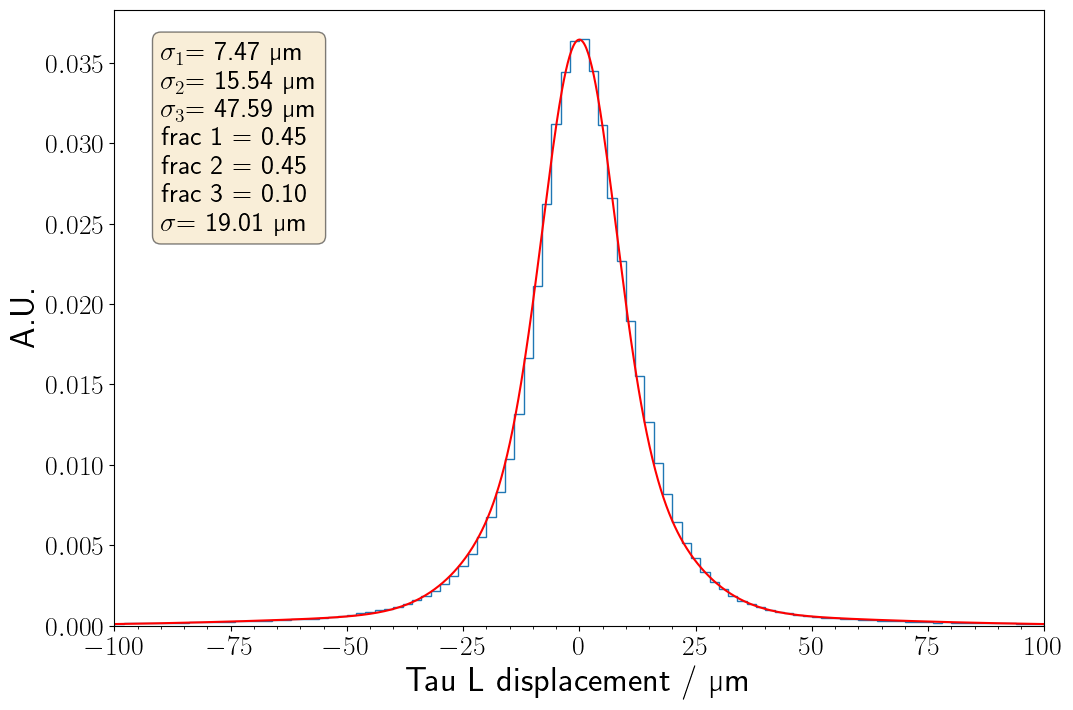

In [162]:
x_range = np.linspace(-100, 100, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Tau_l, bins = 100, histtype = "step", range=(-100,100), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-100, 100)
plt.xlabel("Tau L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

Text(0, 0.5, 'A.U.')

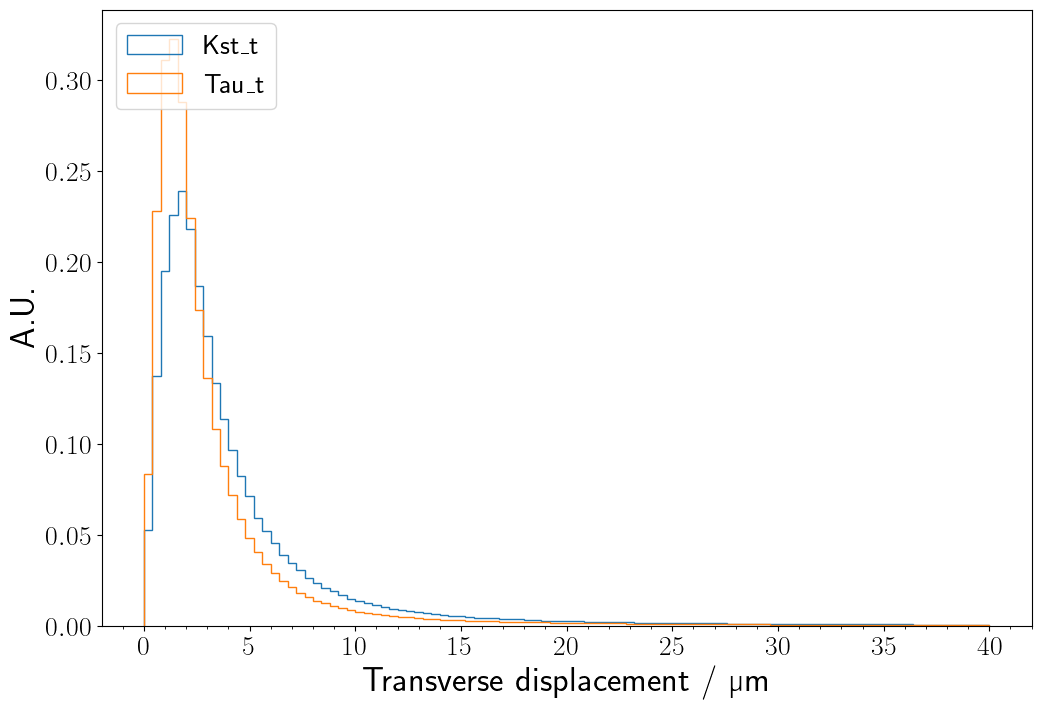

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Kst_t")
plt.hist(displacement_Tau_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Tau_t")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement / µm")
plt.ylabel("A.U.")

In [34]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeKst=len(Kst_mc_x)
Kst_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_rdvec_x=Kst_mc_x+np.cos(Kst_rdvec_angle)
Kst_rdvec_y=Kst_mc_y+np.sin(Kst_rdvec_angle)
print(Kst_rdvec_x)

Kst_rdvec_z=(-(Kst_uLx*(Kst_rdvec_x-Kst_mc_x)+Kst_uLy*(Kst_rdvec_y-Kst_mc_y))/Kst_uLz)+Kst_mc_z
Kst_uyp_x=Kst_rdvec_x-Kst_mc_x
Kst_uyp_y=Kst_rdvec_y-Kst_mc_y
Kst_uyp_z=Kst_rdvec_z-Kst_mc_z
Kst_uyp_norm=np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2)
Kst_uyp_x=Kst_uyp_x/Kst_uyp_norm
Kst_uyp_y=Kst_uyp_y/Kst_uyp_norm
Kst_uyp_z=Kst_uyp_z/Kst_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2))

Kst_uxp_x=(Kst_uyp_y*Kst_uLz-Kst_uyp_z*Kst_uLy)
Kst_uxp_y=(Kst_uyp_z*Kst_uLx-Kst_uyp_x*Kst_uLz)
Kst_uxp_z=(Kst_uyp_x*Kst_uLy-Kst_uyp_y*Kst_uLx)

print(np.sqrt(Kst_uxp_x**2+Kst_uxp_y**2+Kst_uxp_z**2))
print(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z)
print(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz)
print(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Kst_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_newpoint_x=Kst_mc_x+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_x+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_x
Kst_newpoint_y=Kst_mc_y+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_y+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_y
Kst_newpoint_z=Kst_mc_z+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_z+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_z

Kst_newuyp_x=Kst_newpoint_x-Kst_mc_x
Kst_newuyp_y=Kst_newpoint_y-Kst_mc_y
Kst_newuyp_z=Kst_newpoint_z-Kst_mc_z

Kst_newuxp_x=(Kst_newuyp_y*Kst_uLz-Kst_newuyp_z*Kst_uLy)
Kst_newuxp_y=(Kst_newuyp_z*Kst_uLx-Kst_newuyp_x*Kst_uLz)
Kst_newuxp_z=(Kst_newuyp_x*Kst_uLy-Kst_newuyp_y*Kst_uLx)

print(np.sqrt(Kst_newuxp_x**2+Kst_newuxp_y**2+Kst_newuxp_z**2))
print(np.sqrt(Kst_newuyp_x**2+Kst_newuyp_y**2+Kst_newuyp_z**2))

# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_newuyp_x+Kst_newuxp_y*Kst_newuyp_y+Kst_newuxp_z*Kst_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_uLx+Kst_newuxp_y*Kst_uLy+Kst_newuxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_newuyp_x+Kst_uLy*Kst_newuyp_y+Kst_uLz*Kst_newuyp_z, bins=100);





[ 816.5133443  -690.54388896 2433.90335738 ... 2226.05913617 1229.29781782
   20.74042197]


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 0.00000000e+00  5.55111512e-17 -1.73472348e-18 ... -6.93889390e-17
  4.16333634e-17  0.00000000e+00]
[ 2.77555756e-17  0.00000000e+00  4.73796349e-17 ...  1.38777878e-17
 -8.32667268e-17 -1.38777878e-17]
[ 8.08242362e-14  3.68594044e-14 -1.38777878e-17 ...  1.52655666e-14
 -3.44169138e-15  3.10862447e-15]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


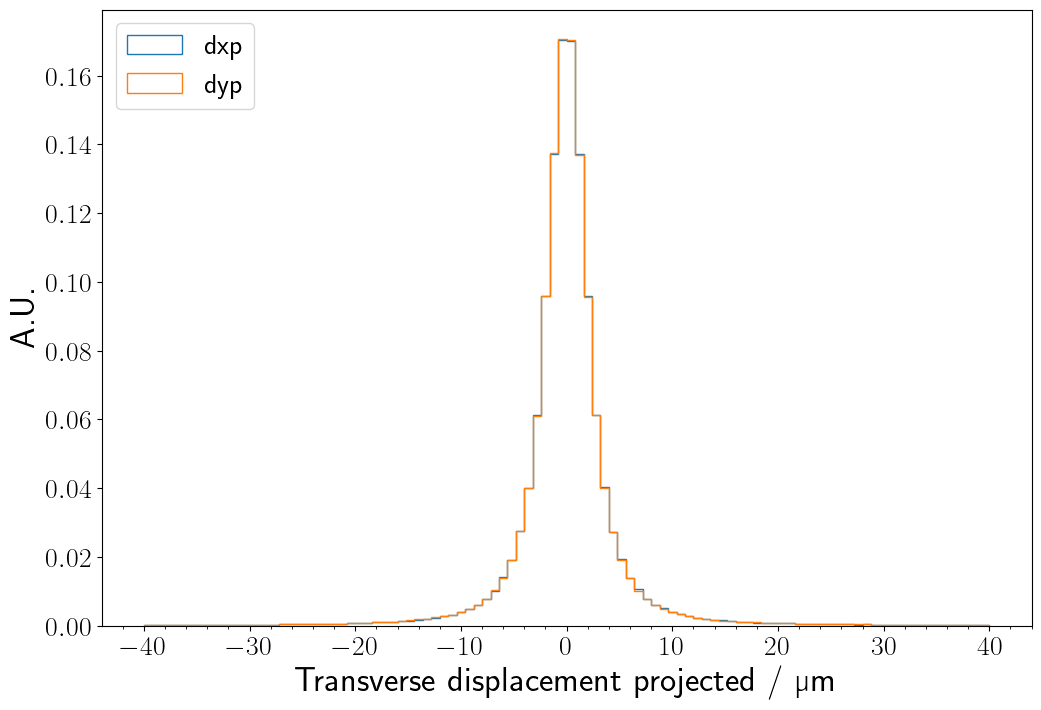

In [36]:
#building of the displacement on (x',y')
Kst_dxp=Kst_newuxp_x*Kst_dx+Kst_newuxp_y*Kst_dy+Kst_newuxp_z*Kst_dz
Kst_dyp=Kst_newuyp_x*Kst_dx+Kst_newuyp_y*Kst_dy+Kst_newuyp_z*Kst_dz
#cut of the events where the vertex reconstruction fails
Kst_dxp=Kst_dxp[Kst_rec_x!=0]
Kst_dyp=Kst_dyp[Kst_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_dxp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dxp")
plt.hist(Kst_dyp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");


In [40]:
Kst_DTp=np.concatenate([Kst_dxp,Kst_dyp], axis=0)
obs = zfit.Space("x", limits = (-40, 40))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 3, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 10, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [41]:
data = zfit.Data.from_numpy(obs = obs, array=Kst_DTp[abs(Kst_DTp<40)], weights = None)

In [42]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       669576.7894 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -218039.9294
  Edm           : 567850.1415
  Internal parameters:
                0
  -0.002184242386
    -0.4115168461
    -0.8086835305
    -0.7956029535
  Internal gradient  :
     -98246.28521
      403291.8601
       760949.393
      412477.0792
     -3427.853765
  Internal covariance matrix:
  2.8271585e-08              0              0              0              0
              0  2.8913296e-08              0              0              0
              0              0  3.0345701e-06              0              0
              0              0              0  2.9427347e-06              0
              0              0              0              0  0.00073245849
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -218039.9294 Edm =       567850

5.040110820794031
0.17222642475964575


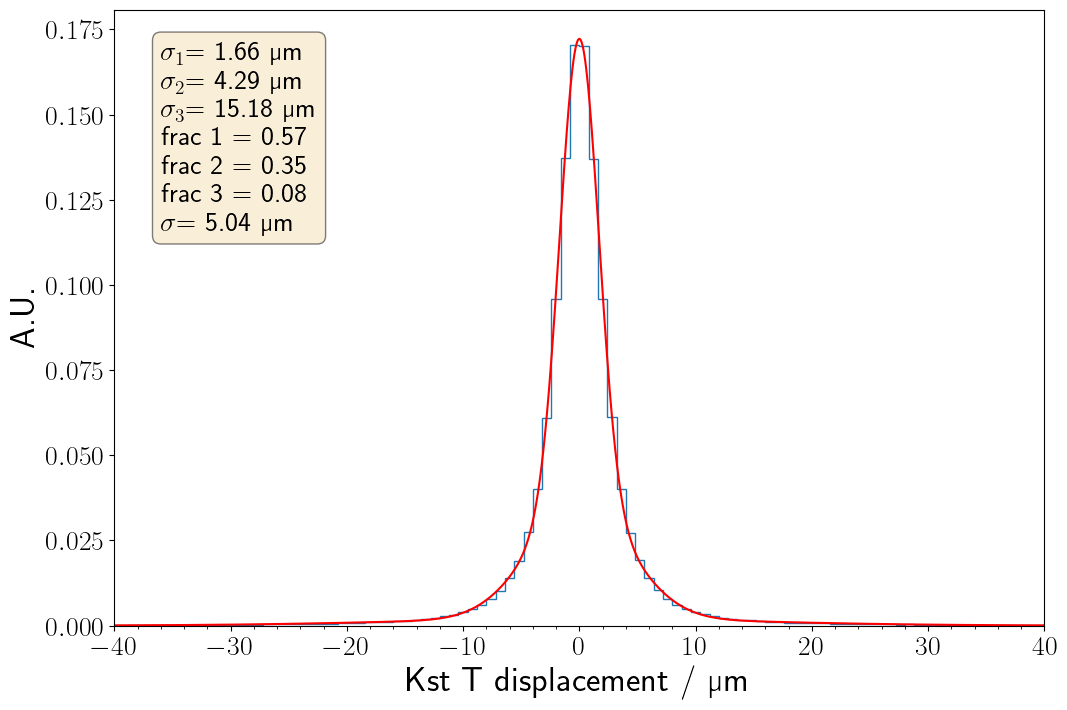

In [43]:
x_range = np.linspace(-40, 40, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_DTp, bins = 100, histtype = "step", range=(-40,40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-40, 40)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [44]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeTau=len(Tau_mc_x)
Tau_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_rdvec_x=Tau_mc_x+np.cos(Tau_rdvec_angle)
Tau_rdvec_y=Tau_mc_y+np.sin(Tau_rdvec_angle)
print(Tau_rdvec_x)

Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z
Tau_uyp_x=Tau_rdvec_x-Tau_mc_x
Tau_uyp_y=Tau_rdvec_y-Tau_mc_y
Tau_uyp_z=Tau_rdvec_z-Tau_mc_z
Tau_uyp_norm=np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2)
Tau_uyp_x=Tau_uyp_x/Tau_uyp_norm
Tau_uyp_y=Tau_uyp_y/Tau_uyp_norm
Tau_uyp_z=Tau_uyp_z/Tau_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2))

Tau_uxp_x=(Tau_uyp_y*Tau_uLz-Tau_uyp_z*Tau_uLy)
Tau_uxp_y=(Tau_uyp_z*Tau_uLx-Tau_uyp_x*Tau_uLz)
Tau_uxp_z=(Tau_uyp_x*Tau_uLy-Tau_uyp_y*Tau_uLx)

print(np.sqrt(Tau_uxp_x**2+Tau_uxp_y**2+Tau_uxp_z**2))
print(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z)
print(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz)
print(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Tau_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_newpoint_x=Tau_mc_x+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_x+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_x
Tau_newpoint_y=Tau_mc_y+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_y+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_y
Tau_newpoint_z=Tau_mc_z+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_z+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_z

Tau_newuyp_x=Tau_newpoint_x-Tau_mc_x
Tau_newuyp_y=Tau_newpoint_y-Tau_mc_y
Tau_newuyp_z=Tau_newpoint_z-Tau_mc_z

Tau_newuxp_x=(Tau_newuyp_y*Tau_uLz-Tau_newuyp_z*Tau_uLy)
Tau_newuxp_y=(Tau_newuyp_z*Tau_uLx-Tau_newuyp_x*Tau_uLz)
Tau_newuxp_z=(Tau_newuyp_x*Tau_uLy-Tau_newuyp_y*Tau_uLx)

print(np.sqrt(Tau_newuxp_x**2+Tau_newuxp_y**2+Tau_newuxp_z**2))
print(np.sqrt(Tau_newuyp_x**2+Tau_newuyp_y**2+Tau_newuyp_z**2))

# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_newuyp_x+Tau_newuxp_y*Tau_newuyp_y+Tau_newuxp_z*Tau_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_uLx+Tau_newuxp_y*Tau_uLy+Tau_newuxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_newuyp_x+Tau_uLy*Tau_newuyp_y+Tau_uLz*Tau_newuyp_z, bins=100);

[ 825.61267024 1042.99663393 -807.98006254 ...   -1.35989338    3.72486621
   48.19072218]


/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2597/3007776521.py:10: RuntimeWarning: invalid value encountered in divide
  Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[-1.11022302e-16 -5.55111512e-17  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[ 0.00000000e+00  5.55111512e-17 -5.55111512e-17 ...  0.00000000e+00
 -5.55111512e-17  5.55111512e-17]
[-1.68753900e-14 -3.38618023e-14  5.24025268e-14 ...  3.60822483e-16
 -7.18869408e-15  3.58602037e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


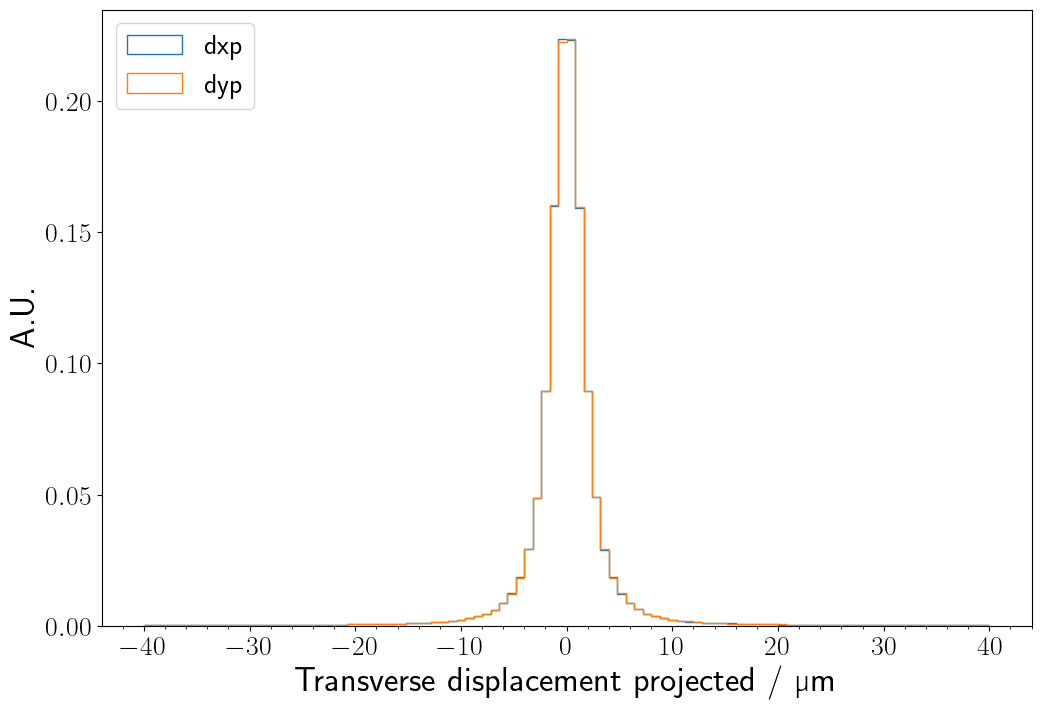

In [45]:
#building of the displacement on (x',y')
Tau_dxp=Tau_newuxp_x*Tau_dx+Tau_newuxp_y*Tau_dy+Tau_newuxp_z*Tau_dz
Tau_dyp=Tau_newuyp_x*Tau_dx+Tau_newuyp_y*Tau_dy+Tau_newuyp_z*Tau_dz
#cut of the events where the vertex reconstruction fails
Tau_dxp=Tau_dxp[Tau_rec_x!=0]
Tau_dyp=Tau_dyp[Tau_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_dxp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dxp")
plt.hist(Tau_dyp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

In [49]:
Tau_DTp=np.concatenate([Tau_dxp,Tau_dyp], axis=0)
obs = zfit.Space("x", limits = (-40, 40))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 3, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 5, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [50]:
data = zfit.Data.from_numpy(obs = obs, array=Tau_DTp[abs(Tau_DTp<40)], weights = None)

In [51]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =        4924869.29 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -1044048.827
  Edm           : 57601.81937
  Internal parameters:
                0
   0.002184242386
    -0.8472454595
    -0.8014760963
    -0.6435011088
  Internal gradient  :
      72418.45772
       1130833.11
     -113454.3537
      925033.2632
      12759.12559
  Internal covariance matrix:
  1.6288747e-09              0              0              0              0
              0  1.6422311e-09              0              0              0
              0              0  1.3806035e-07              0              0
              0              0              0  2.6183361e-07              0
              0              0              0              0  1.5197495e-05
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -1044048.827 Edm =       57601.

3.9490426741051947
0.23241615852794753


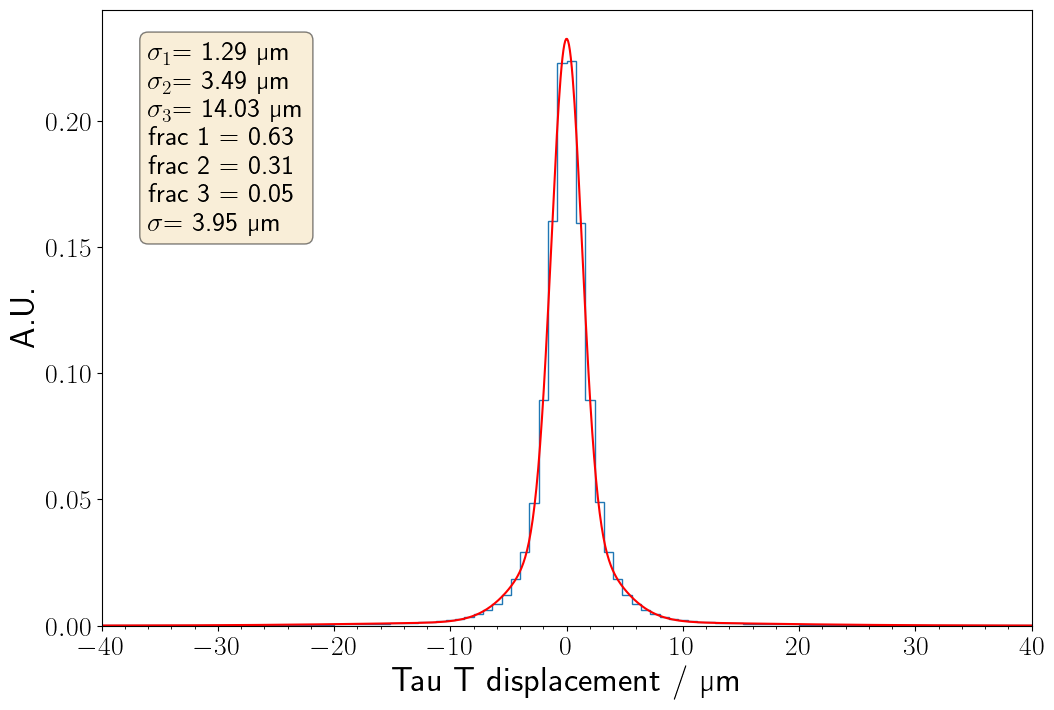

In [52]:
x_range = np.linspace(-40, 40, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_DTp, bins = 100, histtype = "step", range=(-40,40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-40, 40)
plt.xlabel("Tau T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

# IDEA with best d0z0 x1.2

In [163]:
vertex_resolution = ur.open("/Users/tristanmiralles/Desktop/FCC_stuff/IDEA_vertexing_study/p8_ee_Zbb_ecm91_EvtGen_Bd2KstarTauTau/vertex_resolution_last_smeared_d0z0_83.root")
events = vertex_resolution["tree"]

In [164]:
PV_dx=np.array(ak.flatten(events["PV_dx"].array(library = "ak") * 10**3))
PV_dy=np.array(ak.flatten(events["PV_dy"].array(library = "ak") * 10**3))
PV_dz=np.array(ak.flatten(events["PV_dz"].array(library = "ak") * 10**3))

PV_rec_x=np.array(ak.flatten(events["PV_rec_x"].array(library = "ak") * 10**3))
PV_rec_y=np.array(ak.flatten(events["PV_rec_y"].array(library = "ak") * 10**3))
PV_rec_z=np.array(ak.flatten(events["PV_rec_z"].array(library = "ak") * 10**3))

print(len(PV_dx))

PV_dx=PV_dx[PV_rec_x!=0]
PV_dy=PV_dy[PV_rec_x!=0]
PV_dz=PV_dz[PV_rec_x!=0]

print(len(PV_dx))

Kst_rec_x=np.array(ak.flatten(events["Kst_rec_x"].array(library = "ak") * 10**3))
Kst_rec_y=np.array(ak.flatten(events["Kst_rec_y"].array(library = "ak") * 10**3))
Kst_rec_z=np.array(ak.flatten(events["Kst_rec_z"].array(library = "ak") * 10**3))

Kst_mc_x=np.array(ak.flatten(events["Kst_mc_x"].array(library = "ak") * 10**3))
Kst_mc_y=np.array(ak.flatten(events["Kst_mc_y"].array(library = "ak") * 10**3))
Kst_mc_z=np.array(ak.flatten(events["Kst_mc_z"].array(library = "ak") * 10**3))
Kst_dx=np.array(ak.flatten(events["Kst_dx"].array(library = "ak") * 10**3))
Kst_dy=np.array(ak.flatten(events["Kst_dy"].array(library = "ak") * 10**3))
Kst_dz=np.array(ak.flatten(events["Kst_dz"].array(library = "ak") * 10**3))
Kst_uLx=np.array(ak.flatten(events["Kst_uLx"].array(library = "ak")))
Kst_uLy=np.array(ak.flatten(events["Kst_uLy"].array(library = "ak")))
Kst_uLz=np.array(ak.flatten(events["Kst_uLz"].array(library = "ak")))

displacement_Kst_l = np.array(ak.flatten(events["displacement_Kst_l"].array(library = "ak") * 10**3))
displacement_Kst_t = np.array(ak.flatten(events["displacement_Kst_t"].array(library = "ak") * 10**3))
print(len(displacement_Kst_l))
print(displacement_Kst_l)
displacement_Kst_l=displacement_Kst_l[Kst_rec_x!=0]
displacement_Kst_t=displacement_Kst_t[Kst_rec_x!=0]
print(len(displacement_Kst_l))
print(displacement_Kst_l)

Tau_rec_x=np.array(ak.flatten(events["Tau_rec_x"].array(library = "ak") * 10**3))
Tau_rec_y=np.array(ak.flatten(events["Tau_rec_y"].array(library = "ak") * 10**3))
Tau_rec_z=np.array(ak.flatten(events["Tau_rec_z"].array(library = "ak") * 10**3))

Tau_mc_x=np.array(ak.flatten(events["Tau_mc_x"].array(library = "ak") * 10**3))
Tau_mc_y=np.array(ak.flatten(events["Tau_mc_y"].array(library = "ak") * 10**3))
Tau_mc_z=np.array(ak.flatten(events["Tau_mc_z"].array(library = "ak") * 10**3))
Tau_dx=np.array(ak.flatten(events["Tau_dx"].array(library = "ak") * 10**3))
Tau_dy=np.array(ak.flatten(events["Tau_dy"].array(library = "ak") * 10**3))
Tau_dz=np.array(ak.flatten(events["Tau_dz"].array(library = "ak") * 10**3))
Tau_uLx=np.array(ak.flatten(events["Tau_uLx"].array(library = "ak")))
Tau_uLy=np.array(ak.flatten(events["Tau_uLy"].array(library = "ak")))
Tau_uLz=np.array(ak.flatten(events["Tau_uLz"].array(library = "ak")))


displacement_Tau_l = np.array(ak.flatten(events["displacement_Tau_l"].array(library = "ak") * 10**3))
displacement_Tau_t = np.array(ak.flatten(events["displacement_Tau_t"].array(library = "ak") * 10**3))
print(len(displacement_Tau_l))
displacement_Tau_l=displacement_Tau_l[Tau_rec_x!=0]
displacement_Tau_t=displacement_Tau_t[Tau_rec_x!=0]
print(len(displacement_Tau_l))

999805
983686
999805
[-6.68031250e+03 -5.29882146e+00 -3.62393601e+03 ... -2.13089299e+01
 -4.67288174e+00  4.56597530e+00]
892195
[ -5.29882146 -10.04754339  30.40220122 ... -21.30892986  -4.67288174
   4.5659753 ]
1999610
1621813


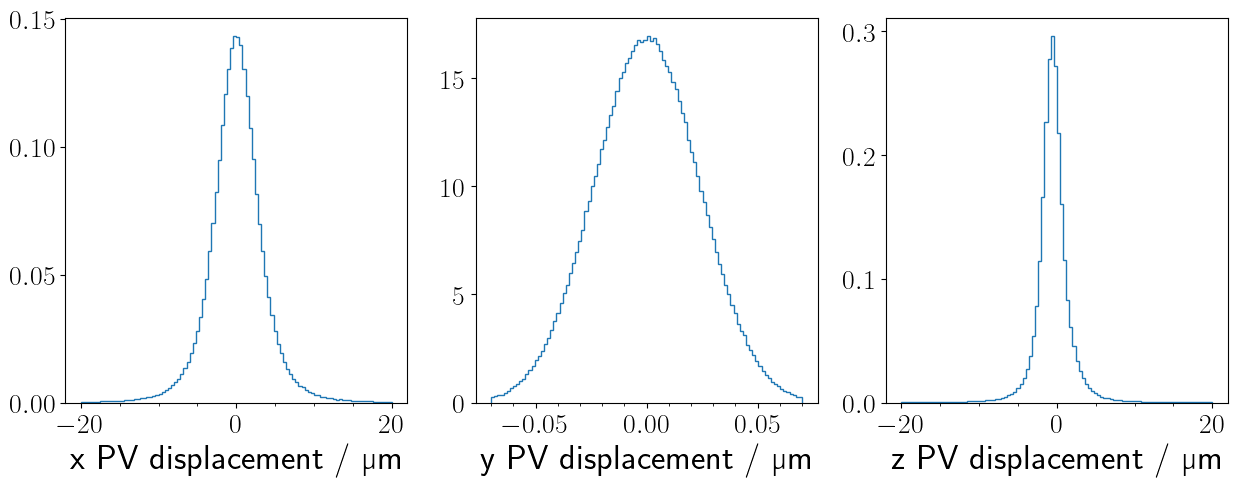

In [55]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(1, 3, 1)
ax1.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
ax1.set_xlabel('x PV displacement / µm')
ax1.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax2 = plt.subplot(1, 3, 2)
ax2.hist(PV_dy, bins = 100, histtype = "step", range=(-0.07,0.07), density = True)
ax2.set_xlabel('y PV displacement / µm')
ax2.xaxis.set_minor_locator(tick.AutoMinorLocator())
ax3 = plt.subplot(1, 3, 3)
ax3.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
ax3.set_xlabel('z PV displacement / µm')
ax3.xaxis.set_minor_locator(tick.AutoMinorLocator());

In [56]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 5, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [57]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dx[(PV_dx > -20) & (PV_dx < 20)], weights = None)

In [58]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =      -386846.1629 NCalls =     13
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -329812.9071
  Edm           : 102632.356
  Internal parameters:
                0
    -0.5317381325
     -1.551197735
  Internal gradient  :
     -62781.94441
      195509.2558
      7445.318145
  Internal covariance matrix:
  3.1866491e-05              0              0
              0    7.44656e-06              0
              0              0  5.2135838e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 545
I VariableMetricBuilder    0 - FCN =      -329812.9071 Edm =        102632.356 NCalls =     73
I VariableMetricBuilder    1 - FCN =      -362053.4222 Edm =       51288.97613 NCalls =     87
I VariableMetricBuilder    2 - FCN =      -374495.7261 Edm =       2581.451948 NCalls =     97
I VariableMetricBuilder    3 - FCN =       -375692.185 Edm =       86.53232567 NCalls =    105
I Variab

3.6726168496246316


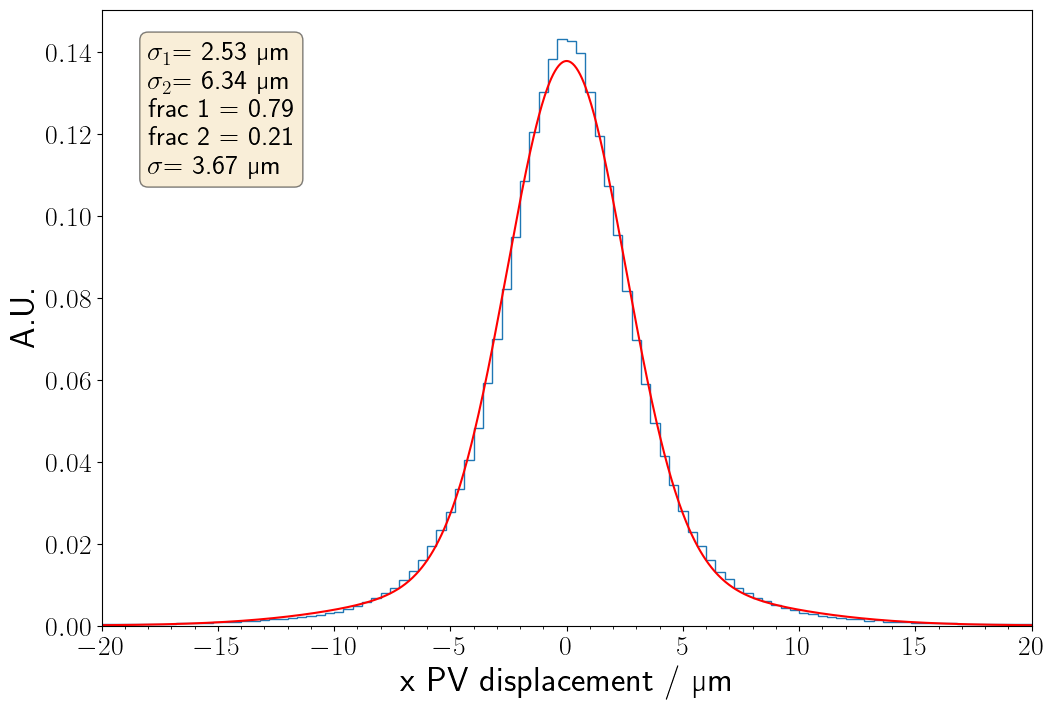

In [59]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dx, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)

plt.xlim(-20, 20)
plt.xlabel("x PV displacement / µm")
plt.ylabel("A.U.");

In [60]:
obs = zfit.Space("x", limits = (-0.2, 0.2))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 0.01, 0.001, 0.05)
model = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 0.03, 0.02, 0.05)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

# frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

# model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [61]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dy[(PV_dy > -0.2) & (PV_dy < 0.2)], weights = None)

In [62]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       763589.2442 NCalls =      5
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 305
I VariableMetricBuilder    0 - FCN =              1000 Edm =       763589.2442 NCalls =      5
I VariableMetricBuilder    1 - FCN =      -1435626.505 Edm =       54.10229876 NCalls =     16
I VariableMetricBuilder    2 - FCN =      -1436781.537 Edm =      0.1690694027 NCalls =     21
I VariableMetricBuilder    3 - FCN =      -1436782.737 Edm =   2.540099011e-06 NCalls =     25
I VariableMetricBuilder After Hessian
I VariableMetricBuilder    4 - FCN =      -1436782.737 Edm =   1.925024216e-06 NCalls =     32
CONVERGED
Finished iteration 0, niter=32, fmin=-1436783, edm=1.93e-06 edm_minuit=1.93e-06
name         value  (rounded)    at limit
---------  ------------------  ----------
12_sigma1           0.0237822       False


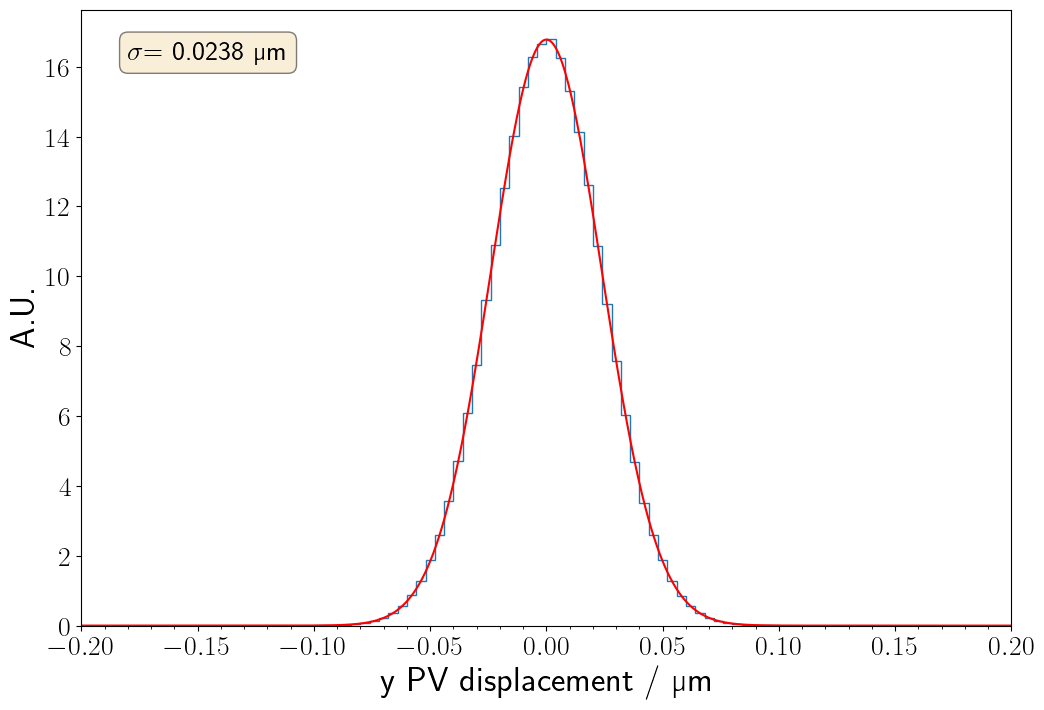

In [63]:
x_range = np.linspace(-0.2, 0.2, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dy, bins = 100, histtype = "step", range=(-0.2,0.2), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
# combined_resolution = np.sqrt(params[frac12]['value']**2 * params[sigma1]['value']**2 + (1 - params[frac12]['value'])**2 * params[sigma2]['value']**2 )
# print(combined_resolution)
# frac1=params[frac12]['value']
# frac2=1-params[frac12]['value']
#textstr = f"$\\sigma_1$= {params[sigma1]['value']:.4f} µm \n$\\sigma_2$= {params[sigma2]['value']:.4f} µm  \nfrac 1 = {frac1:.4f} \nfrac 2 = {frac2:.4f} \n$\\sigma$= {combined_resolution:.4f} µm" 
textstr = f"$\\sigma$= {params[sigma1]['value']:.4f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-0.2, 0.2)
plt.xlabel("y PV displacement / µm")
plt.ylabel("A.U.");

In [68]:
obs = zfit.Space("x", limits = (-20, 20))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
#shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 2, 1, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 15, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])

a += 1

In [69]:
data = zfit.Data.from_numpy(obs = obs, array=PV_dz[(PV_dz > -20) & (PV_dz < 20)], weights = None)

In [70]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =        423373.225 NCalls =     17
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -183166.7845
  Edm           : 307575.5734
  Internal parameters:
                0
                0
    -0.8911225079
     -1.578183176
  Internal gradient  :
     -234504.5785
      767131.2104
      379713.3827
      -6184.95409
  Internal covariance matrix:
  1.2762276e-05              0              0              0
              0  1.4572128e-07              0              0
              0              0  3.0699146e-06              0
              0              0              0  2.3886753e-06
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 680
I VariableMetricBuilder    0 - FCN =      -183166.7845 Edm =       307575.5734 NCalls =     97
I VariableMetricBuilder    1 - FCN =      -368539.0896 Edm =       67850.61595 NCalls =    115
I VariableMetricBuilder    2 - FCN =      -397415.8899 

2.4034077825311493


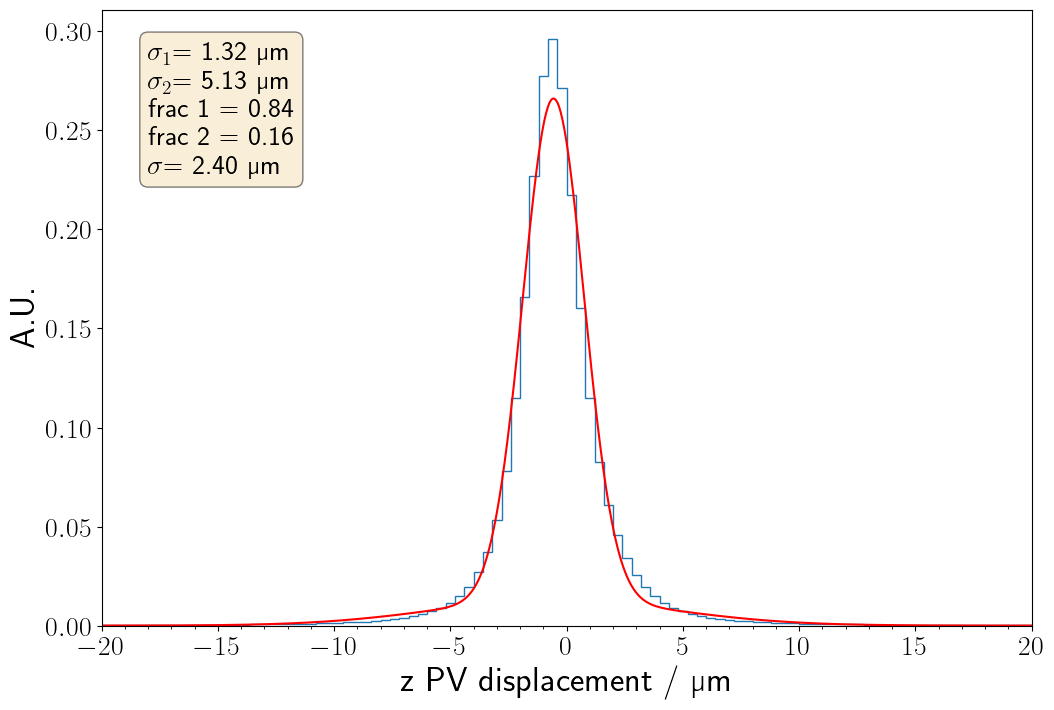

In [71]:
x_range = np.linspace(-20, 20, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(PV_dz, bins = 100, histtype = "step", range=(-20,20), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + (1 - params[frac12]['value']) * params[sigma2]['value']**2 )
print(combined_resolution)
frac1=params[frac12]['value']
frac2=1-params[frac12]['value']
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \n$\\sigma$= {combined_resolution:.2f} µm" 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-20, 20)
plt.xlabel("z PV displacement / µm")
plt.ylabel("A.U.");

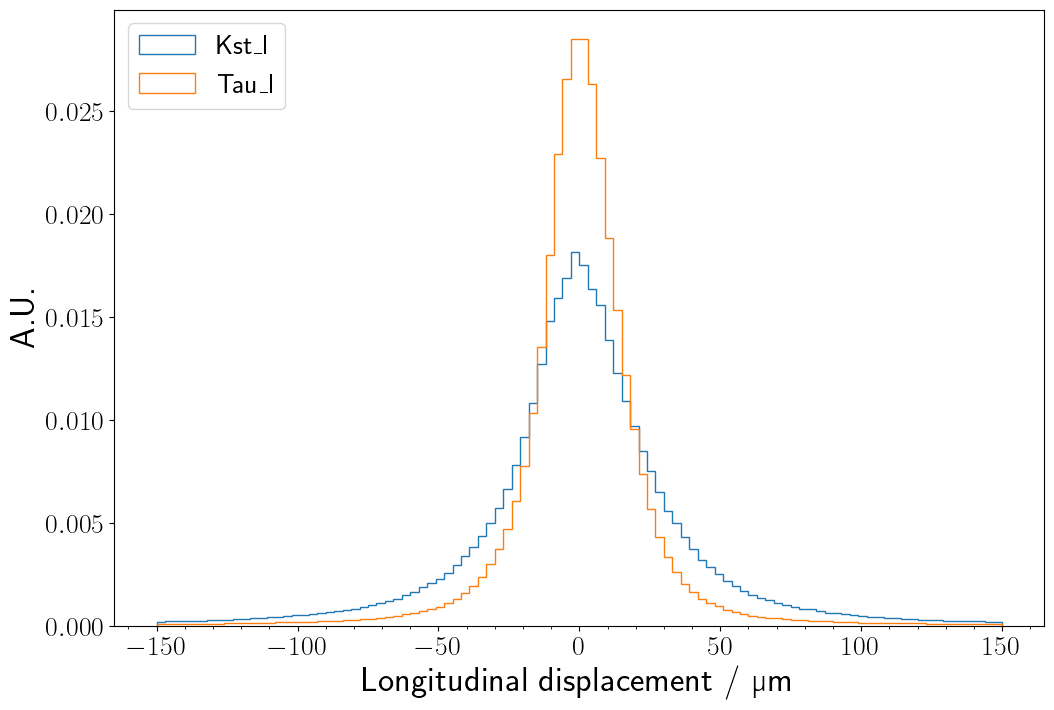

In [165]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Kst_l")
plt.hist(displacement_Tau_l, bins = 100, range = (-150, 150), histtype = "step", density = True, label = "Tau_l")
plt.legend(loc = "upper left")
plt.xlabel("Longitudinal displacement / µm")
plt.ylabel("A.U.");

In [90]:
obs = zfit.Space("x", limits = (-200, 200))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 20, 5, 30)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 50, 20, 200)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 170, 40, 500)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a += 1

In [91]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Kst_l[(displacement_Kst_l > -200) & (displacement_Kst_l < 200)], weights = None)

In [92]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       27668.00098 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 27668.00098
  Internal parameters:
                0
                0
     0.2013579208
    -0.7297276562
    -0.4497968604
  Internal gradient  :
      1531430.004
      1570172.016
      43121.36673
     -168823.6383
                0
  Internal covariance matrix:
  4.7095392e-09              0              0              0              0
              0  4.7512341e-09              0              0              0
              0              0  3.0231308e-05              0              0
              0              0              0  1.1121996e-06              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       27668.00098 NC

44.580411412876906
0.017174052006238543


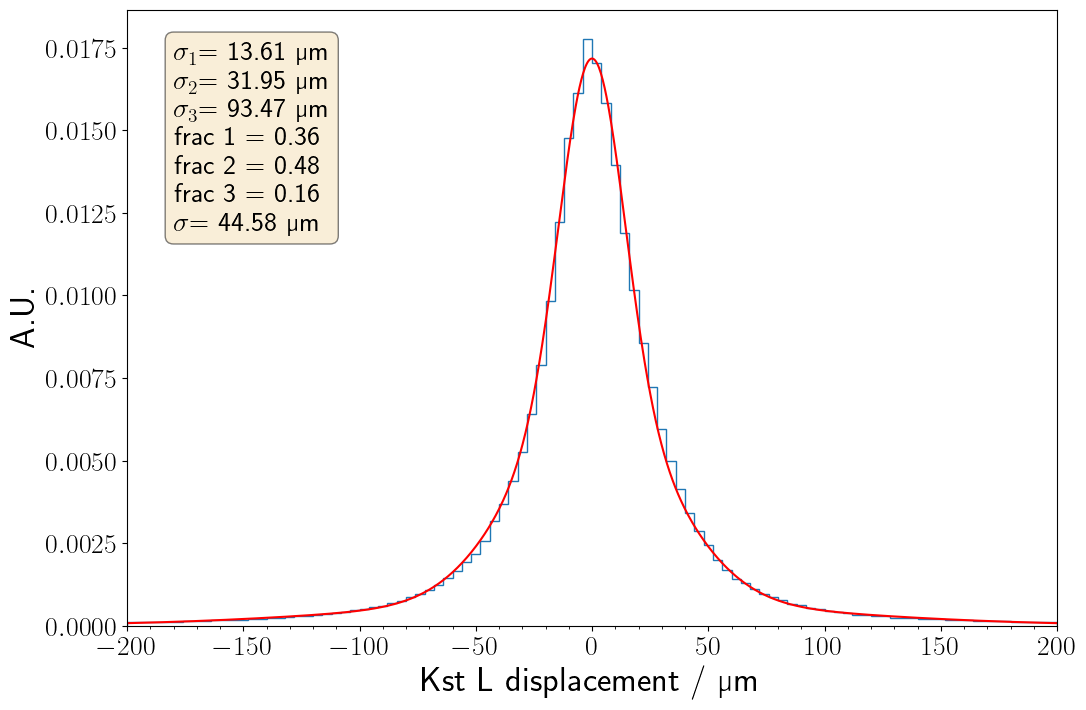

In [93]:
x_range = np.linspace(-200, 200, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_l, bins = 100, histtype = "step", range=(-200,200), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-200, 200)
plt.xlabel("Kst L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [166]:
obs = zfit.Space("x", limits = (-150, 150))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 25)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 10, 5, 80)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 10, 150)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
a+=1

In [167]:
data = zfit.Data.from_numpy(obs = obs, array=displacement_Tau_l[(displacement_Tau_l > -150) & (displacement_Tau_l < 150)], weights = None)

In [168]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       1910627.224 NCalls =     25
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 1912781.181
  Internal parameters:
  3.131824963e-16
                0
     -0.863313115
     -1.048481505
     -1.029696801
  Internal gradient  :
                0
  2.289123237e+17
     -628552.4035
     -15006528.31
                0
  Internal covariance matrix:
              2              0              0              0              0
              0  9.5418296e-34              0              0              0
              0              0  2.1816666e-06              0              0
              0              0              0  3.0147735e-08              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       1912781.181 NC

25.430615489273617
0.028519996333038353


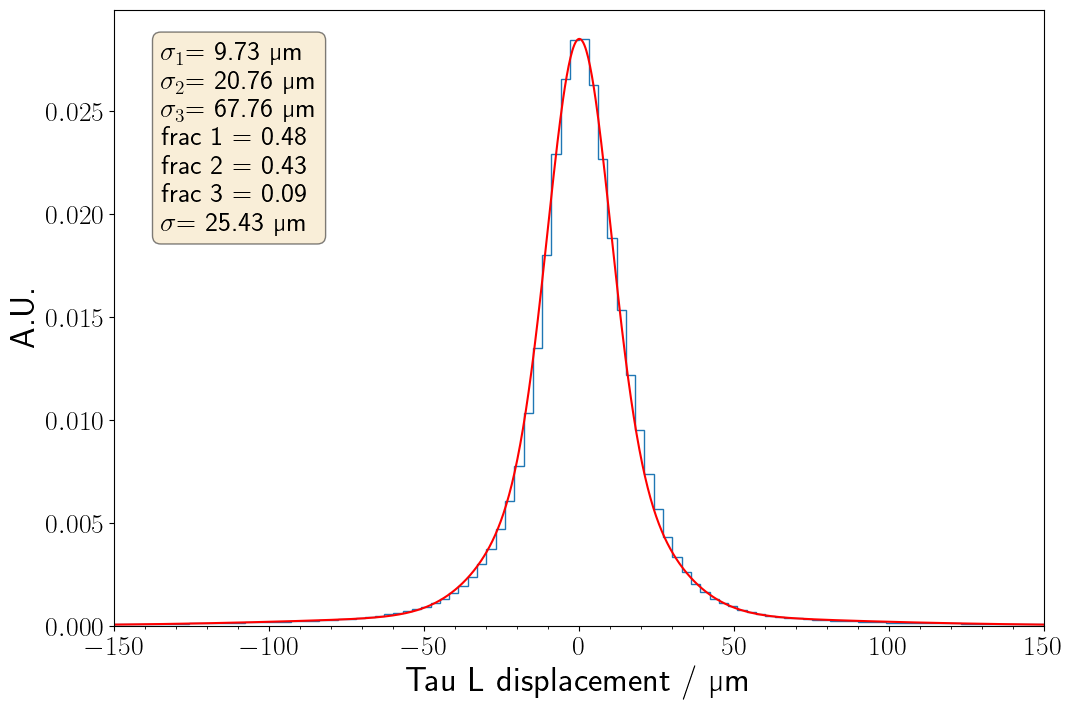

In [169]:
x_range = np.linspace(-150, 150, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Tau_l, bins = 100, histtype = "step", range=(-150,150), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)
combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-150, 150)
plt.xlabel("Tau L displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

Text(0, 0.5, 'A.U.')

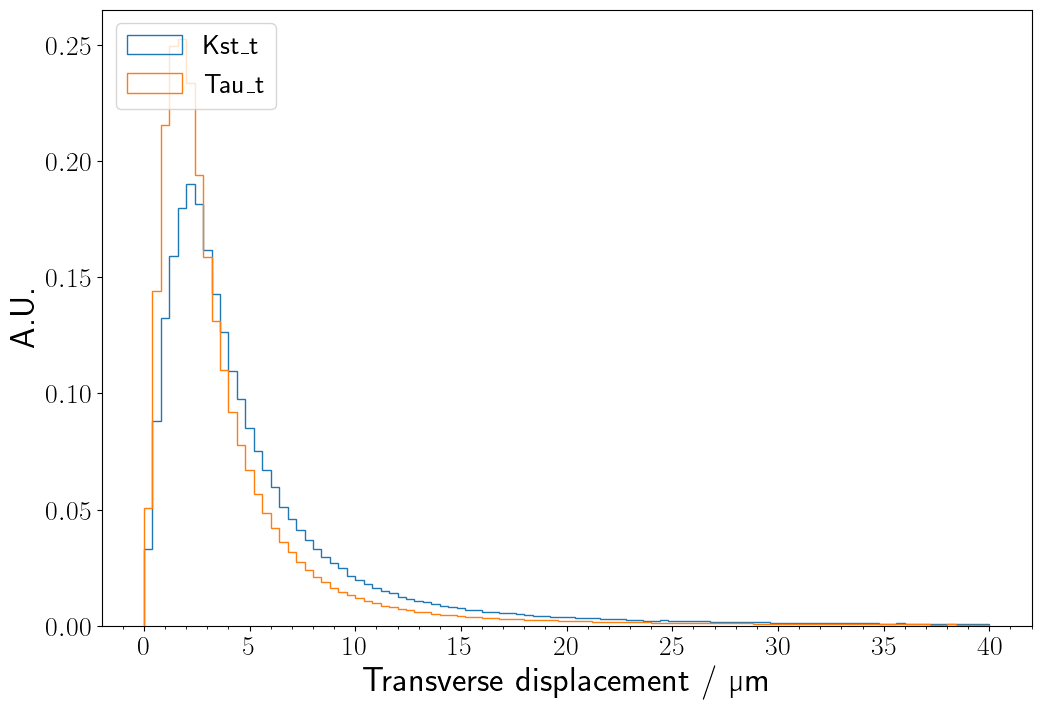

In [113]:
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(displacement_Kst_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Kst_t")
plt.hist(displacement_Tau_t, bins = 100, range = (0, 40), histtype = "step", density = True, label = "Tau_t")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement / µm")
plt.ylabel("A.U.")

In [115]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeKst=len(Kst_mc_x)
Kst_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_rdvec_x=Kst_mc_x+np.cos(Kst_rdvec_angle)
Kst_rdvec_y=Kst_mc_y+np.sin(Kst_rdvec_angle)
print(Kst_rdvec_x)

Kst_rdvec_z=(-(Kst_uLx*(Kst_rdvec_x-Kst_mc_x)+Kst_uLy*(Kst_rdvec_y-Kst_mc_y))/Kst_uLz)+Kst_mc_z
Kst_uyp_x=Kst_rdvec_x-Kst_mc_x
Kst_uyp_y=Kst_rdvec_y-Kst_mc_y
Kst_uyp_z=Kst_rdvec_z-Kst_mc_z
Kst_uyp_norm=np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2)
Kst_uyp_x=Kst_uyp_x/Kst_uyp_norm
Kst_uyp_y=Kst_uyp_y/Kst_uyp_norm
Kst_uyp_z=Kst_uyp_z/Kst_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Kst_uyp_x**2+Kst_uyp_y**2+Kst_uyp_z**2))

Kst_uxp_x=(Kst_uyp_y*Kst_uLz-Kst_uyp_z*Kst_uLy)
Kst_uxp_y=(Kst_uyp_z*Kst_uLx-Kst_uyp_x*Kst_uLz)
Kst_uxp_z=(Kst_uyp_x*Kst_uLy-Kst_uyp_y*Kst_uLx)

print(np.sqrt(Kst_uxp_x**2+Kst_uxp_y**2+Kst_uxp_z**2))
print(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z)
print(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz)
print(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uyp_x+Kst_uxp_y*Kst_uyp_y+Kst_uxp_z*Kst_uyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_uxp_x*Kst_uLx+Kst_uxp_y*Kst_uLy+Kst_uxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_uyp_x+Kst_uLy*Kst_uyp_y+Kst_uLz*Kst_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Kst_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeKst)
Kst_newpoint_x=Kst_mc_x+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_x+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_x
Kst_newpoint_y=Kst_mc_y+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_y+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_y
Kst_newpoint_z=Kst_mc_z+np.cos(Kst_rdvec_angle_circle)*Kst_uyp_z+np.sin(Kst_rdvec_angle_circle)*Kst_uxp_z

Kst_newuyp_x=Kst_newpoint_x-Kst_mc_x
Kst_newuyp_y=Kst_newpoint_y-Kst_mc_y
Kst_newuyp_z=Kst_newpoint_z-Kst_mc_z

Kst_newuxp_x=(Kst_newuyp_y*Kst_uLz-Kst_newuyp_z*Kst_uLy)
Kst_newuxp_y=(Kst_newuyp_z*Kst_uLx-Kst_newuyp_x*Kst_uLz)
Kst_newuxp_z=(Kst_newuyp_x*Kst_uLy-Kst_newuyp_y*Kst_uLx)

print(np.sqrt(Kst_newuxp_x**2+Kst_newuxp_y**2+Kst_newuxp_z**2))
print(np.sqrt(Kst_newuyp_x**2+Kst_newuyp_y**2+Kst_newuyp_z**2))

# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_newuyp_x+Kst_newuxp_y*Kst_newuyp_y+Kst_newuxp_z*Kst_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Kst_newuxp_x*Kst_uLx+Kst_newuxp_y*Kst_uLy+Kst_newuxp_z*Kst_uLz, bins=100)
# plt.figure()
# plt.hist(Kst_uLx*Kst_newuyp_x+Kst_uLy*Kst_newuyp_y+Kst_uLz*Kst_newuyp_z, bins=100);





[ 816.65836297 -691.41244034 2435.18003856 ... 2226.56720035 1230.62830771
   21.67159248]


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[-1.11022302e-16  0.00000000e+00  0.00000000e+00 ... -2.77555756e-17
  2.08166817e-17 -2.77555756e-17]
[-5.55111512e-17  0.00000000e+00 -9.54097912e-18 ...  0.00000000e+00
  9.02056208e-17 -1.38777878e-17]
[ 2.28705943e-14 -3.84692278e-14 -6.24500451e-17 ... -4.38538095e-15
 -1.72084569e-15  2.09277040e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


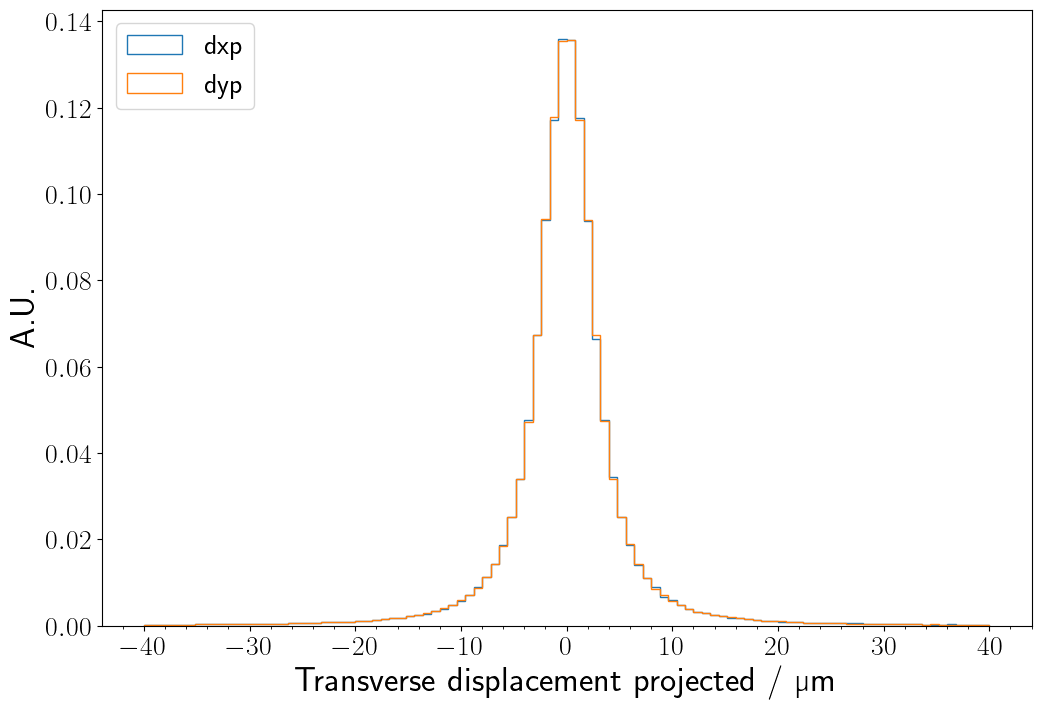

In [117]:
#building of the displacement on (x',y')
Kst_dxp=Kst_newuxp_x*Kst_dx+Kst_newuxp_y*Kst_dy+Kst_newuxp_z*Kst_dz
Kst_dyp=Kst_newuyp_x*Kst_dx+Kst_newuyp_y*Kst_dy+Kst_newuyp_z*Kst_dz
#cut of the events where the vertex reconstruction fails
Kst_dxp=Kst_dxp[Kst_rec_x!=0]
Kst_dyp=Kst_dyp[Kst_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_dxp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dxp")
plt.hist(Kst_dyp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");


In [118]:
Kst_DTp=np.concatenate([Kst_dxp,Kst_dyp], axis=0)
obs = zfit.Space("x", limits = (-40, 40))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 20, 5, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 20, 15, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [119]:
data = zfit.Data.from_numpy(obs = obs, array=Kst_DTp[abs(Kst_DTp<40)], weights = None)

In [120]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       318620.6122 NCalls =     21
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -225318.1763
  Edm           : 133655.7581
  Internal parameters:
                0
  -0.002184242386
    -0.4115168461
     -1.126193539
     -1.008726524
  Internal gradient  :
      4879547.267
      5090516.527
      438821.3943
     -183.6397961
     -18808.31275
  Internal covariance matrix:
  1.1144444e-09              0              0              0              0
              0  1.1167437e-09              0              0              0
              0              0  2.3275322e-06              0              0
              0              0              0  1.7944851e-06              0
              0              0              0              0  8.7490718e-05
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =      -225318.1763 Edm =       133655

5.9665966490376166
0.13589520718201922


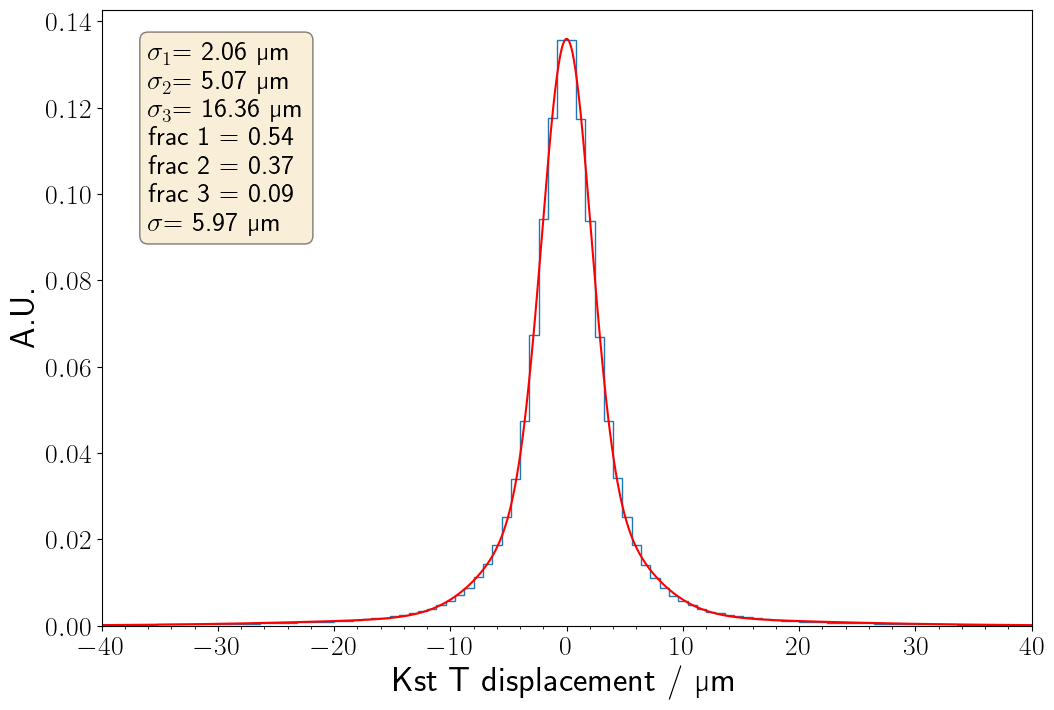

In [121]:
x_range = np.linspace(-40, 40, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Kst_DTp, bins = 100, histtype = "step", range=(-40,40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-40, 40)
plt.xlabel("Kst T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))

In [122]:
# determined two orthogonal vector of the transverse plan
# cannot be used directly for the projection on (x',y') because we first pick-up randomly vectors on a circle in (x,z) but this circle can be deformed when projected on the transverse plan => leads to discrepancy on Dy' vs Dx' (because this promot bias in the two direction determination)

sizeTau=len(Tau_mc_x)
Tau_rdvec_angle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_rdvec_x=Tau_mc_x+np.cos(Tau_rdvec_angle)
Tau_rdvec_y=Tau_mc_y+np.sin(Tau_rdvec_angle)
print(Tau_rdvec_x)

Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z
Tau_uyp_x=Tau_rdvec_x-Tau_mc_x
Tau_uyp_y=Tau_rdvec_y-Tau_mc_y
Tau_uyp_z=Tau_rdvec_z-Tau_mc_z
Tau_uyp_norm=np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2)
Tau_uyp_x=Tau_uyp_x/Tau_uyp_norm
Tau_uyp_y=Tau_uyp_y/Tau_uyp_norm
Tau_uyp_z=Tau_uyp_z/Tau_uyp_norm

#checks about orthogonality and unitarity printed/plotted
print(np.sqrt(Tau_uyp_x**2+Tau_uyp_y**2+Tau_uyp_z**2))

Tau_uxp_x=(Tau_uyp_y*Tau_uLz-Tau_uyp_z*Tau_uLy)
Tau_uxp_y=(Tau_uyp_z*Tau_uLx-Tau_uyp_x*Tau_uLz)
Tau_uxp_z=(Tau_uyp_x*Tau_uLy-Tau_uyp_y*Tau_uLx)

print(np.sqrt(Tau_uxp_x**2+Tau_uxp_y**2+Tau_uxp_z**2))
print(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z)
print(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz)
print(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uyp_x+Tau_uxp_y*Tau_uyp_y+Tau_uxp_z*Tau_uyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_uxp_x*Tau_uLx+Tau_uxp_y*Tau_uLy+Tau_uxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_uyp_x+Tau_uLy*Tau_uyp_y+Tau_uLz*Tau_uyp_z, bins=100);


# using these two orthogonal vectors contained in the transverse plan to parametrize a unit circle in the transverse plane (centered on MC veretex position), and then randomly take a unit vector in this circle -> and redetermine a second one by vectorial product
# in that way we manage to build unbiased basis on the transverse plan

Tau_rdvec_angle_circle=np.random.uniform(low=0,high=2*np.pi,size=sizeTau)
Tau_newpoint_x=Tau_mc_x+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_x+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_x
Tau_newpoint_y=Tau_mc_y+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_y+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_y
Tau_newpoint_z=Tau_mc_z+np.cos(Tau_rdvec_angle_circle)*Tau_uyp_z+np.sin(Tau_rdvec_angle_circle)*Tau_uxp_z

Tau_newuyp_x=Tau_newpoint_x-Tau_mc_x
Tau_newuyp_y=Tau_newpoint_y-Tau_mc_y
Tau_newuyp_z=Tau_newpoint_z-Tau_mc_z

Tau_newuxp_x=(Tau_newuyp_y*Tau_uLz-Tau_newuyp_z*Tau_uLy)
Tau_newuxp_y=(Tau_newuyp_z*Tau_uLx-Tau_newuyp_x*Tau_uLz)
Tau_newuxp_z=(Tau_newuyp_x*Tau_uLy-Tau_newuyp_y*Tau_uLx)

print(np.sqrt(Tau_newuxp_x**2+Tau_newuxp_y**2+Tau_newuxp_z**2))
print(np.sqrt(Tau_newuyp_x**2+Tau_newuyp_y**2+Tau_newuyp_z**2))

# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_newuyp_x+Tau_newuxp_y*Tau_newuyp_y+Tau_newuxp_z*Tau_newuyp_z, bins=100)
# plt.figure()
# plt.hist(Tau_newuxp_x*Tau_uLx+Tau_newuxp_y*Tau_uLy+Tau_newuxp_z*Tau_uLz, bins=100)
# plt.figure()
# plt.hist(Tau_uLx*Tau_newuyp_x+Tau_uLy*Tau_newuyp_y+Tau_uLz*Tau_newuyp_z, bins=100);

[ 823.7262236  1042.68263548 -808.67264921 ...   -1.1593146     3.66273206
   49.13767775]


/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2597/3007776521.py:10: RuntimeWarning: invalid value encountered in divide
  Tau_rdvec_z=(-(Tau_uLx*(Tau_rdvec_x-Tau_mc_x)+Tau_uLy*(Tau_rdvec_y-Tau_mc_y))/Tau_uLz)+Tau_mc_z


[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 2.77555756e-17 -2.77555756e-17  2.08166817e-17 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[ 5.55111512e-17  4.16333634e-17  1.11022302e-16 ...  2.77555756e-17
 -5.55111512e-17  0.00000000e+00]
[ 1.22790667e-13 -1.23789867e-13 -5.03763697e-14 ... -2.08166817e-15
 -1.44051437e-14 -1.34336986e-14]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


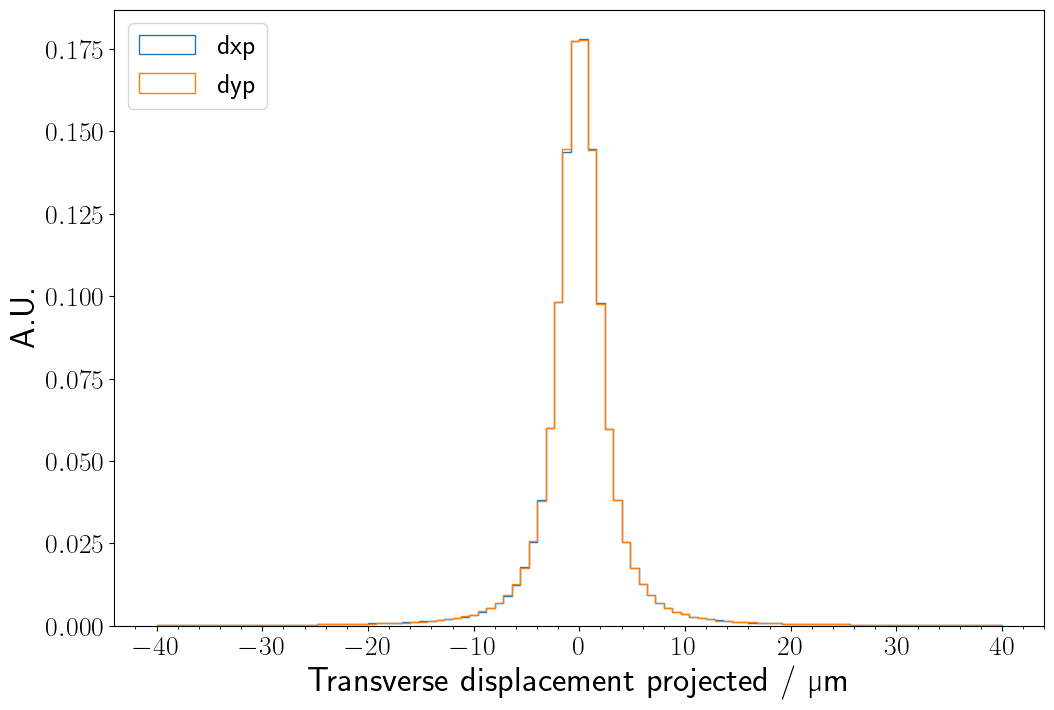

In [123]:
#building of the displacement on (x',y')
Tau_dxp=Tau_newuxp_x*Tau_dx+Tau_newuxp_y*Tau_dy+Tau_newuxp_z*Tau_dz
Tau_dyp=Tau_newuyp_x*Tau_dx+Tau_newuyp_y*Tau_dy+Tau_newuyp_z*Tau_dz
#cut of the events where the vertex reconstruction fails
Tau_dxp=Tau_dxp[Tau_rec_x!=0]
Tau_dyp=Tau_dyp[Tau_rec_x!=0]
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_dxp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dxp")
plt.hist(Tau_dyp, bins = 100, range = (-40, 40), histtype = "step", density = True, label = "dyp")
plt.legend(loc = "upper left")
plt.xlabel("Transverse displacement projected / µm")
plt.ylabel("A.U.");

In [146]:
Tau_DTp=np.concatenate([Tau_dxp,Tau_dyp], axis=0)
obs = zfit.Space("x", limits = (-40, 40))

shared_mu = zfit.Parameter(f"{a}_shared_mu", 0.0, -10, 10)
shared_mu.floating = False

sigma1 = zfit.Parameter(f"{a}_sigma1", 3, 0, 10)
gauss1 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma1)

sigma2 = zfit.Parameter(f"{a}_sigma2", 5, 3, 50)
gauss2 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma2)

sigma3 = zfit.Parameter(f"{a}_sigma3", 10, 5, 80)
gauss3 = zfit.pdf.Gauss(obs = obs, mu = shared_mu, sigma = sigma3)

frac12 = zfit.Parameter(f"{a}_frac12", 0.5, 0., 1.)
#frac12.floating = False
frac23 = zfit.Parameter(f"{a}_frac23", 0.5, 0., 1.)

model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2, gauss3], fracs = [frac12, frac23])
#model = zfit.pdf.SumPDF(pdfs = [gauss1, gauss2], fracs = [frac12])
a += 1

In [147]:
data = zfit.Data.from_numpy(obs = obs, array=Tau_DTp[abs(Tau_DTp<40)], weights = None)

In [148]:
nll = zfit.loss.UnbinnedNLL(model = model, data = data)
minimizer = zfit.minimize.Minuit(verbosity = 7)
result = minimizer.minimize(nll)
params = result.params
print(params)

I MnSeedGenerator Initial state: FCN =              1000 Edm =       6488813.484 NCalls =     25
I MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 1000
  Edm           : 6491767.583
  Internal parameters:
   2.07473691e-16
                0
    -0.4115168461
     -1.155244319
     -1.048481505
  Internal gradient  :
  8.063642475e+12
  8.063642733e+12
       1164541.64
     -1660398.106
                0
  Internal covariance matrix:
  3.9275856e-23              0              0              0              0
              0  3.9275856e-23              0              0              0
              0              0  1.8860646e-05              0              0
              0              0              0  1.3927187e-07              0
              0              0              0              0              2
I VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 825
I VariableMetricBuilder    0 - FCN =              1000 Edm =       6491767.583 NC

4.646779036068143
0.18499185573374377


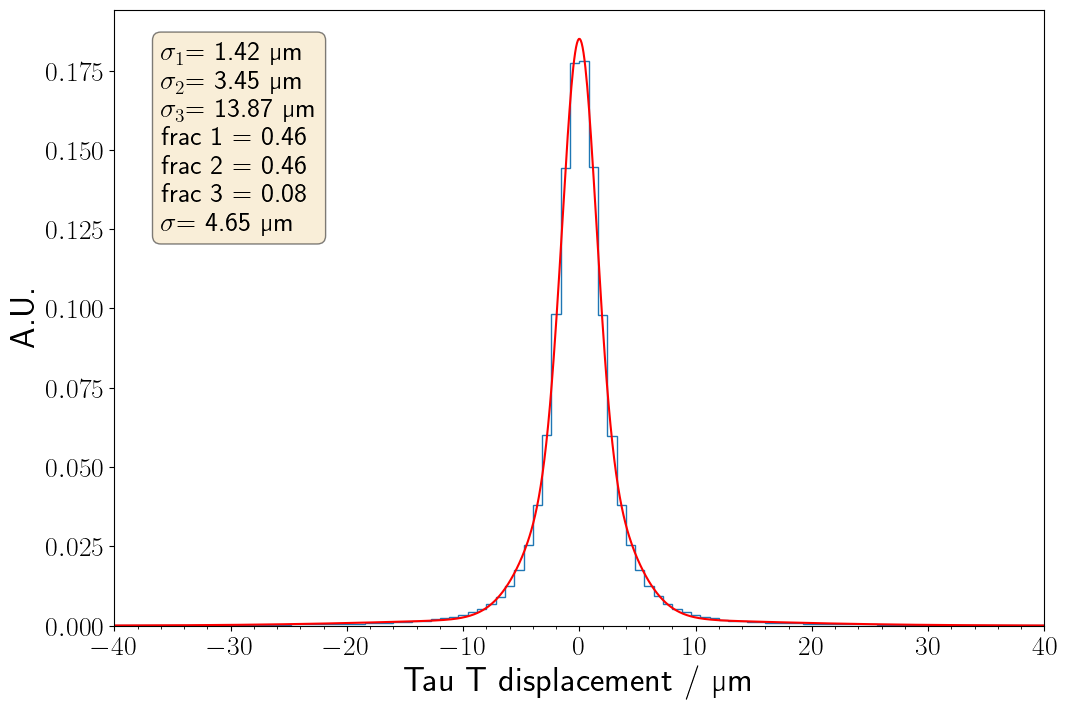

In [149]:
x_range = np.linspace(-40, 40, 1000)
pdf = zfit.run(model.pdf(x_range, norm_range = obs))

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_minor_locator(tick.AutoMinorLocator())
plt.hist(Tau_DTp, bins = 100, histtype = "step", range=(-40,40), density = True)
plt.plot(x_range, pdf, #,* bin_width, pdf * d.shape[0] / 100 * obs_yy.area()
    color = "red",
    label = "Fit"
)

combined_resolution = np.sqrt(params[frac12]['value'] * params[sigma1]['value']**2 + params[frac23]['value'] * params[sigma2]['value']**2 + (1-params[frac12]['value']-params[frac23]['value']) * params[sigma3]['value']**2)
print(combined_resolution)
frac1=params[frac12]['value']
frac2=params[frac23]['value']
frac3=(1-params[frac12]['value']-params[frac23]['value'])
textstr = f"$\\sigma_1$= {params[sigma1]['value']:.2f} µm \n$\\sigma_2$= {params[sigma2]['value']:.2f} µm  \n$\\sigma_3$= {params[sigma3]['value']:.2f} µm \nfrac 1 = {frac1:.2f} \nfrac 2 = {frac2:.2f} \nfrac 3 = {frac3:.2f} \n $\\sigma$= {combined_resolution:.2f} µm" 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox=props)
plt.xlim(-40, 40)
plt.xlabel("Tau T displacement / µm")
plt.ylabel("A.U.");
print(np.max(pdf))